In [1]:
# Import modules
import pandas as pd
import numpy as np

from models import Encoder, Decoder, Adv_GruAE

from sklearn import preprocessing
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import seaborn as sns

import torch
from torch.utils import data
import torch.nn as nn
import torch.optim as optim

/home/Slimane/anaconda3/envs/giskard_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Preprocessing

In [2]:
#Loading Datasets
labels = pd.read_csv('../Data/gt_test.csv')
df_pca_test = pd.read_csv('../Data/df_pca_test_save.csv')
df_pca = pd.read_csv('../Data/df_pca_save.csv')

# Drop index col
df_pca.drop(columns=[df_pca.columns[0]],inplace=True)
df_pca_test.drop(columns=[df_pca_test.columns[0]],inplace=True)

# Getting Indices lists
l_ids_test = {i:df_pca_test.loc[df_pca_test.id == i,df_pca_test.columns!='id'] for i in df_pca_test.id.unique()}
l_ids = {i:df_pca.loc[df_pca.id == i,df_pca.columns!='id'] for i in df_pca.id.unique()}

# Get the anomalies timesteps
labels_index = labels.set_index(labels['id']).drop(columns=['id'])
labels_index = labels_index.sort_index()

ids_anomaly = labels_index.loc[labels_index['anomaly']==1].index.values
ids_no_anomaly = labels_index.loc[labels_index['anomaly']==0].index.values

# Ignoring Ids that are not in the testset
ids_no_anomaly = np.delete(ids_no_anomaly,np.argwhere(np.isin(ids_no_anomaly,[614, 
                                                                              792, 
                                                                              1496,
                                                                              2876,
                                                                              3837,
                                                                              4283, 
                                                                              4678, 
                                                                              4955,
                                                                              5202,
                                                                              5310,
                                                                              5370])))

list_keys = list(l_ids_test.keys())
pos_ids_anomaly = [list_keys.index(i) for i in ids_anomaly]
pos_ids_no_anomaly = [list_keys.index(i) for i in ids_no_anomaly]

### Building zero-padded train and test dataloader

In [3]:
l_final = []
for i in l_ids.keys():
    l_final.append(l_ids[i].values.tolist())

l_final_test = []
for i in l_ids_test.keys():
    l_final_test.append(l_ids_test[i].values.tolist())
    
lengths = [len(i) for i in l_final]
size = np.max(lengths)

lengths_test = [len(i) for i in l_final_test]
size_test = np.max(lengths_test)

padded_seqs = np.zeros((len(l_final),size,13))

padded_seqs_test = np.zeros((len(l_final_test),size_test,13))

for i,seq in enumerate(l_final):
    padded_seqs[i][:len(seq)] = seq
    
for i,seq in enumerate(l_final_test):
    padded_seqs_test[i][:len(seq)] = seq
    
train_final = torch.Tensor(padded_seqs)

test_final = torch.Tensor(padded_seqs_test)

train_loader = data.DataLoader(train_final, batch_size=128,shuffle=False)
test_loader = data.DataLoader(test_final, batch_size=128,shuffle=False)



### Initialize the models

In [4]:
encoder = Encoder(input_dim=13 ,hid_dim=6)
decoder = Decoder(input_dim=6, hid_dim=13)

G_gruAE = Adv_GruAE(encoder,decoder)

criterion_mse = nn.MSELoss()
optimizer = optim.Adam(G_gruAE.parameters(),lr=0.0001)

### Training loop

Epoch [0/500], loss: 0.192652


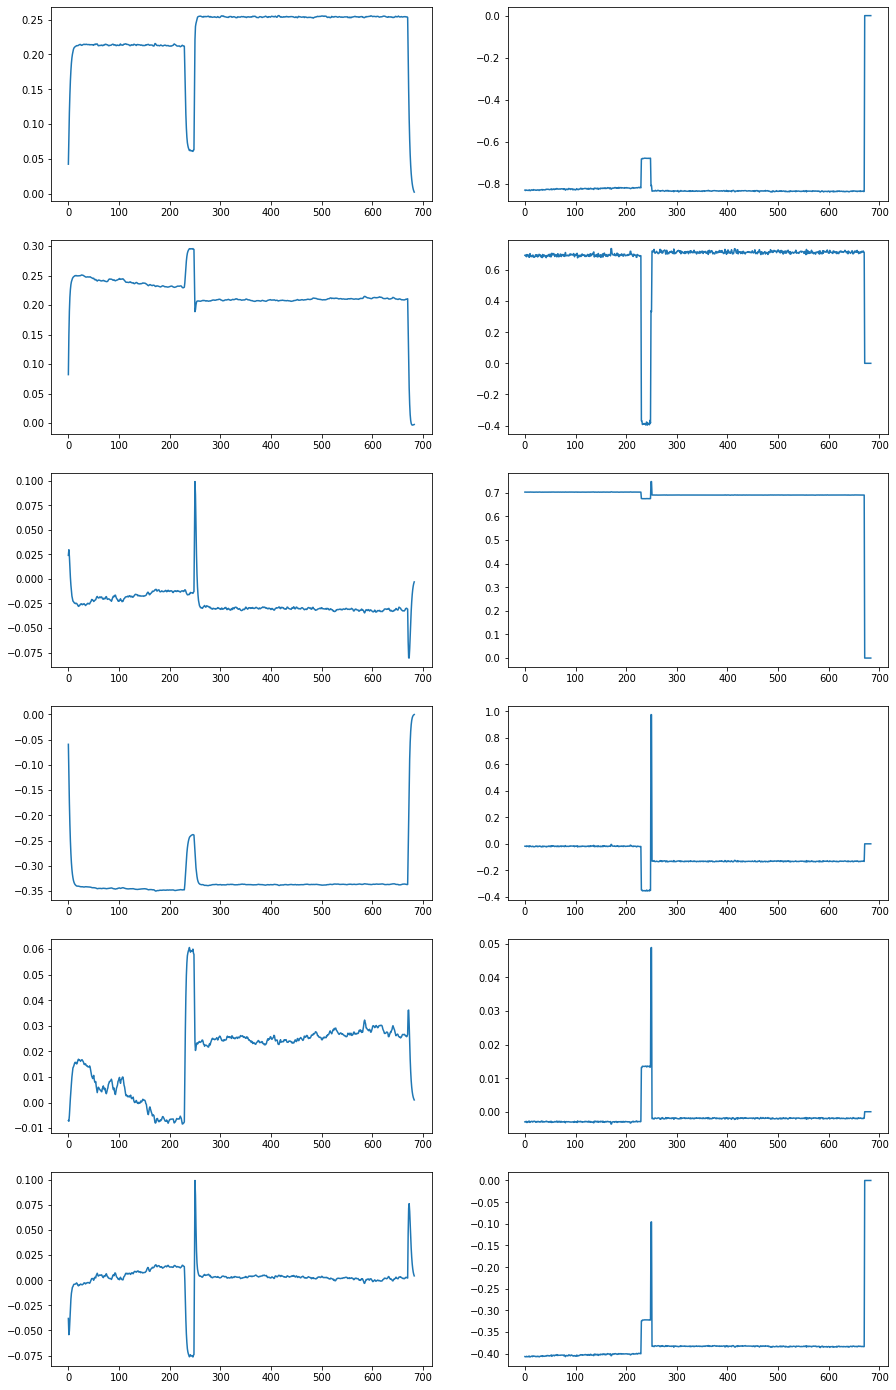

MSE on Anomalies:  tensor(0.1754)
MSE on Normal:  tensor(0.1818)
Epoch [1/500], loss: 0.187601
Epoch [2/500], loss: 0.182908
Epoch [3/500], loss: 0.178517
Epoch [4/500], loss: 0.174378
Epoch [5/500], loss: 0.170447
Epoch [6/500], loss: 0.166693
Epoch [7/500], loss: 0.163090
Epoch [8/500], loss: 0.159620
Epoch [9/500], loss: 0.156270
Epoch [10/500], loss: 0.153033


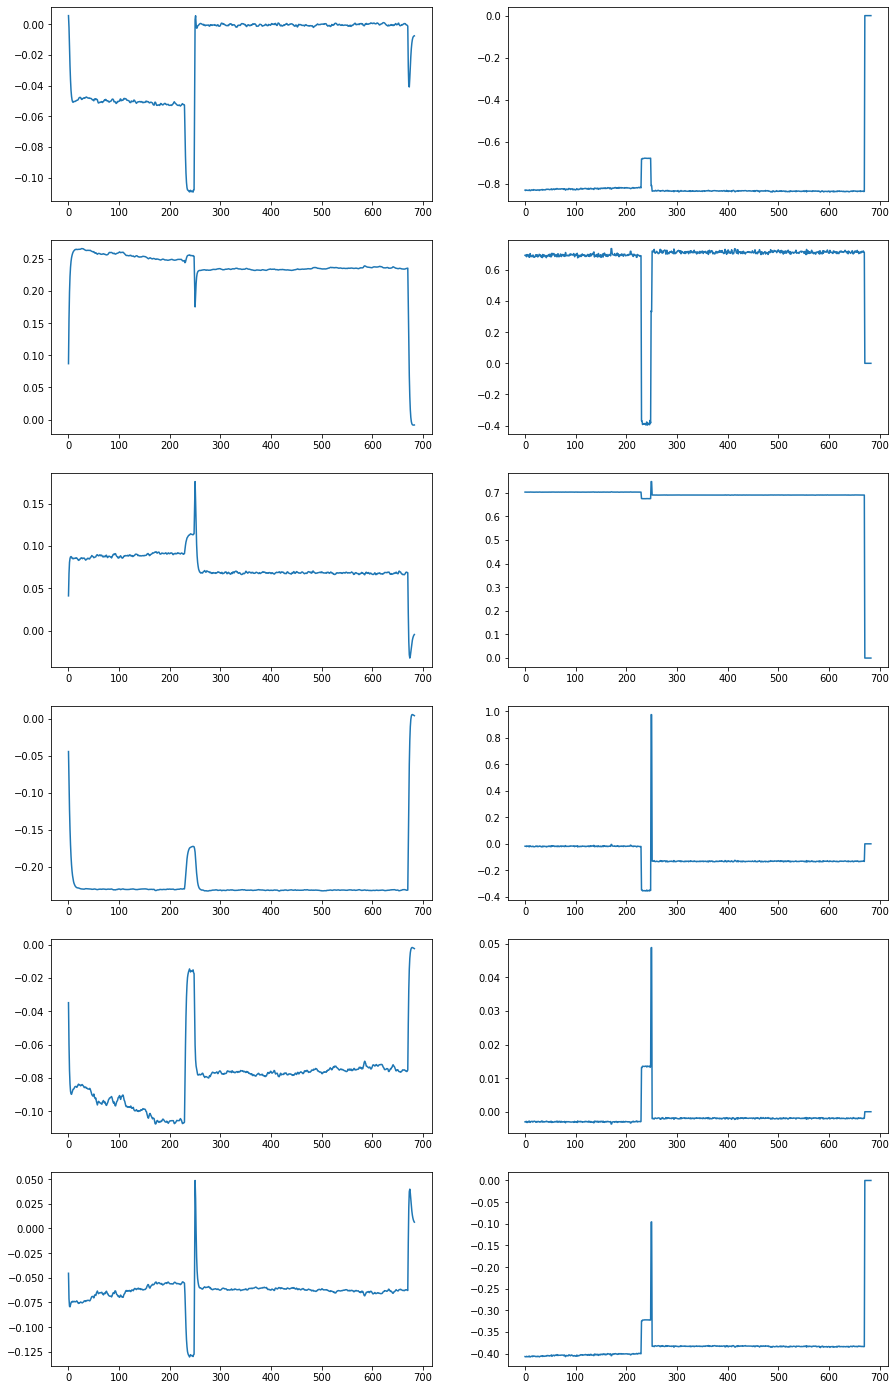

MSE on Anomalies:  tensor(0.1293)
MSE on Normal:  tensor(0.1442)
Epoch [11/500], loss: 0.149901
Epoch [12/500], loss: 0.146872
Epoch [13/500], loss: 0.143941
Epoch [14/500], loss: 0.141106
Epoch [15/500], loss: 0.138364
Epoch [16/500], loss: 0.135713
Epoch [17/500], loss: 0.133150
Epoch [18/500], loss: 0.130672
Epoch [19/500], loss: 0.128277
Epoch [20/500], loss: 0.125963


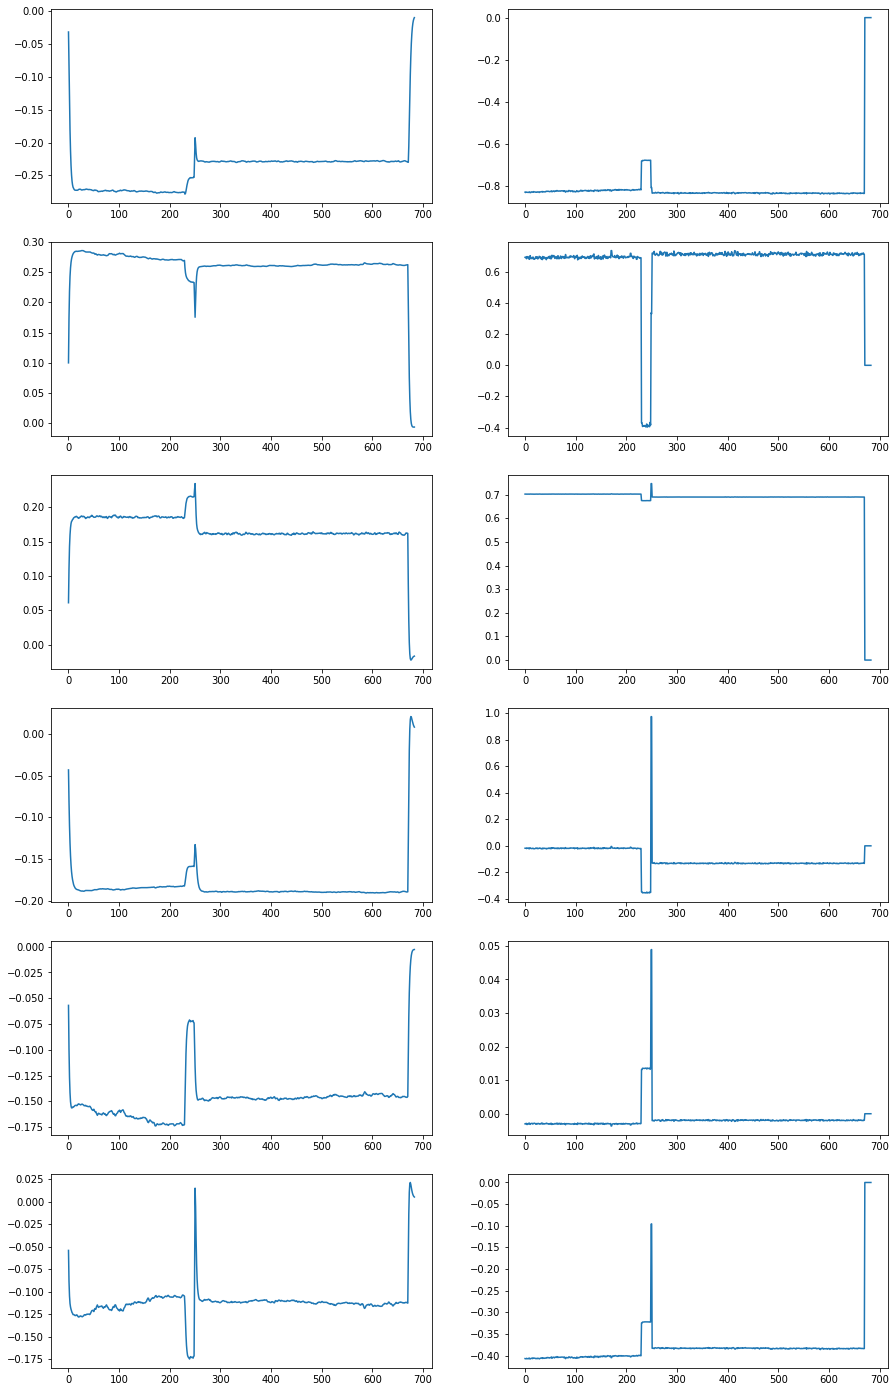

MSE on Anomalies:  tensor(0.1011)
MSE on Normal:  tensor(0.1185)
Epoch [21/500], loss: 0.123726
Epoch [22/500], loss: 0.121565
Epoch [23/500], loss: 0.119476
Epoch [24/500], loss: 0.117456
Epoch [25/500], loss: 0.115503
Epoch [26/500], loss: 0.113614
Epoch [27/500], loss: 0.111785
Epoch [28/500], loss: 0.110014
Epoch [29/500], loss: 0.108298
Epoch [30/500], loss: 0.106633


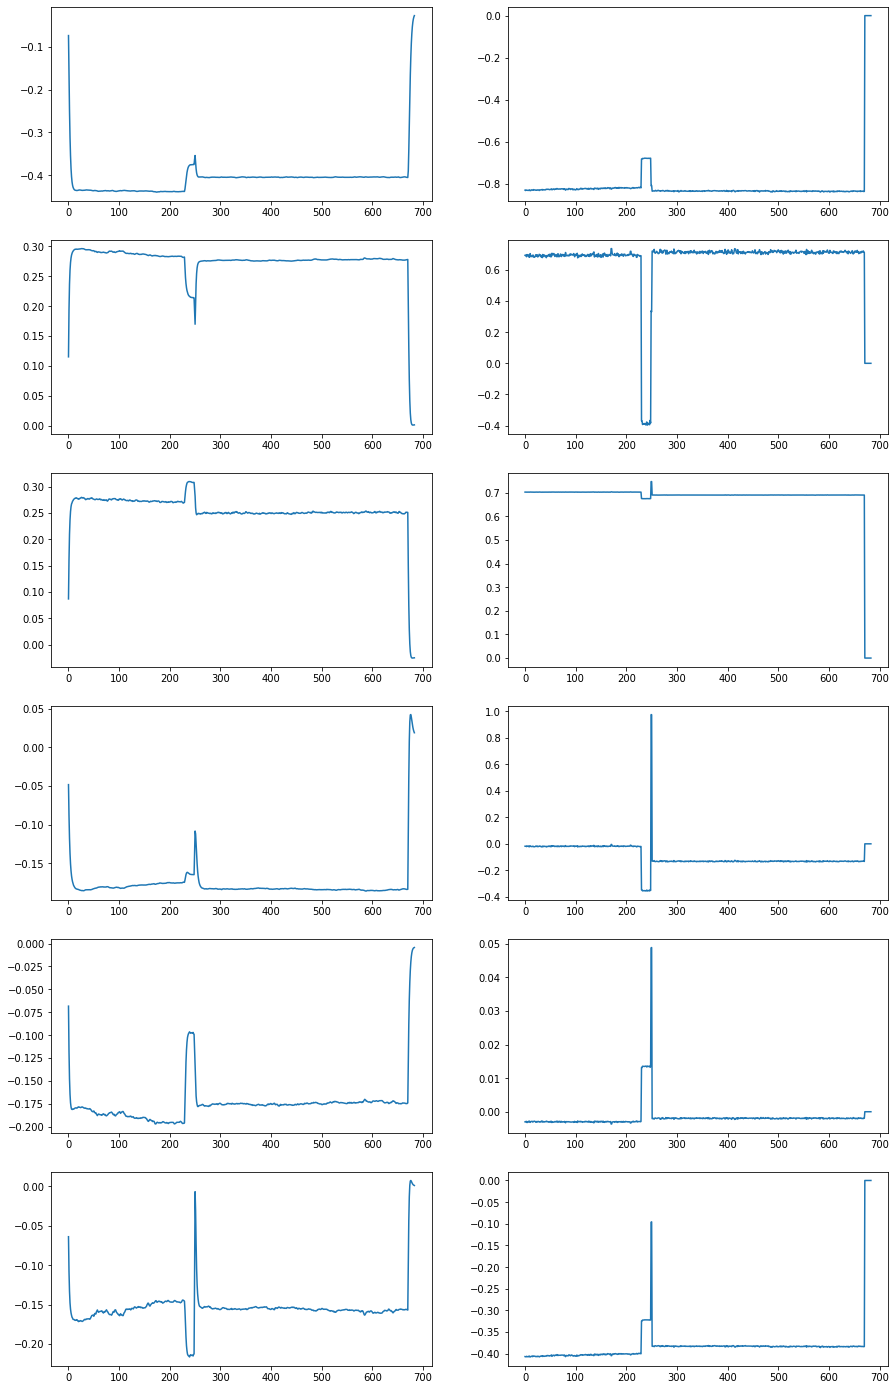

MSE on Anomalies:  tensor(0.0836)
MSE on Normal:  tensor(0.1004)
Epoch [31/500], loss: 0.105017
Epoch [32/500], loss: 0.103446
Epoch [33/500], loss: 0.101918
Epoch [34/500], loss: 0.100429
Epoch [35/500], loss: 0.098978
Epoch [36/500], loss: 0.097562
Epoch [37/500], loss: 0.096178
Epoch [38/500], loss: 0.094824
Epoch [39/500], loss: 0.093499
Epoch [40/500], loss: 0.092199


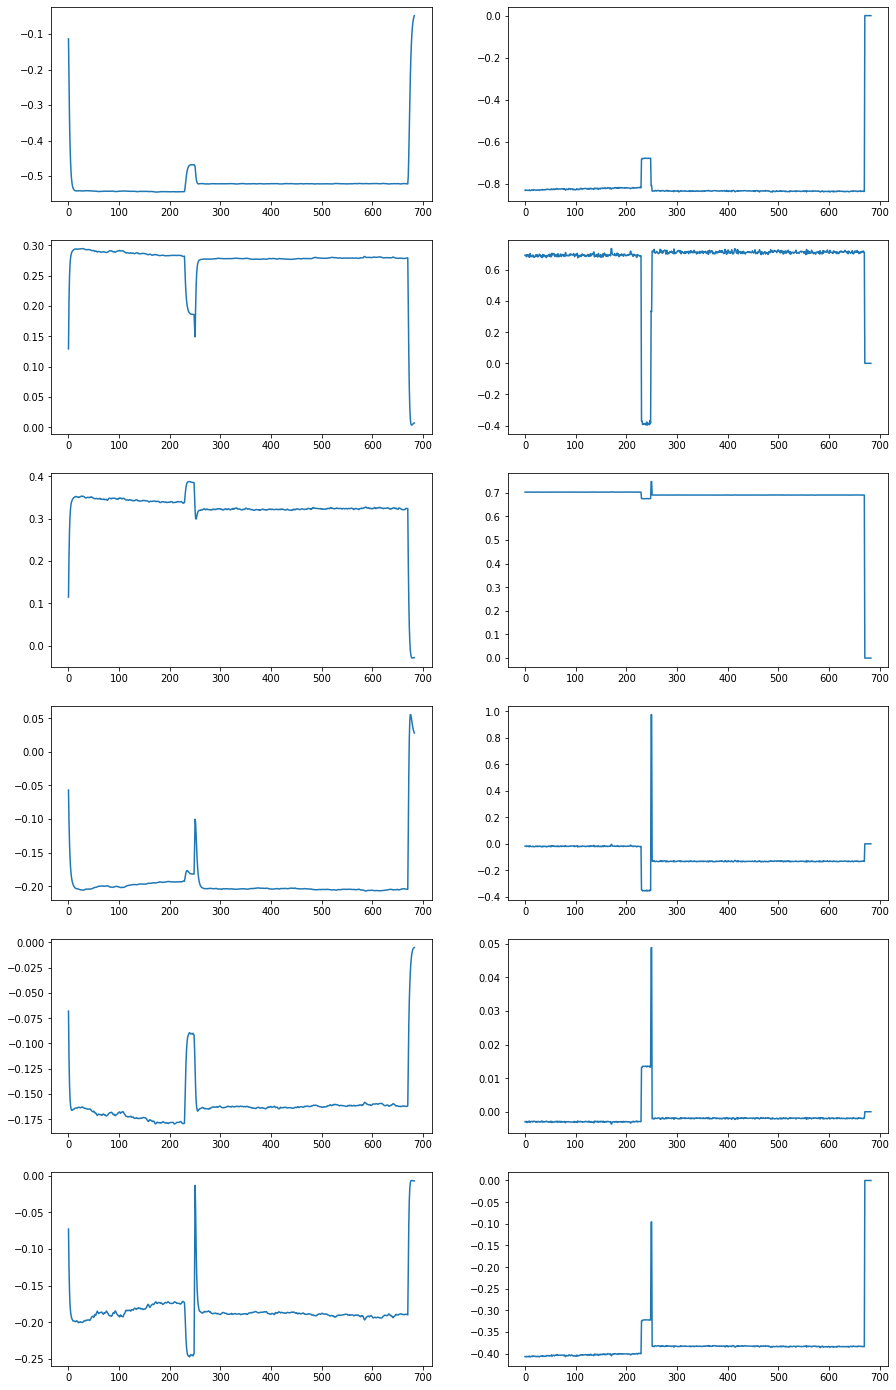

MSE on Anomalies:  tensor(0.0720)
MSE on Normal:  tensor(0.0871)
Epoch [41/500], loss: 0.090923
Epoch [42/500], loss: 0.089670
Epoch [43/500], loss: 0.088438
Epoch [44/500], loss: 0.087225
Epoch [45/500], loss: 0.086030
Epoch [46/500], loss: 0.084853
Epoch [47/500], loss: 0.083691
Epoch [48/500], loss: 0.082544
Epoch [49/500], loss: 0.081412
Epoch [50/500], loss: 0.080292


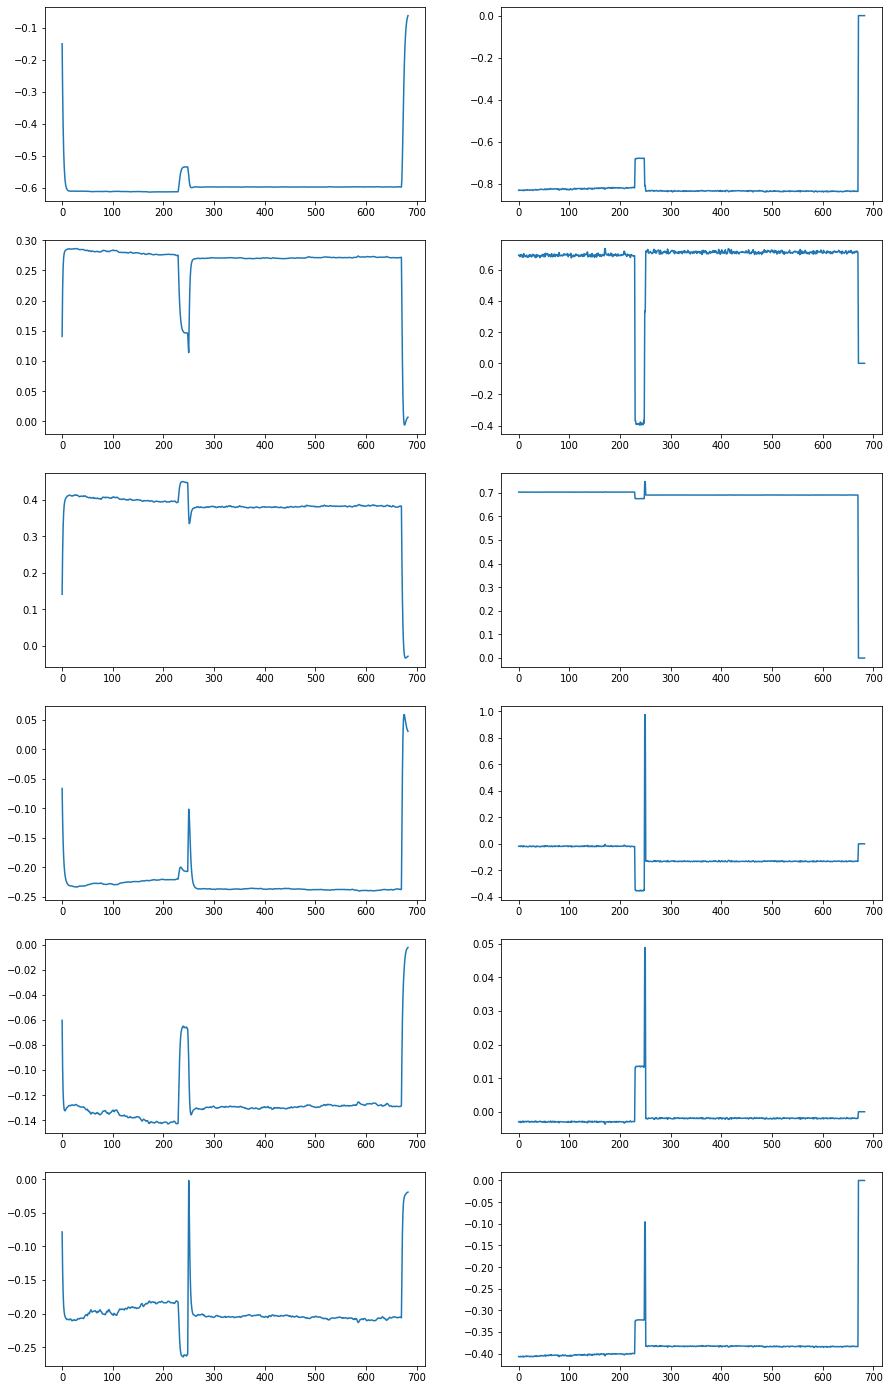

MSE on Anomalies:  tensor(0.0630)
MSE on Normal:  tensor(0.0761)
Epoch [51/500], loss: 0.079186
Epoch [52/500], loss: 0.078091
Epoch [53/500], loss: 0.077007
Epoch [54/500], loss: 0.075935
Epoch [55/500], loss: 0.074874
Epoch [56/500], loss: 0.073823
Epoch [57/500], loss: 0.072783
Epoch [58/500], loss: 0.071753
Epoch [59/500], loss: 0.070735
Epoch [60/500], loss: 0.069727


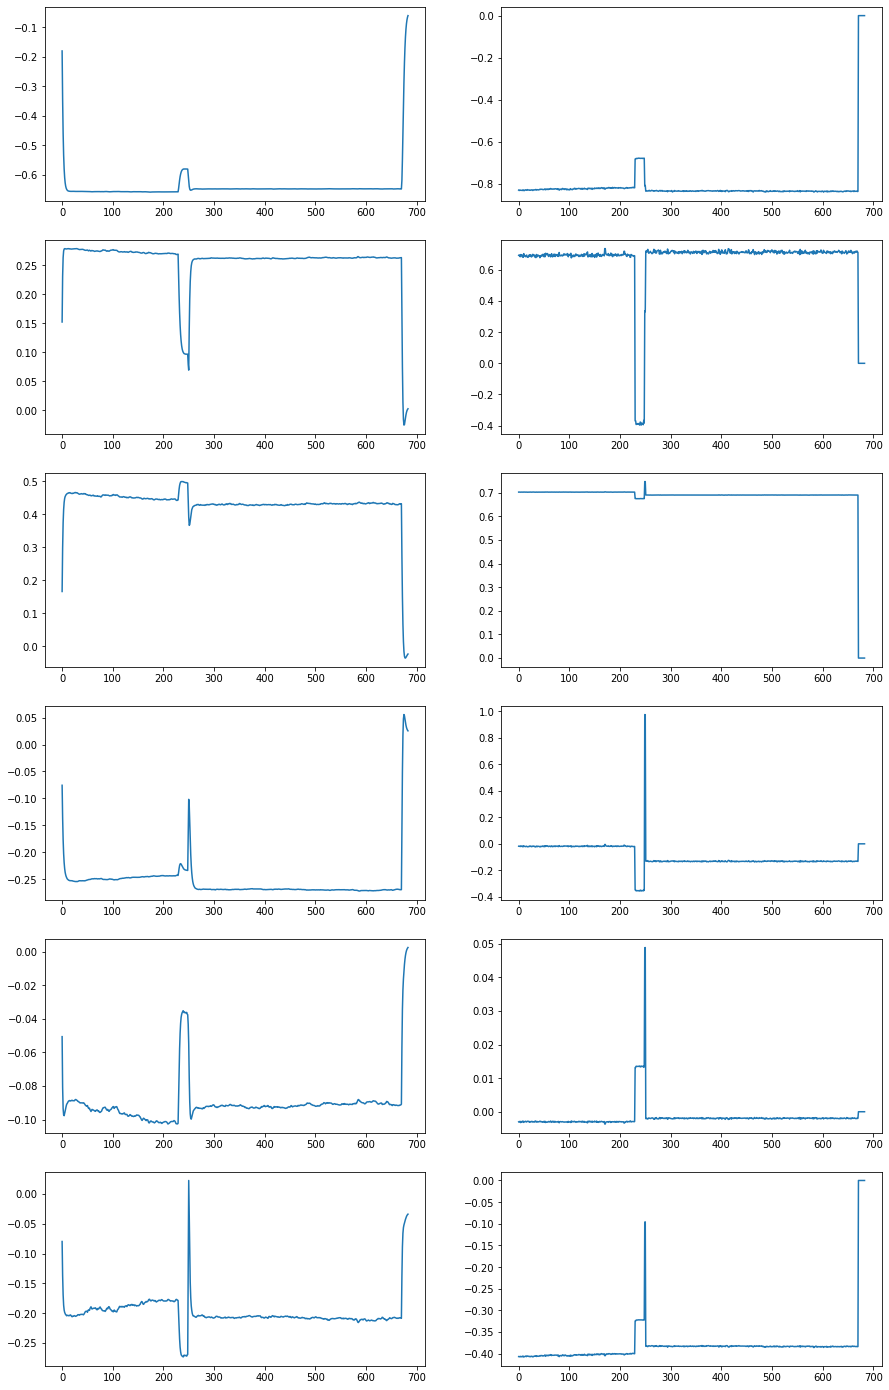

MSE on Anomalies:  tensor(0.0550)
MSE on Normal:  tensor(0.0662)
Epoch [61/500], loss: 0.068731
Epoch [62/500], loss: 0.067747
Epoch [63/500], loss: 0.066775
Epoch [64/500], loss: 0.065816
Epoch [65/500], loss: 0.064871
Epoch [66/500], loss: 0.063939
Epoch [67/500], loss: 0.063021
Epoch [68/500], loss: 0.062118
Epoch [69/500], loss: 0.061230
Epoch [70/500], loss: 0.060357


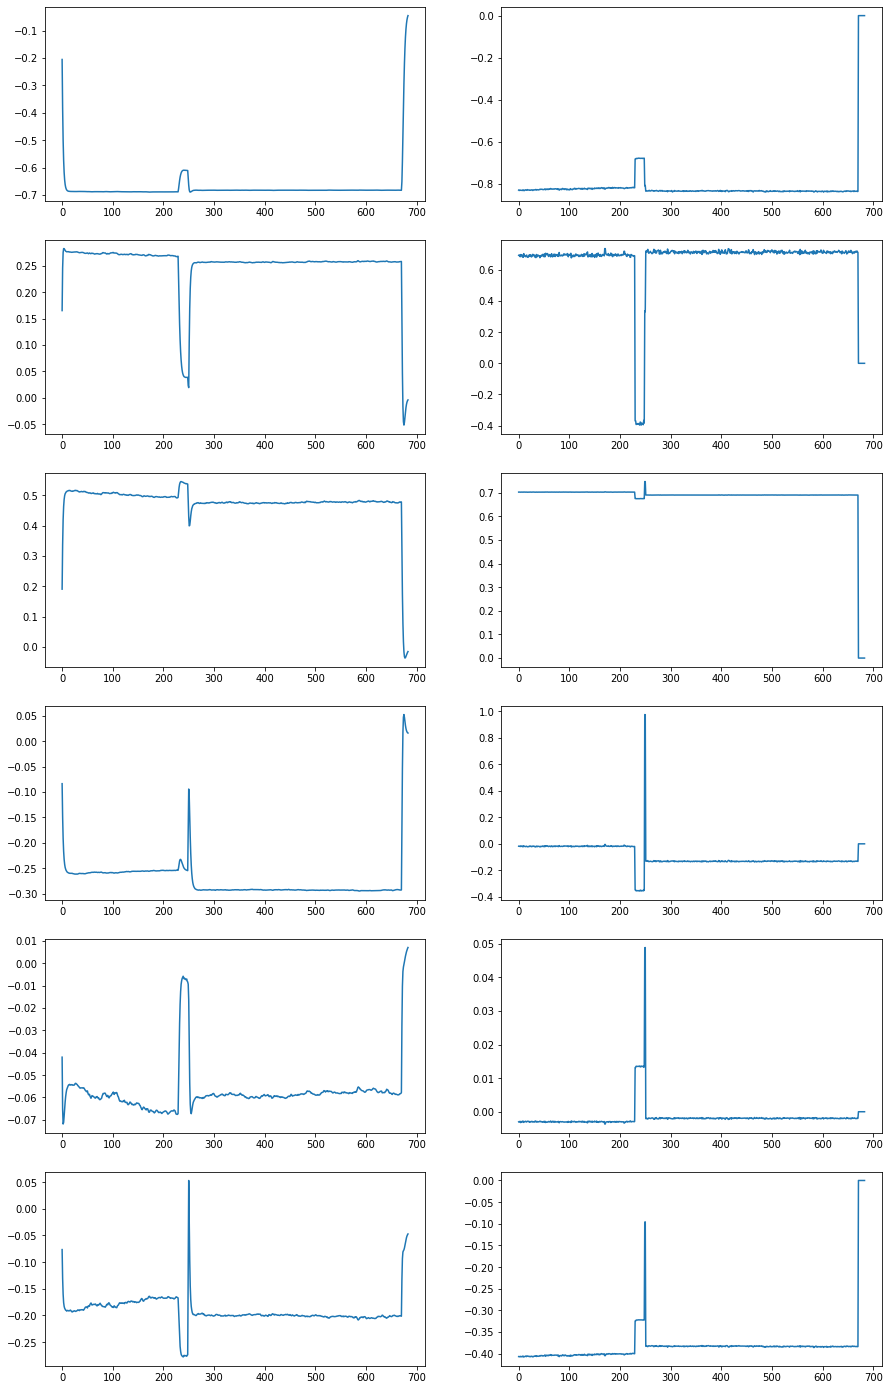

MSE on Anomalies:  tensor(0.0478)
MSE on Normal:  tensor(0.0573)
Epoch [71/500], loss: 0.059499
Epoch [72/500], loss: 0.058657
Epoch [73/500], loss: 0.057830
Epoch [74/500], loss: 0.057019
Epoch [75/500], loss: 0.056223
Epoch [76/500], loss: 0.055442
Epoch [77/500], loss: 0.054676
Epoch [78/500], loss: 0.053926
Epoch [79/500], loss: 0.053190
Epoch [80/500], loss: 0.052469


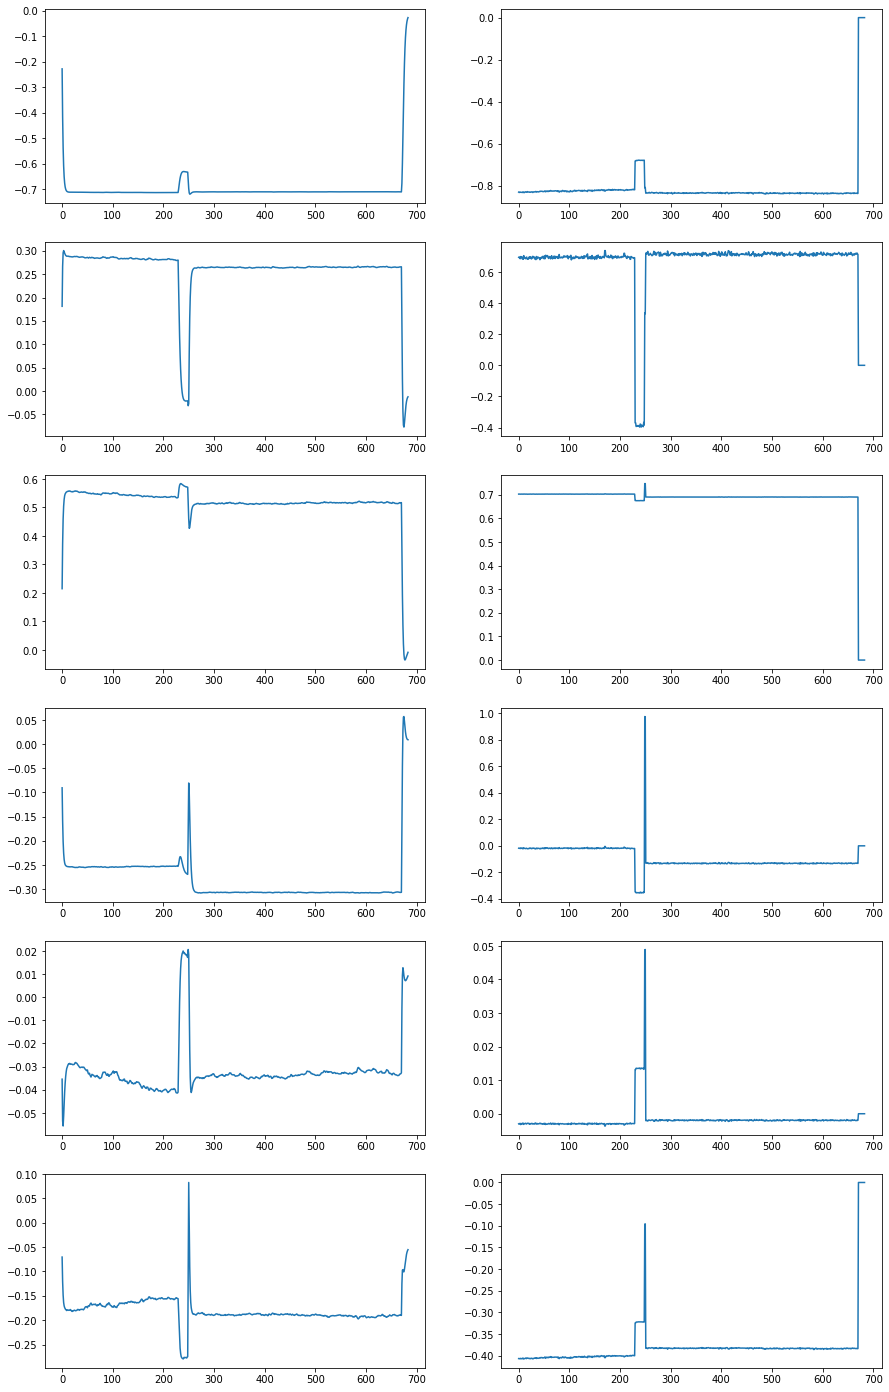

MSE on Anomalies:  tensor(0.0417)
MSE on Normal:  tensor(0.0497)
Epoch [81/500], loss: 0.051763
Epoch [82/500], loss: 0.051071
Epoch [83/500], loss: 0.050394
Epoch [84/500], loss: 0.049730
Epoch [85/500], loss: 0.049082
Epoch [86/500], loss: 0.048446
Epoch [87/500], loss: 0.047825
Epoch [88/500], loss: 0.047217
Epoch [89/500], loss: 0.046623
Epoch [90/500], loss: 0.046041


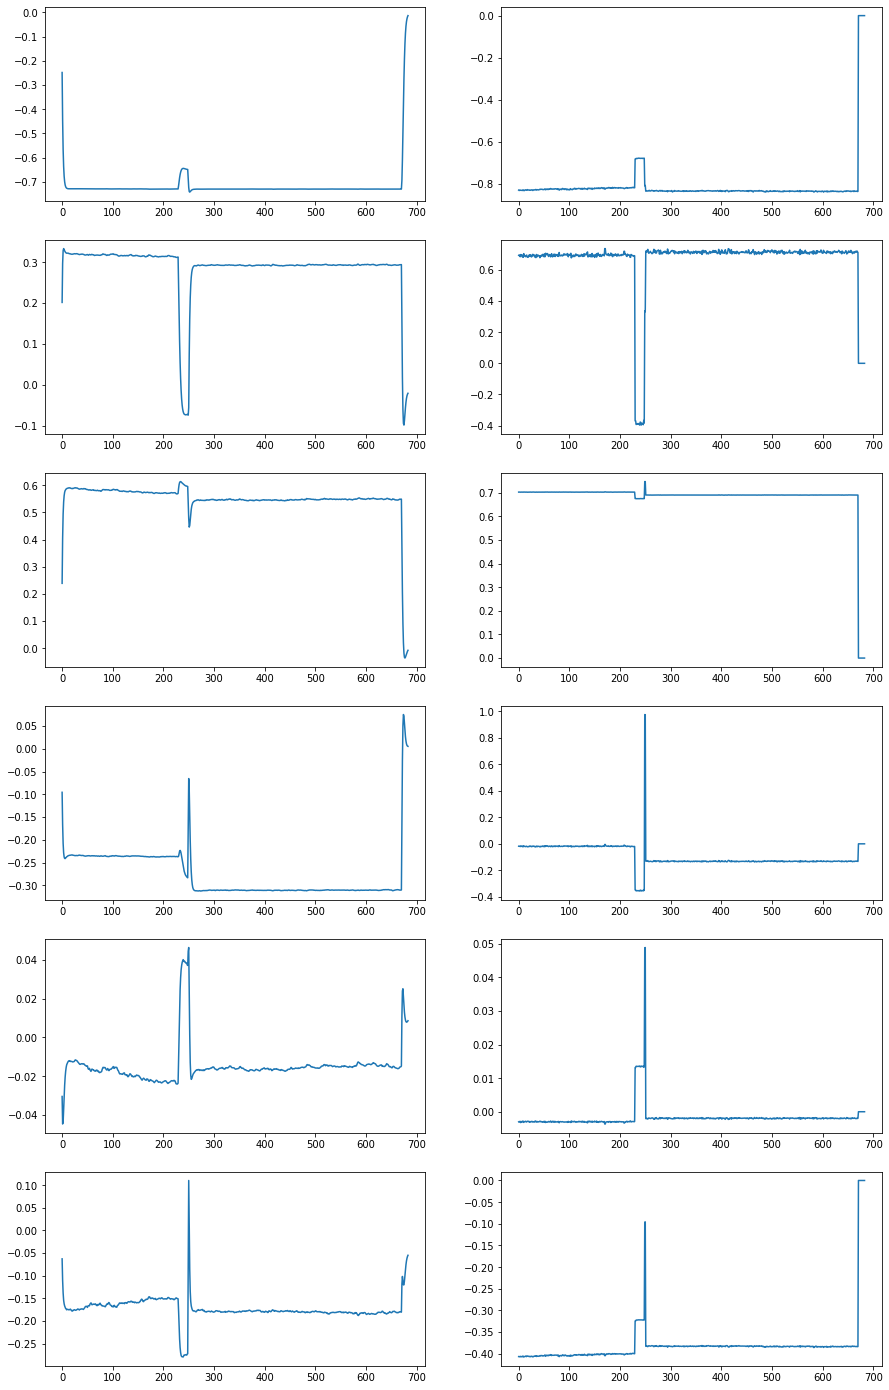

MSE on Anomalies:  tensor(0.0368)
MSE on Normal:  tensor(0.0436)
Epoch [91/500], loss: 0.045472
Epoch [92/500], loss: 0.044916
Epoch [93/500], loss: 0.044372
Epoch [94/500], loss: 0.043839
Epoch [95/500], loss: 0.043319
Epoch [96/500], loss: 0.042809
Epoch [97/500], loss: 0.042311
Epoch [98/500], loss: 0.041823
Epoch [99/500], loss: 0.041346
Epoch [100/500], loss: 0.040879


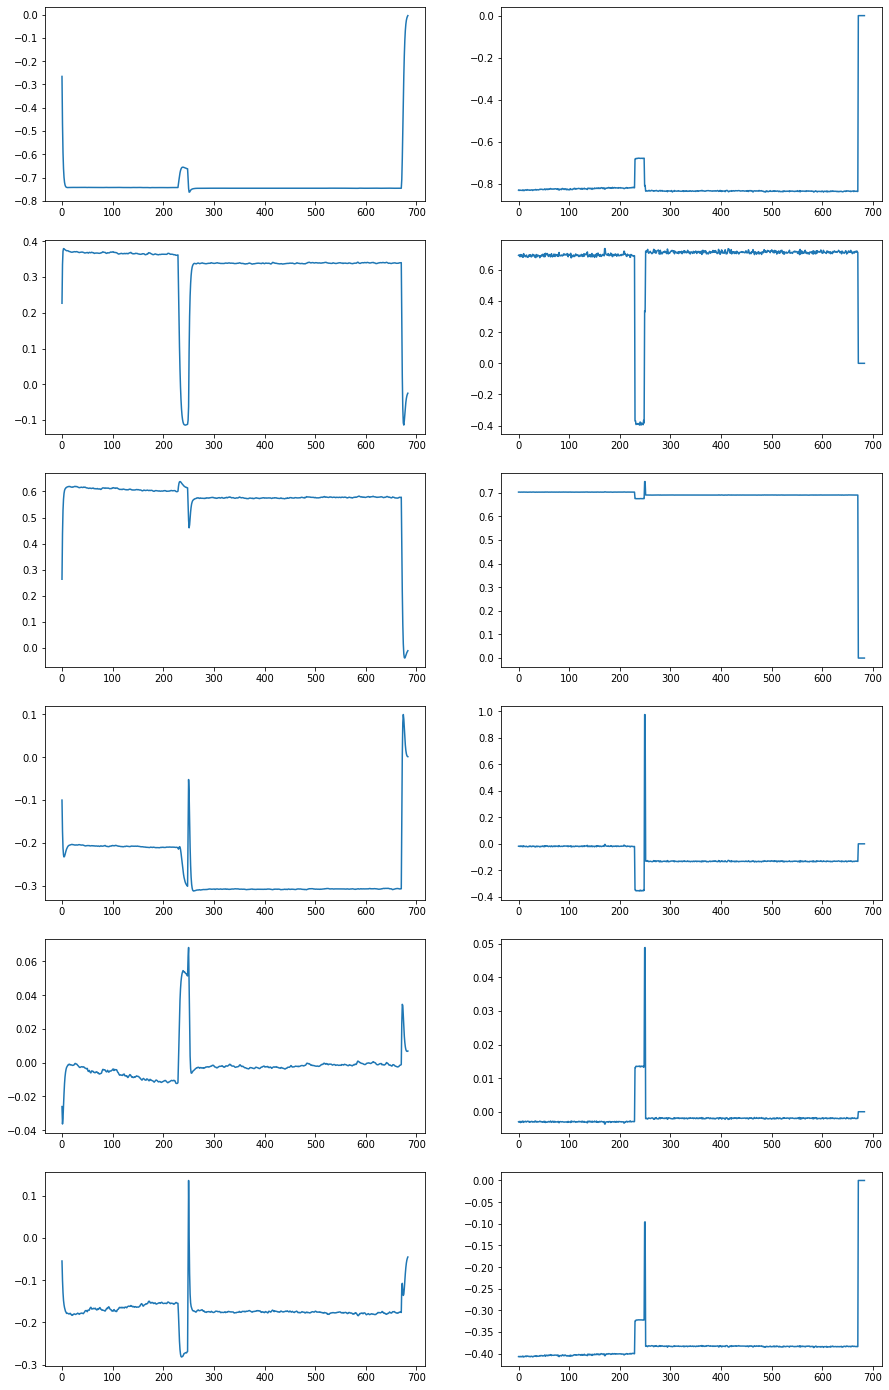

MSE on Anomalies:  tensor(0.0328)
MSE on Normal:  tensor(0.0389)
Epoch [101/500], loss: 0.040422
Epoch [102/500], loss: 0.039975
Epoch [103/500], loss: 0.039537
Epoch [104/500], loss: 0.039108
Epoch [105/500], loss: 0.038688
Epoch [106/500], loss: 0.038277
Epoch [107/500], loss: 0.037873
Epoch [108/500], loss: 0.037478
Epoch [109/500], loss: 0.037091
Epoch [110/500], loss: 0.036711


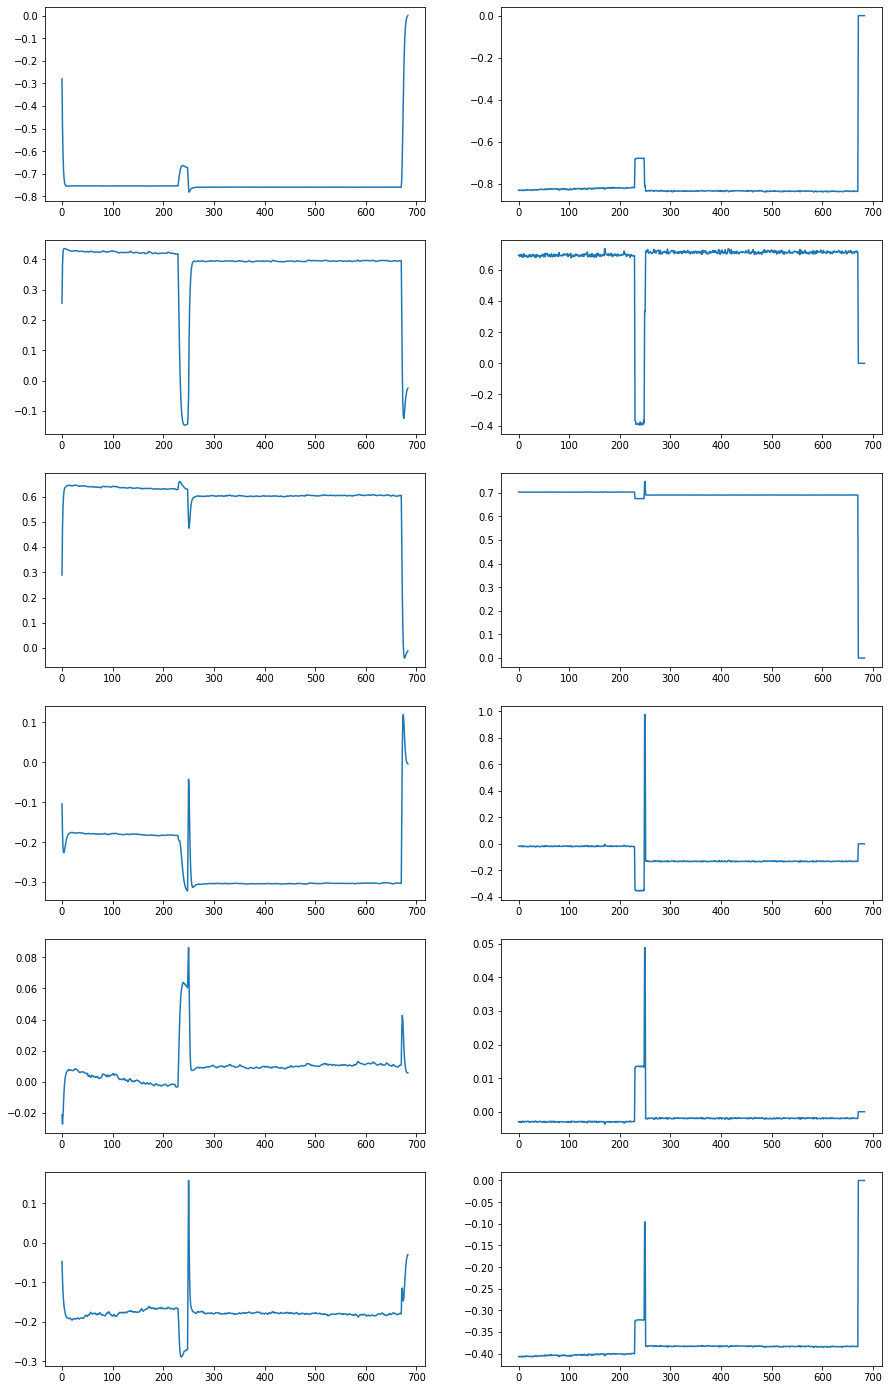

MSE on Anomalies:  tensor(0.0297)
MSE on Normal:  tensor(0.0351)
Epoch [111/500], loss: 0.036339
Epoch [112/500], loss: 0.035974
Epoch [113/500], loss: 0.035615
Epoch [114/500], loss: 0.035263
Epoch [115/500], loss: 0.034918
Epoch [116/500], loss: 0.034578
Epoch [117/500], loss: 0.034245
Epoch [118/500], loss: 0.033917
Epoch [119/500], loss: 0.033594
Epoch [120/500], loss: 0.033276


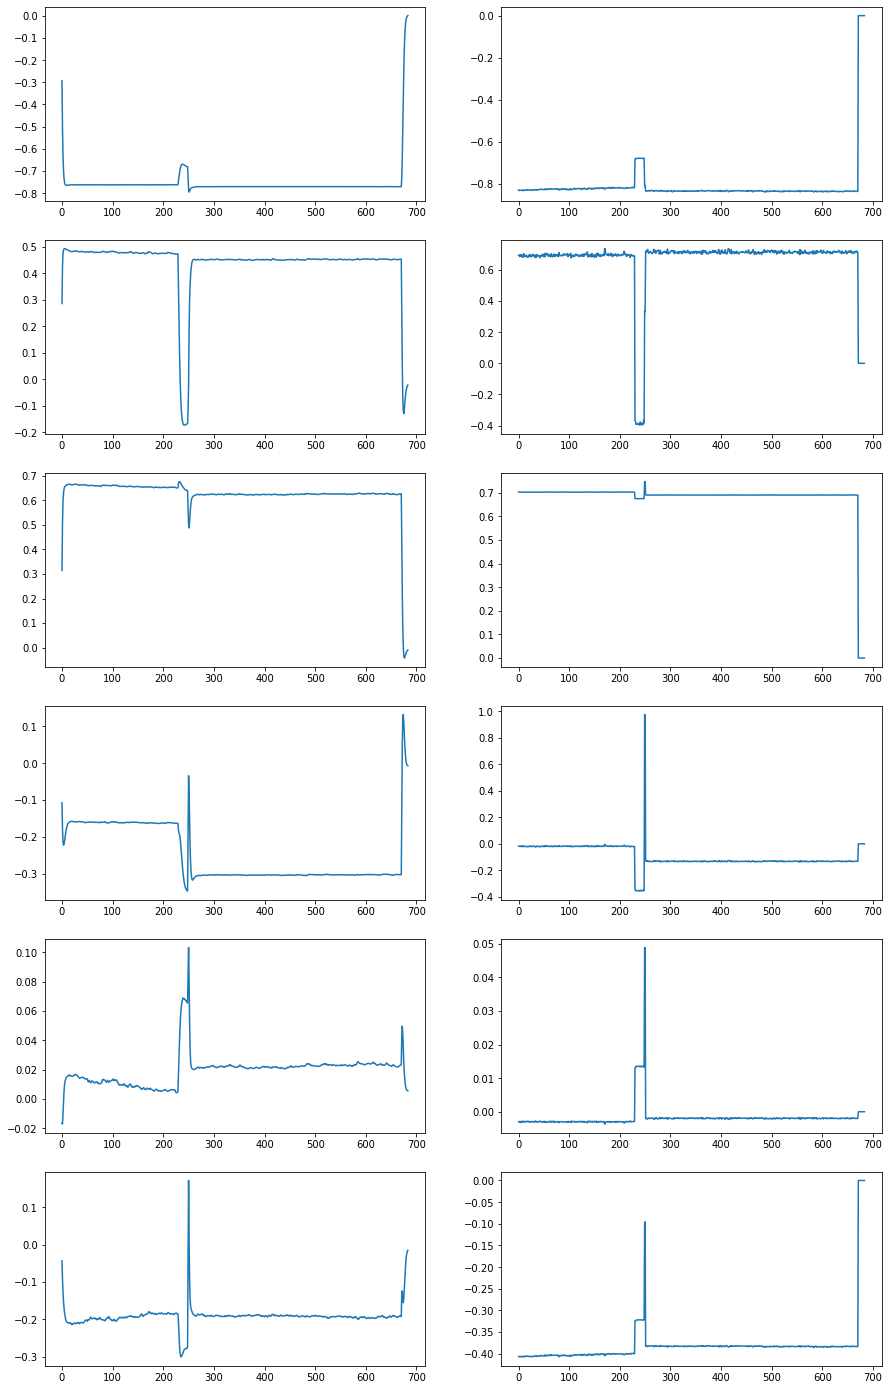

MSE on Anomalies:  tensor(0.0271)
MSE on Normal:  tensor(0.0320)
Epoch [121/500], loss: 0.032964
Epoch [122/500], loss: 0.032656
Epoch [123/500], loss: 0.032353
Epoch [124/500], loss: 0.032054
Epoch [125/500], loss: 0.031759
Epoch [126/500], loss: 0.031467
Epoch [127/500], loss: 0.031180
Epoch [128/500], loss: 0.030896
Epoch [129/500], loss: 0.030615
Epoch [130/500], loss: 0.030338


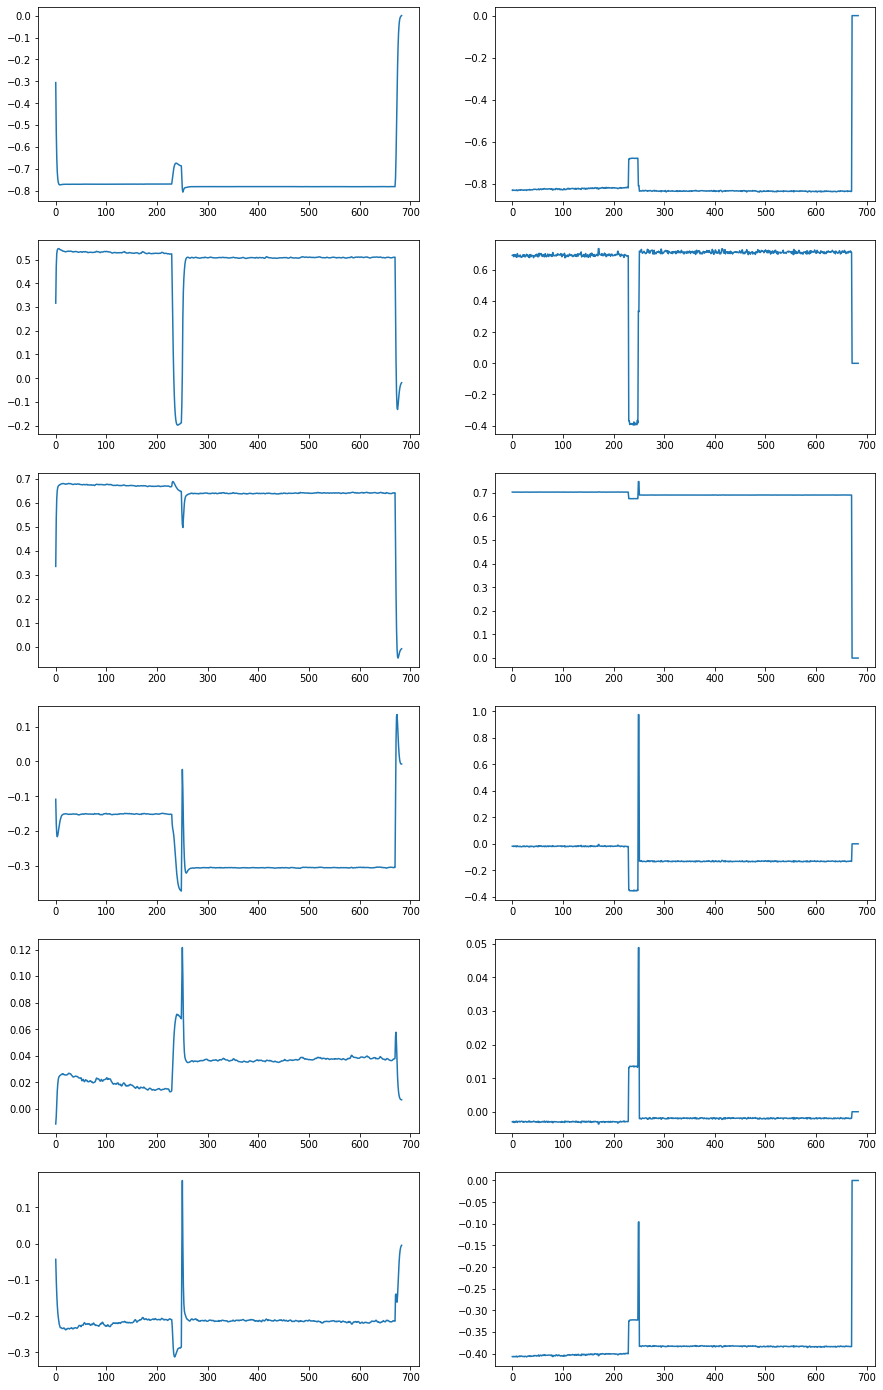

MSE on Anomalies:  tensor(0.0249)
MSE on Normal:  tensor(0.0294)
Epoch [131/500], loss: 0.030063
Epoch [132/500], loss: 0.029792
Epoch [133/500], loss: 0.029523
Epoch [134/500], loss: 0.029257
Epoch [135/500], loss: 0.028993
Epoch [136/500], loss: 0.028732
Epoch [137/500], loss: 0.028473
Epoch [138/500], loss: 0.028216
Epoch [139/500], loss: 0.027961
Epoch [140/500], loss: 0.027709


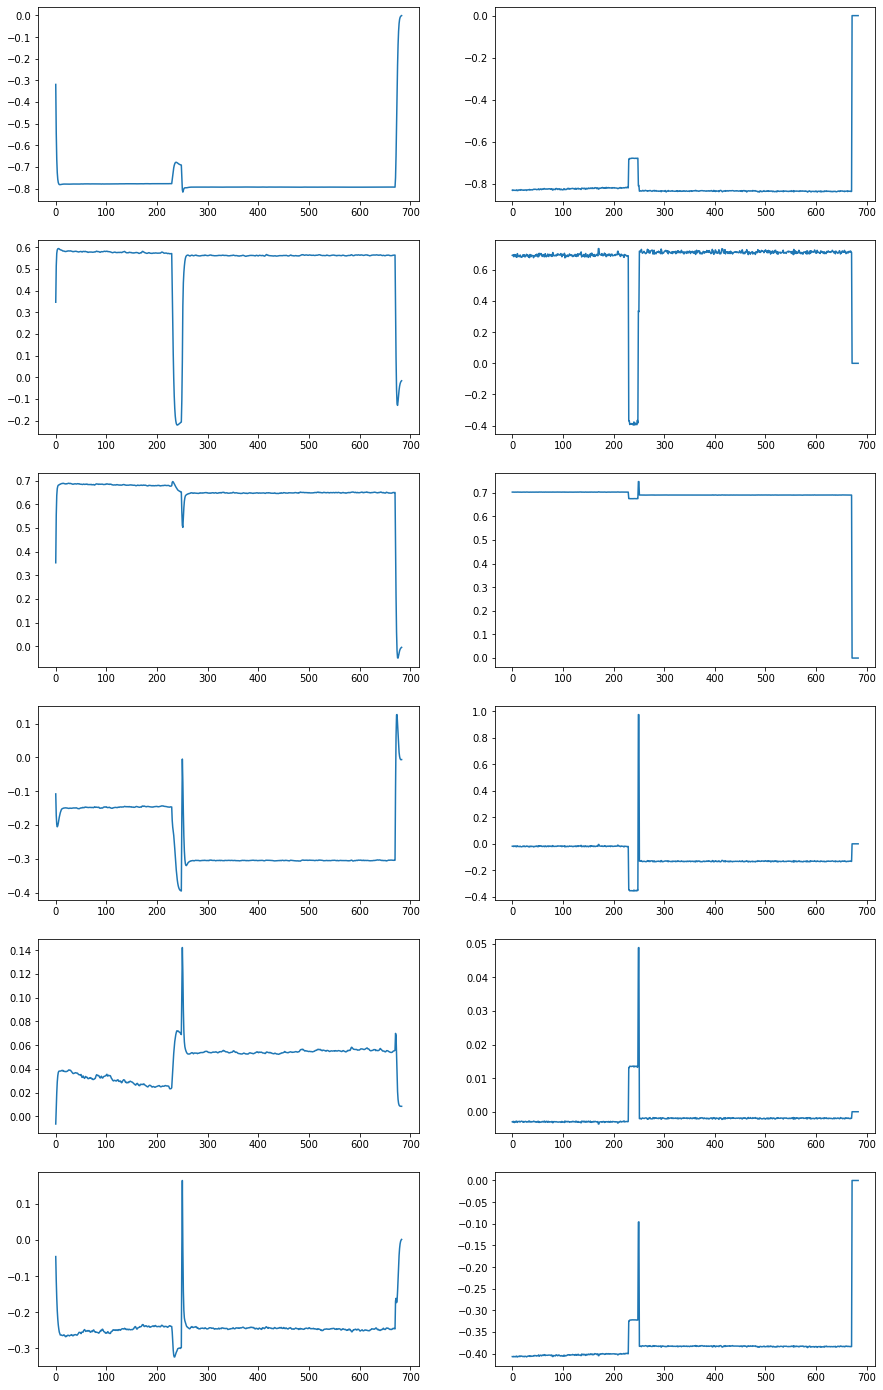

MSE on Anomalies:  tensor(0.0229)
MSE on Normal:  tensor(0.0270)
Epoch [141/500], loss: 0.027459
Epoch [142/500], loss: 0.027211
Epoch [143/500], loss: 0.026965
Epoch [144/500], loss: 0.026722
Epoch [145/500], loss: 0.026481
Epoch [146/500], loss: 0.026242
Epoch [147/500], loss: 0.026005
Epoch [148/500], loss: 0.025771
Epoch [149/500], loss: 0.025540
Epoch [150/500], loss: 0.025310


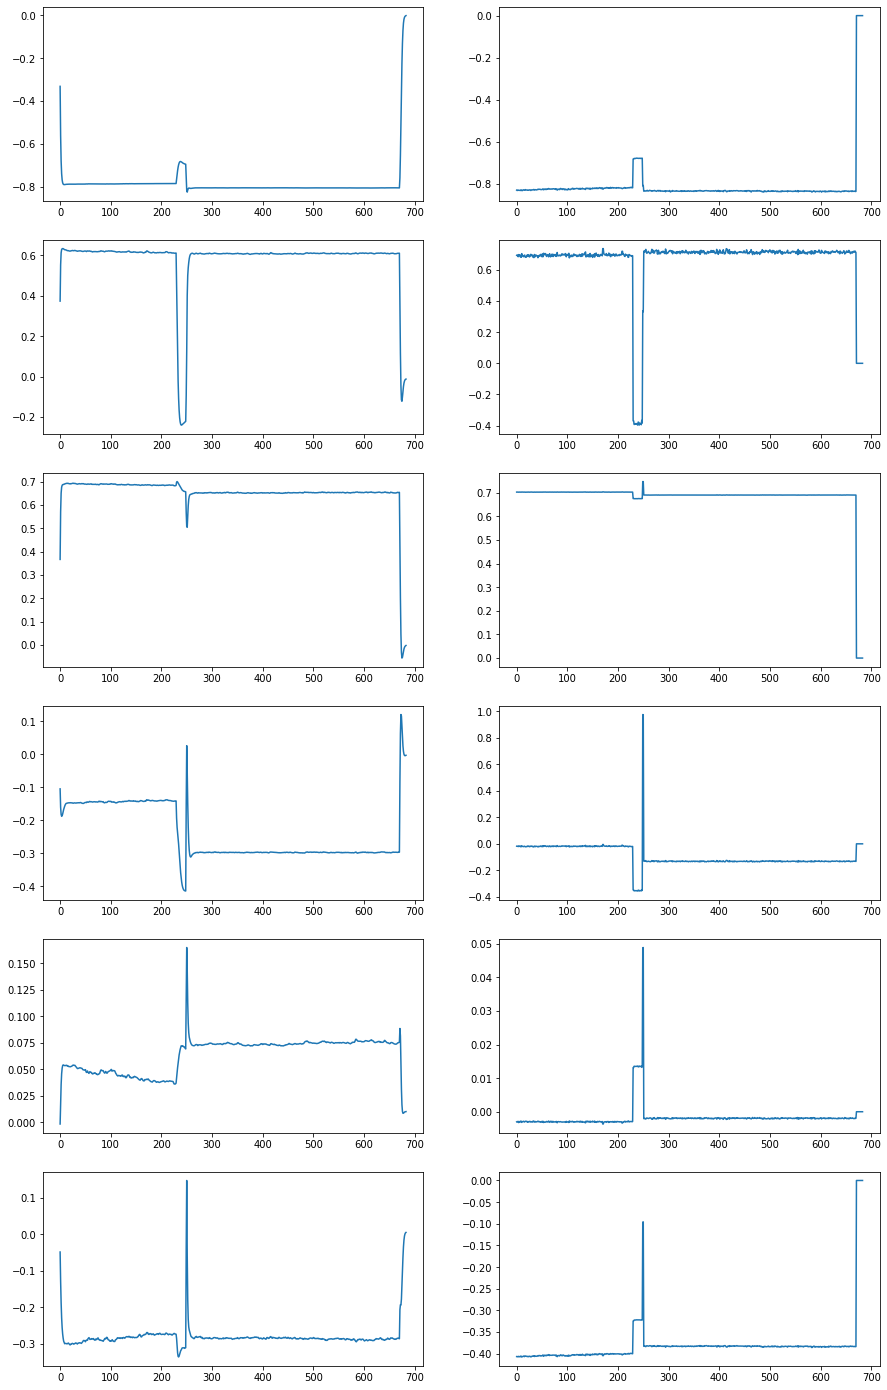

MSE on Anomalies:  tensor(0.0210)
MSE on Normal:  tensor(0.0248)
Epoch [151/500], loss: 0.025084
Epoch [152/500], loss: 0.024860
Epoch [153/500], loss: 0.024639
Epoch [154/500], loss: 0.024421
Epoch [155/500], loss: 0.024206
Epoch [156/500], loss: 0.023994
Epoch [157/500], loss: 0.023785
Epoch [158/500], loss: 0.023580
Epoch [159/500], loss: 0.023377
Epoch [160/500], loss: 0.023178


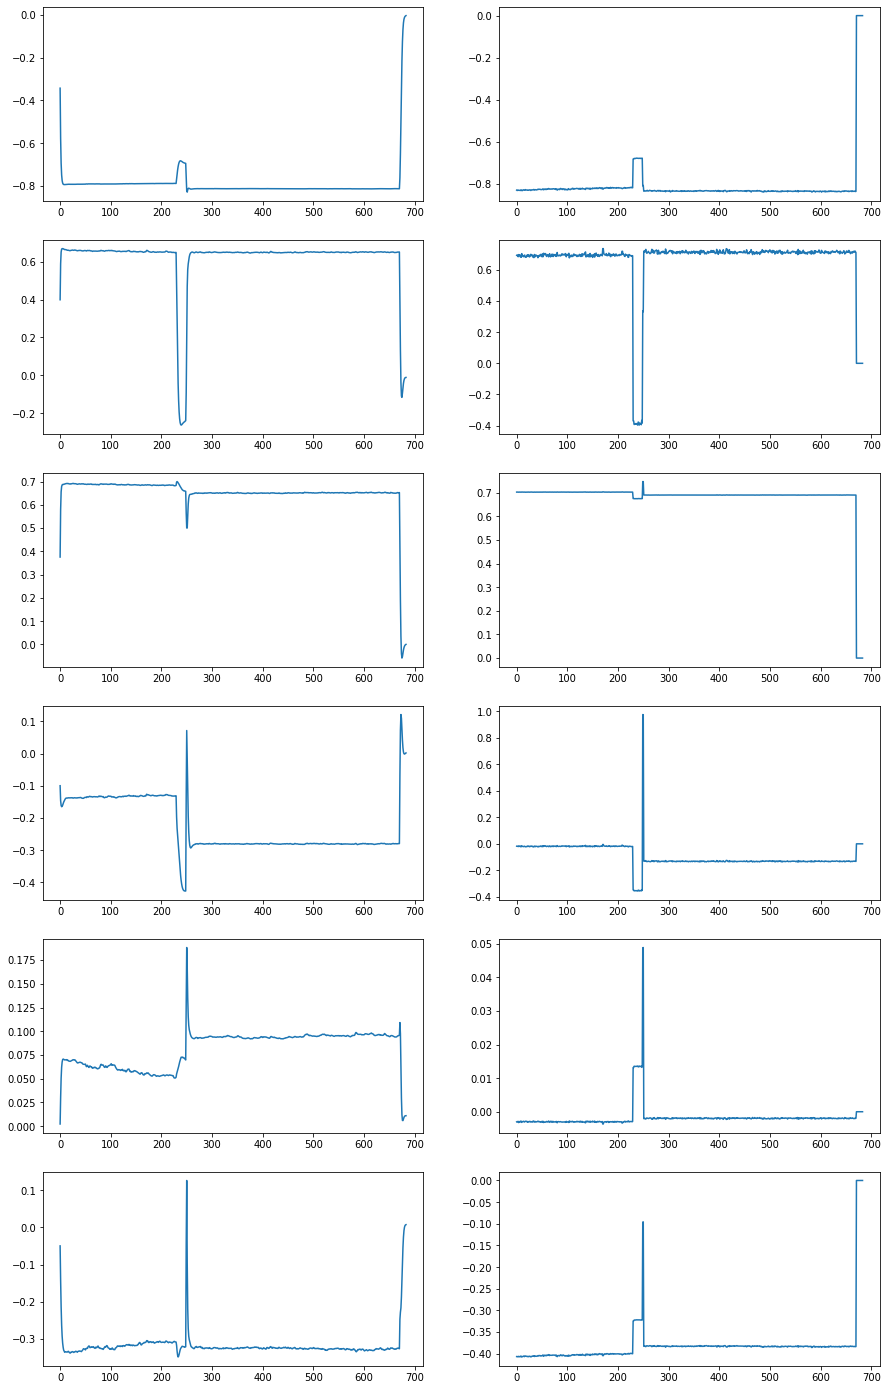

MSE on Anomalies:  tensor(0.0193)
MSE on Normal:  tensor(0.0228)
Epoch [161/500], loss: 0.022982
Epoch [162/500], loss: 0.022789
Epoch [163/500], loss: 0.022600
Epoch [164/500], loss: 0.022414
Epoch [165/500], loss: 0.022231
Epoch [166/500], loss: 0.022051
Epoch [167/500], loss: 0.021874
Epoch [168/500], loss: 0.021700
Epoch [169/500], loss: 0.021529
Epoch [170/500], loss: 0.021361


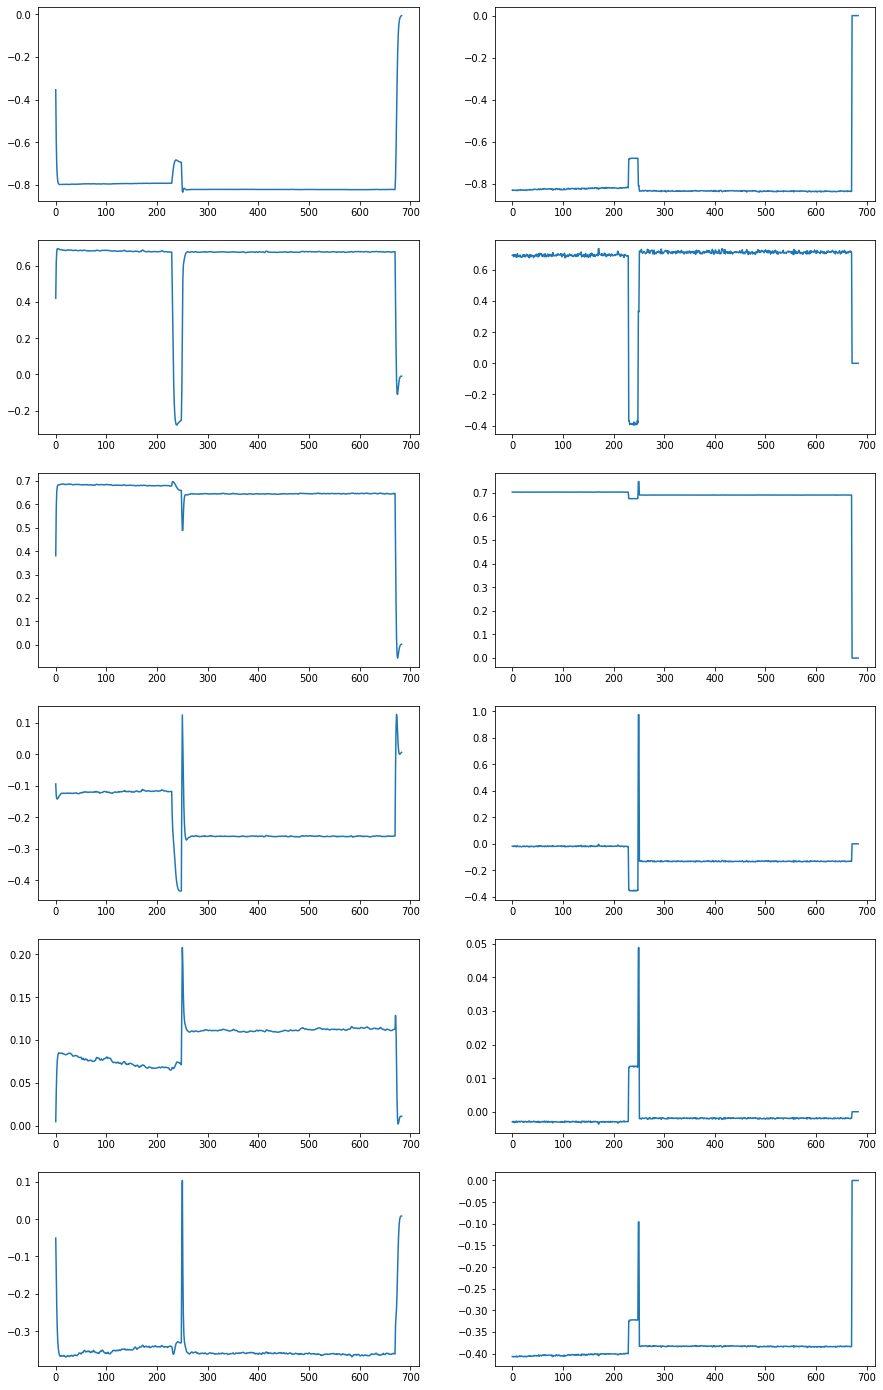

MSE on Anomalies:  tensor(0.0179)
MSE on Normal:  tensor(0.0210)
Epoch [171/500], loss: 0.021196
Epoch [172/500], loss: 0.021033
Epoch [173/500], loss: 0.020873
Epoch [174/500], loss: 0.020715
Epoch [175/500], loss: 0.020559
Epoch [176/500], loss: 0.020406
Epoch [177/500], loss: 0.020255
Epoch [178/500], loss: 0.020106
Epoch [179/500], loss: 0.019959
Epoch [180/500], loss: 0.019813


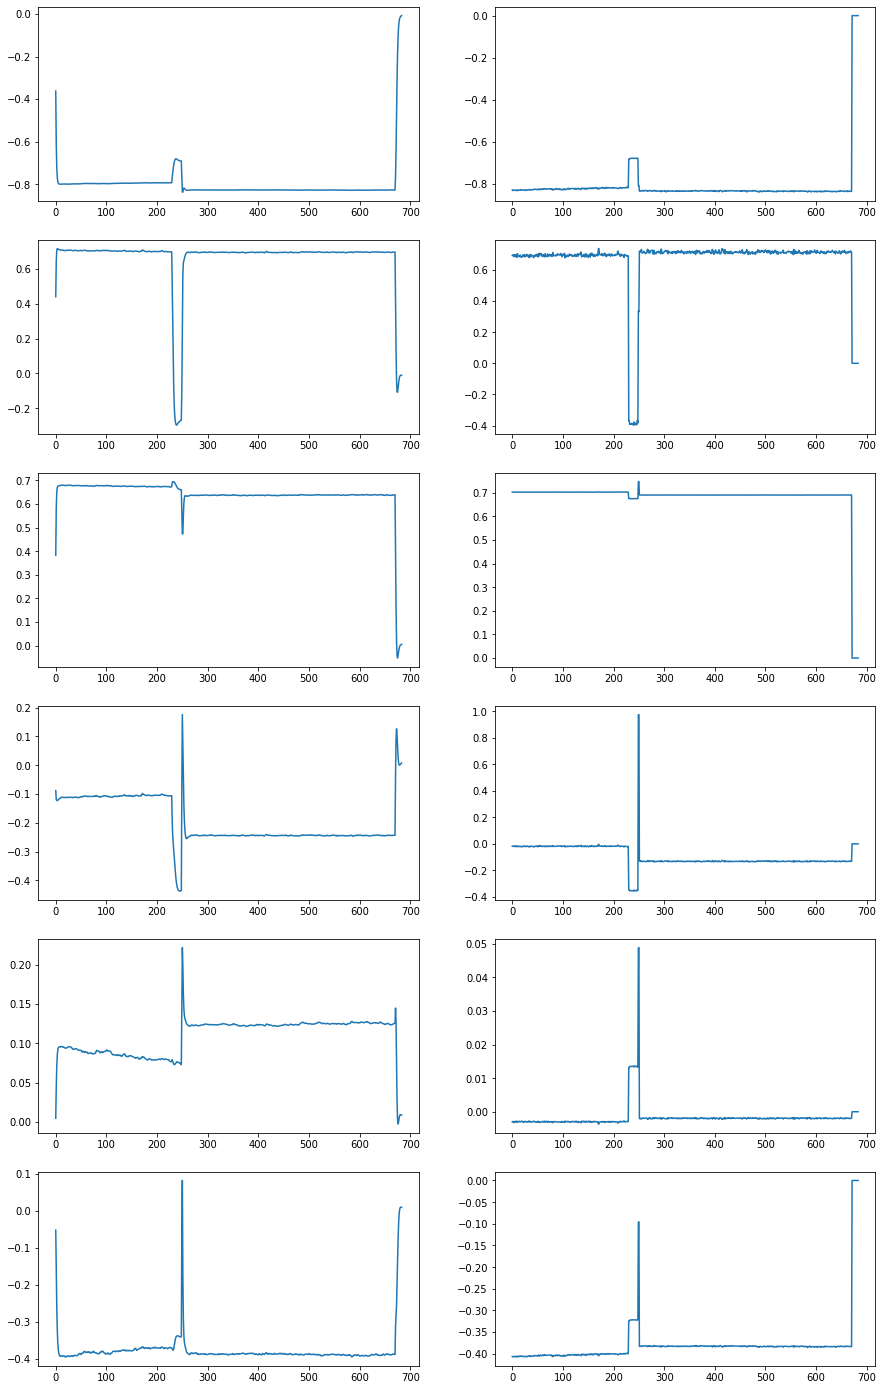

MSE on Anomalies:  tensor(0.0166)
MSE on Normal:  tensor(0.0196)
Epoch [181/500], loss: 0.019670
Epoch [182/500], loss: 0.019528
Epoch [183/500], loss: 0.019388
Epoch [184/500], loss: 0.019249
Epoch [185/500], loss: 0.019112
Epoch [186/500], loss: 0.018977
Epoch [187/500], loss: 0.018843
Epoch [188/500], loss: 0.018710
Epoch [189/500], loss: 0.018579
Epoch [190/500], loss: 0.018449


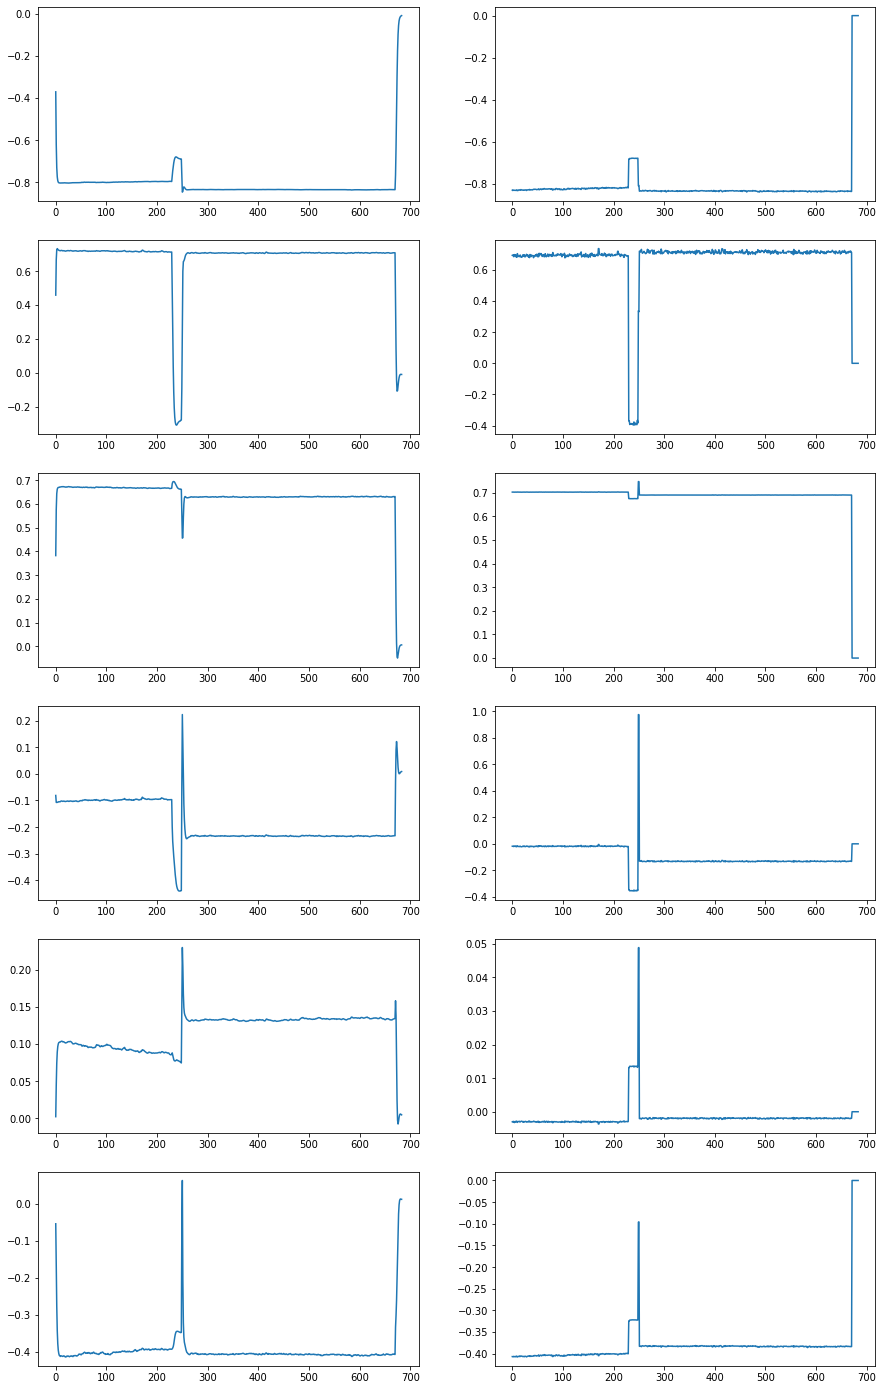

MSE on Anomalies:  tensor(0.0155)
MSE on Normal:  tensor(0.0183)
Epoch [191/500], loss: 0.018321
Epoch [192/500], loss: 0.018194
Epoch [193/500], loss: 0.018068
Epoch [194/500], loss: 0.017943
Epoch [195/500], loss: 0.017820
Epoch [196/500], loss: 0.017698
Epoch [197/500], loss: 0.017577
Epoch [198/500], loss: 0.017457
Epoch [199/500], loss: 0.017338
Epoch [200/500], loss: 0.017220


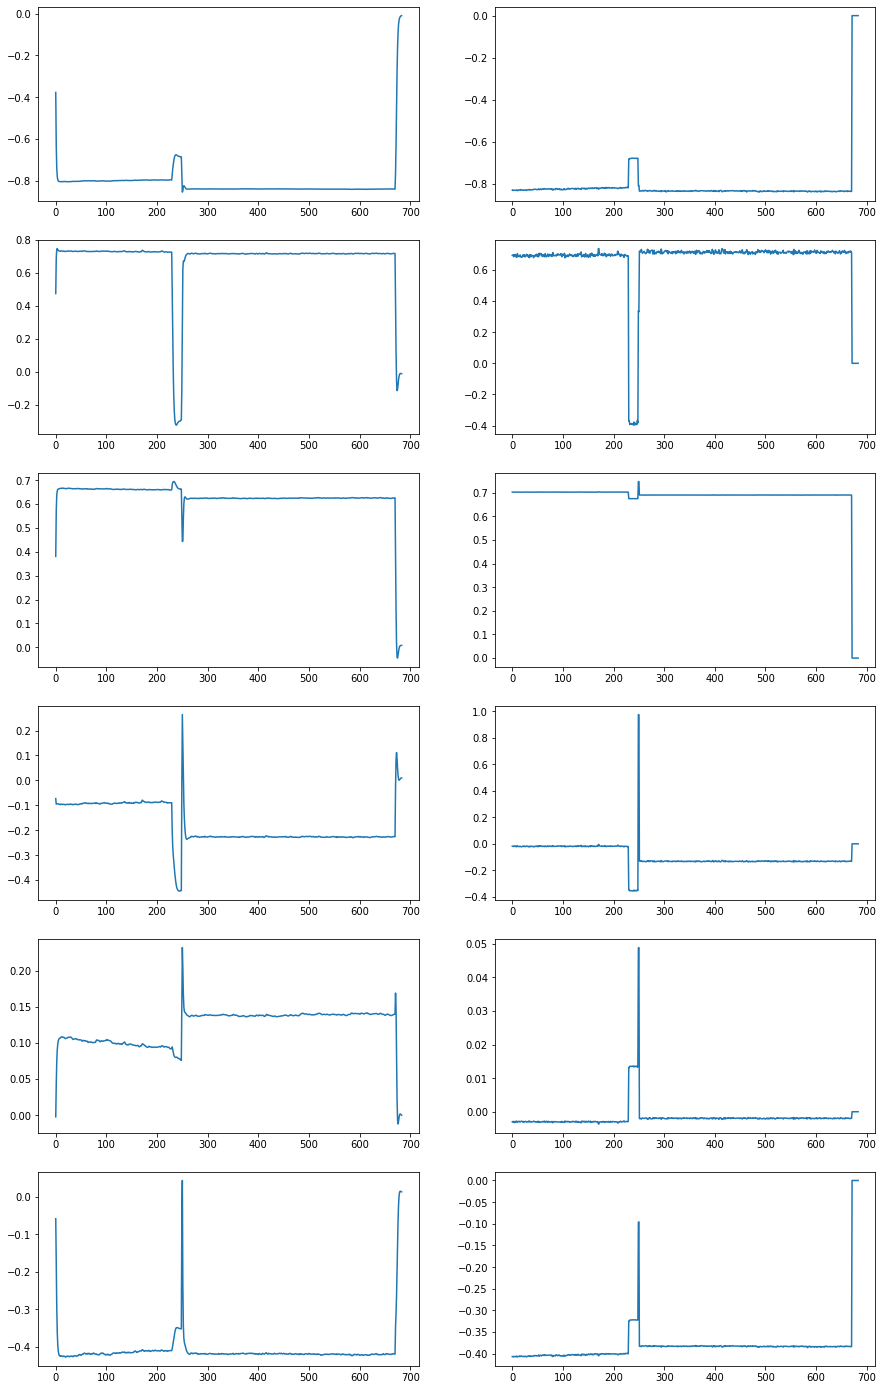

MSE on Anomalies:  tensor(0.0144)
MSE on Normal:  tensor(0.0171)
Epoch [201/500], loss: 0.017103
Epoch [202/500], loss: 0.016988
Epoch [203/500], loss: 0.016873
Epoch [204/500], loss: 0.016759
Epoch [205/500], loss: 0.016647
Epoch [206/500], loss: 0.016535
Epoch [207/500], loss: 0.016424
Epoch [208/500], loss: 0.016315
Epoch [209/500], loss: 0.016206
Epoch [210/500], loss: 0.016098


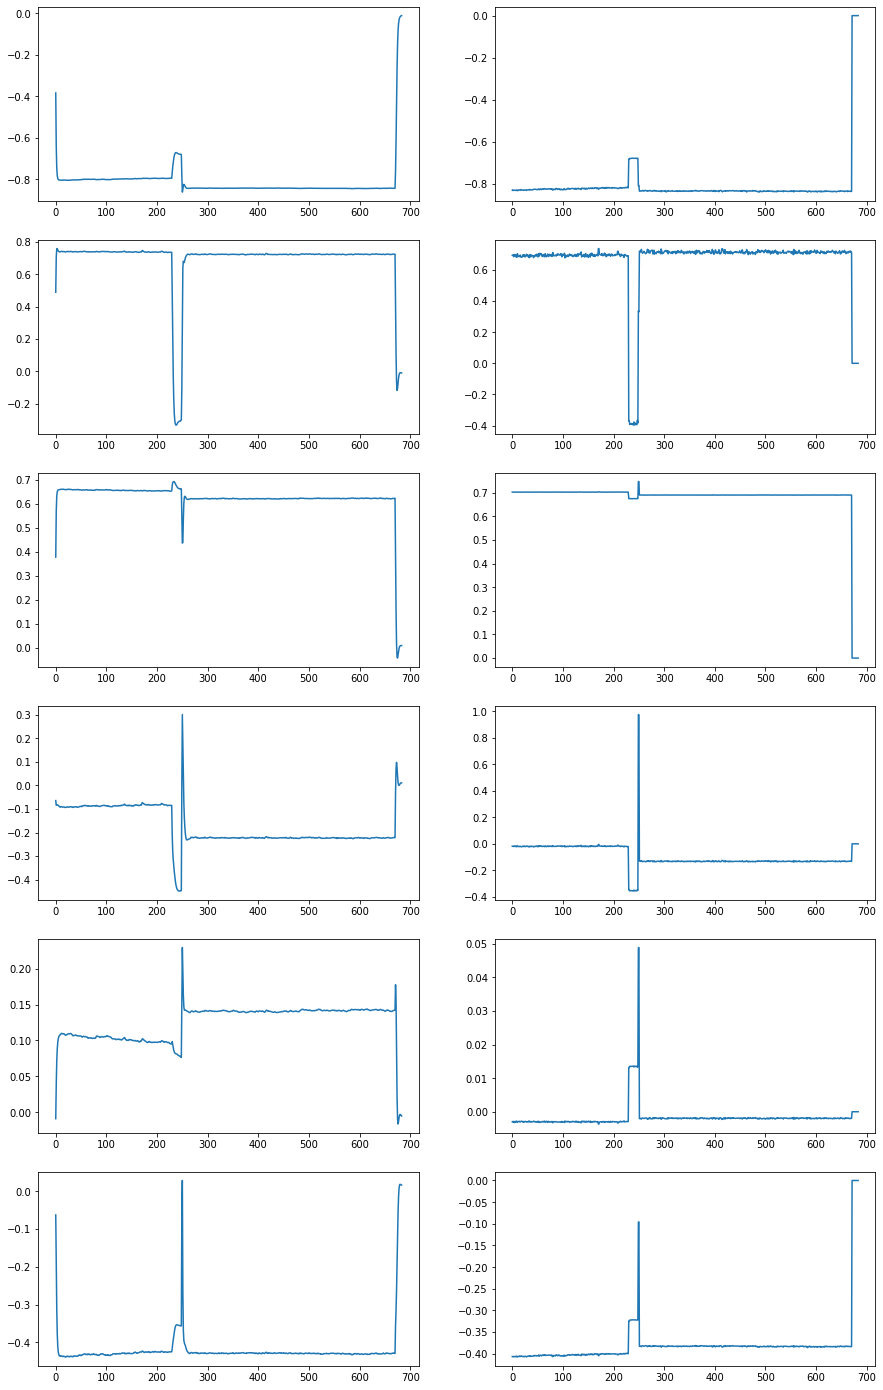

MSE on Anomalies:  tensor(0.0135)
MSE on Normal:  tensor(0.0160)
Epoch [211/500], loss: 0.015991
Epoch [212/500], loss: 0.015884
Epoch [213/500], loss: 0.015779
Epoch [214/500], loss: 0.015675
Epoch [215/500], loss: 0.015571
Epoch [216/500], loss: 0.015468
Epoch [217/500], loss: 0.015367
Epoch [218/500], loss: 0.015266
Epoch [219/500], loss: 0.015165
Epoch [220/500], loss: 0.015066


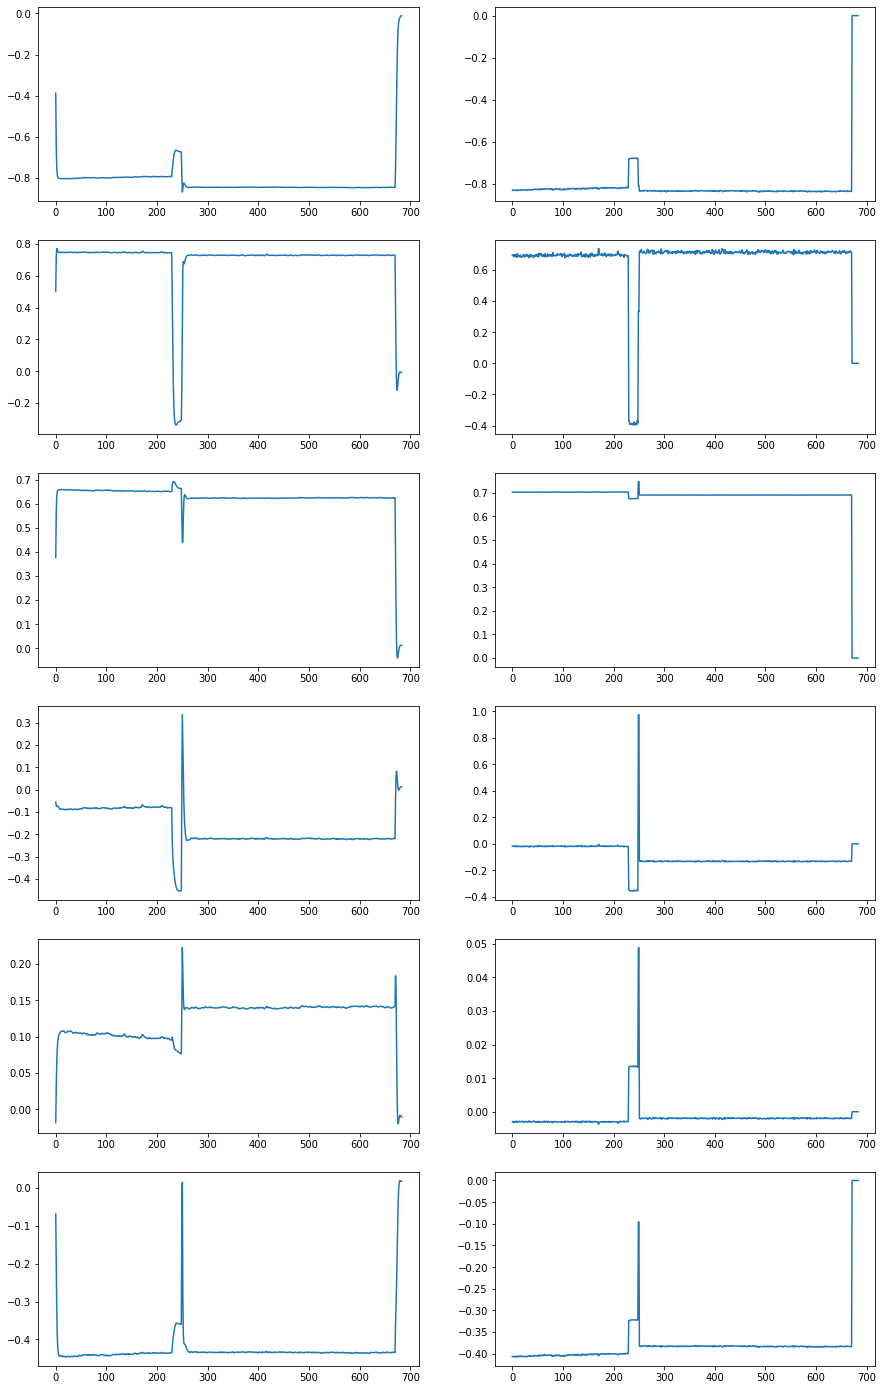

MSE on Anomalies:  tensor(0.0125)
MSE on Normal:  tensor(0.0150)
Epoch [221/500], loss: 0.014968
Epoch [222/500], loss: 0.014870
Epoch [223/500], loss: 0.014773
Epoch [224/500], loss: 0.014678
Epoch [225/500], loss: 0.014583
Epoch [226/500], loss: 0.014488
Epoch [227/500], loss: 0.014395
Epoch [228/500], loss: 0.014303
Epoch [229/500], loss: 0.014212
Epoch [230/500], loss: 0.014121


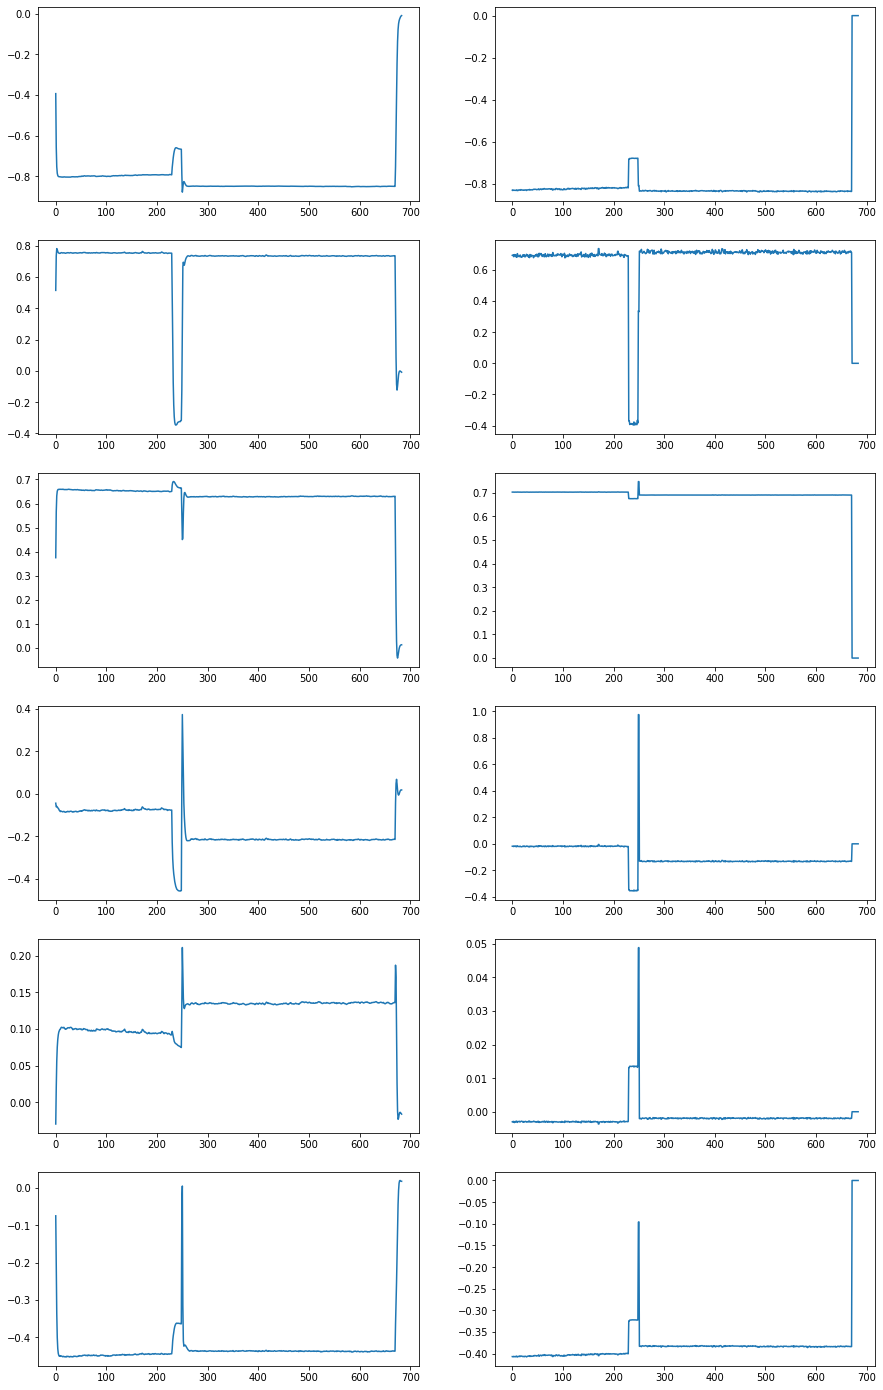

MSE on Anomalies:  tensor(0.0117)
MSE on Normal:  tensor(0.0141)
Epoch [231/500], loss: 0.014032
Epoch [232/500], loss: 0.013943
Epoch [233/500], loss: 0.013855
Epoch [234/500], loss: 0.013769
Epoch [235/500], loss: 0.013683
Epoch [236/500], loss: 0.013598
Epoch [237/500], loss: 0.013514
Epoch [238/500], loss: 0.013432
Epoch [239/500], loss: 0.013350
Epoch [240/500], loss: 0.013269


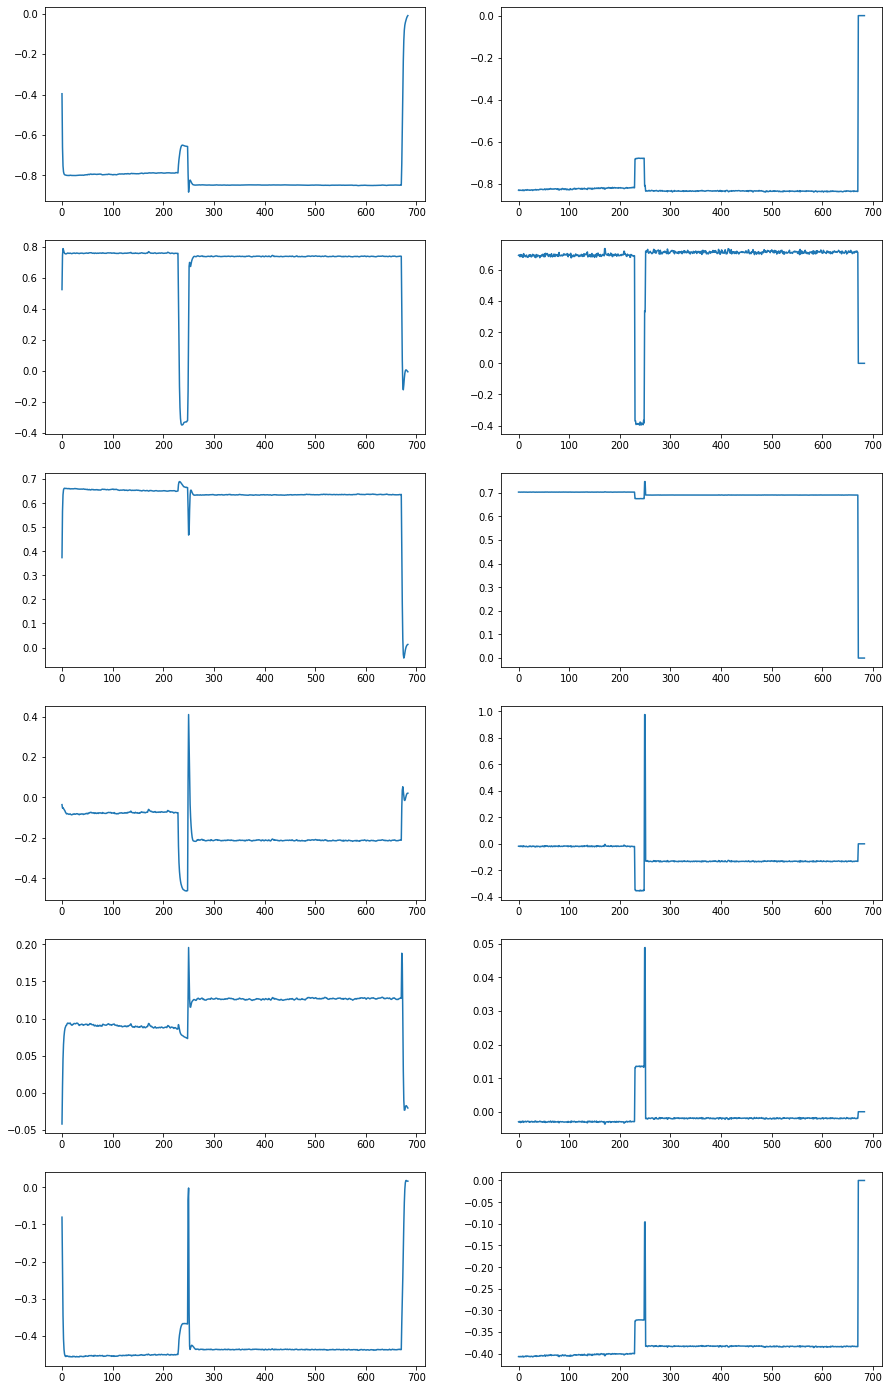

MSE on Anomalies:  tensor(0.0109)
MSE on Normal:  tensor(0.0133)
Epoch [241/500], loss: 0.013189
Epoch [242/500], loss: 0.013111
Epoch [243/500], loss: 0.013033
Epoch [244/500], loss: 0.012956
Epoch [245/500], loss: 0.012880
Epoch [246/500], loss: 0.012805
Epoch [247/500], loss: 0.012732
Epoch [248/500], loss: 0.012659
Epoch [249/500], loss: 0.012587
Epoch [250/500], loss: 0.012516


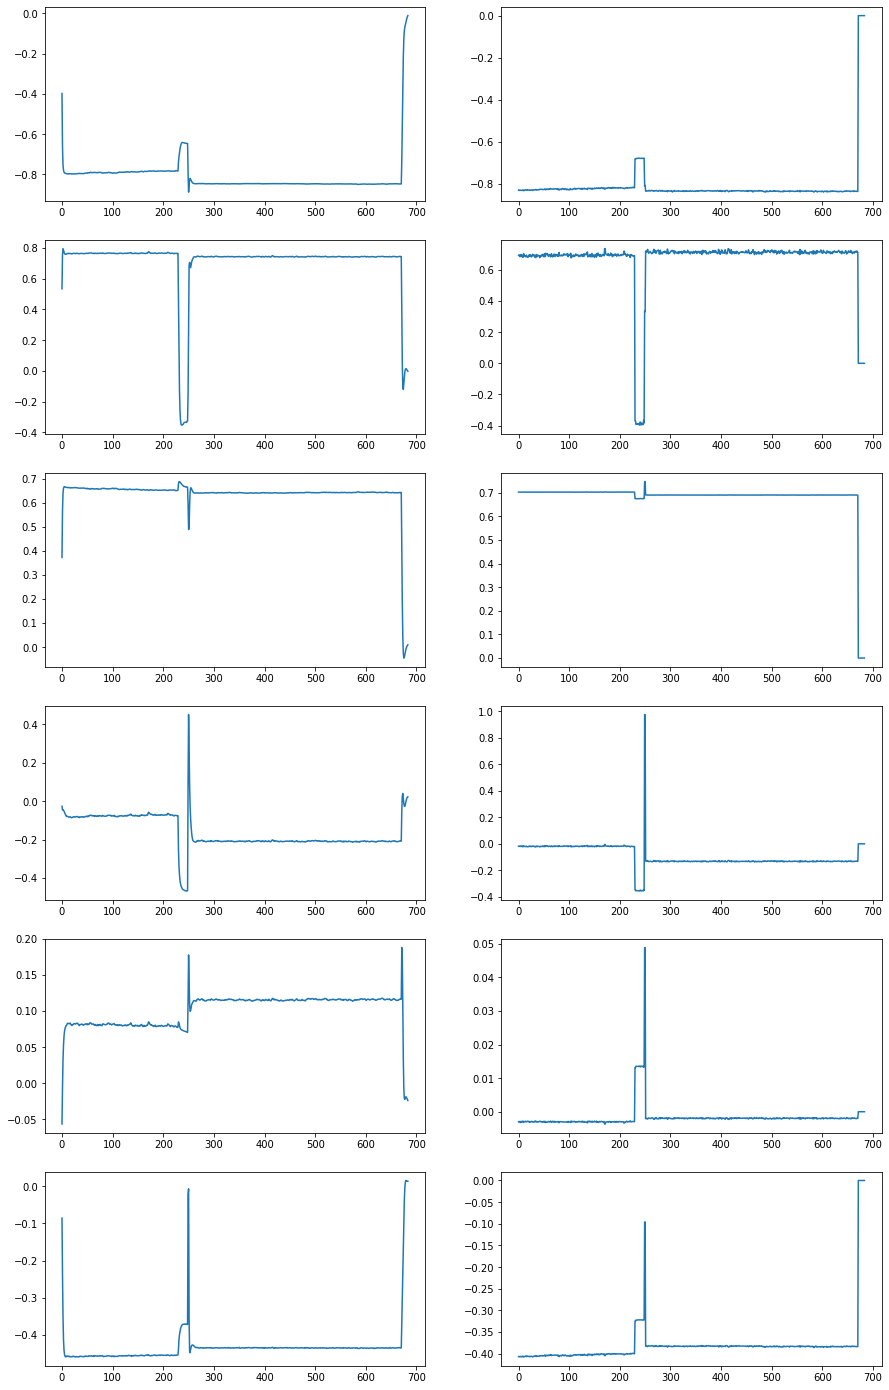

MSE on Anomalies:  tensor(0.0102)
MSE on Normal:  tensor(0.0125)
Epoch [251/500], loss: 0.012446
Epoch [252/500], loss: 0.012377
Epoch [253/500], loss: 0.012309
Epoch [254/500], loss: 0.012241
Epoch [255/500], loss: 0.012175
Epoch [256/500], loss: 0.012109
Epoch [257/500], loss: 0.012044
Epoch [258/500], loss: 0.011980
Epoch [259/500], loss: 0.011917
Epoch [260/500], loss: 0.011854


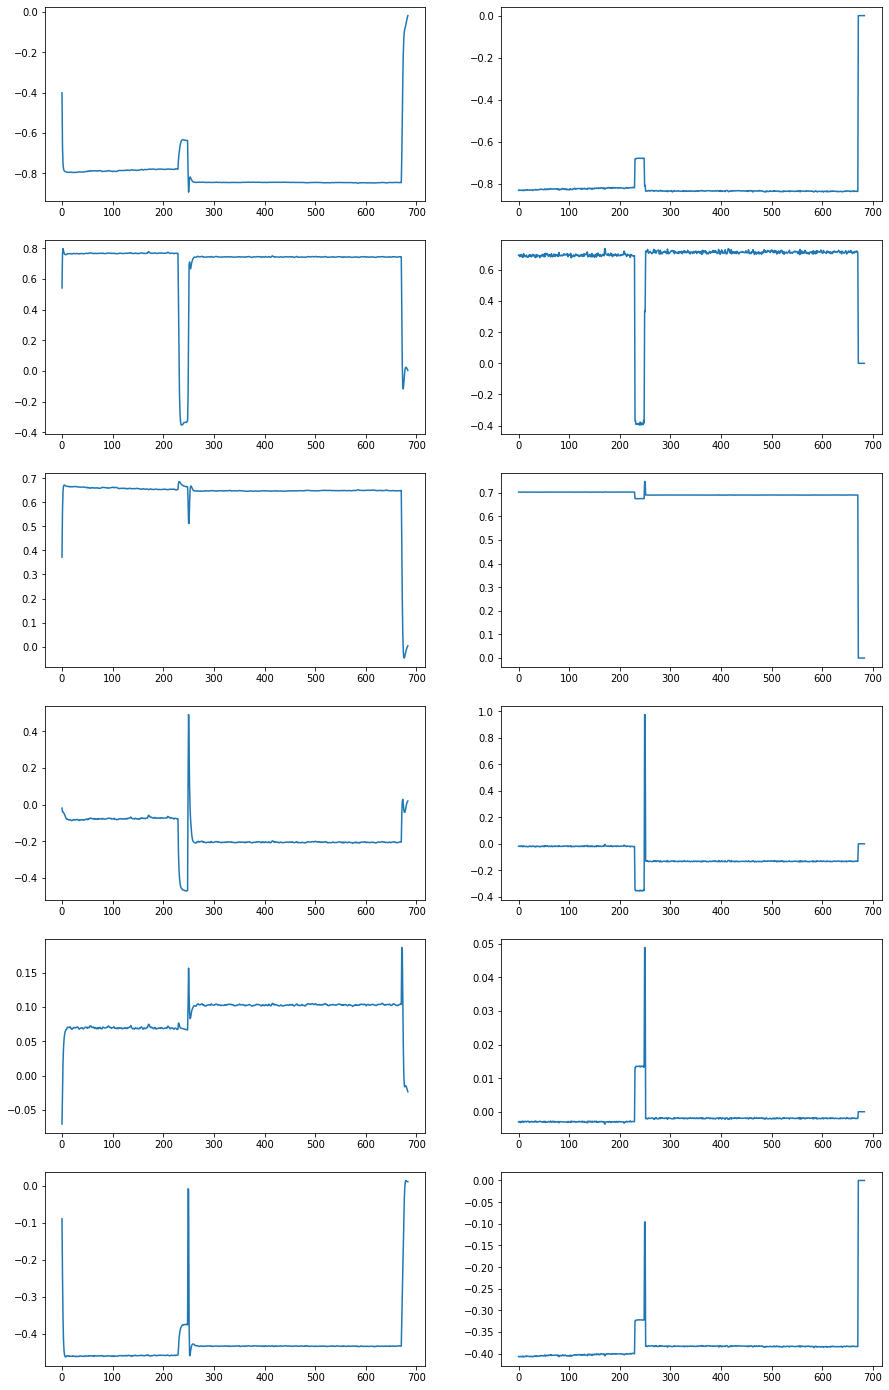

MSE on Anomalies:  tensor(0.0095)
MSE on Normal:  tensor(0.0119)
Epoch [261/500], loss: 0.011793
Epoch [262/500], loss: 0.011732
Epoch [263/500], loss: 0.011671
Epoch [264/500], loss: 0.011612
Epoch [265/500], loss: 0.011552
Epoch [266/500], loss: 0.011494
Epoch [267/500], loss: 0.011436
Epoch [268/500], loss: 0.011379
Epoch [269/500], loss: 0.011322
Epoch [270/500], loss: 0.011266


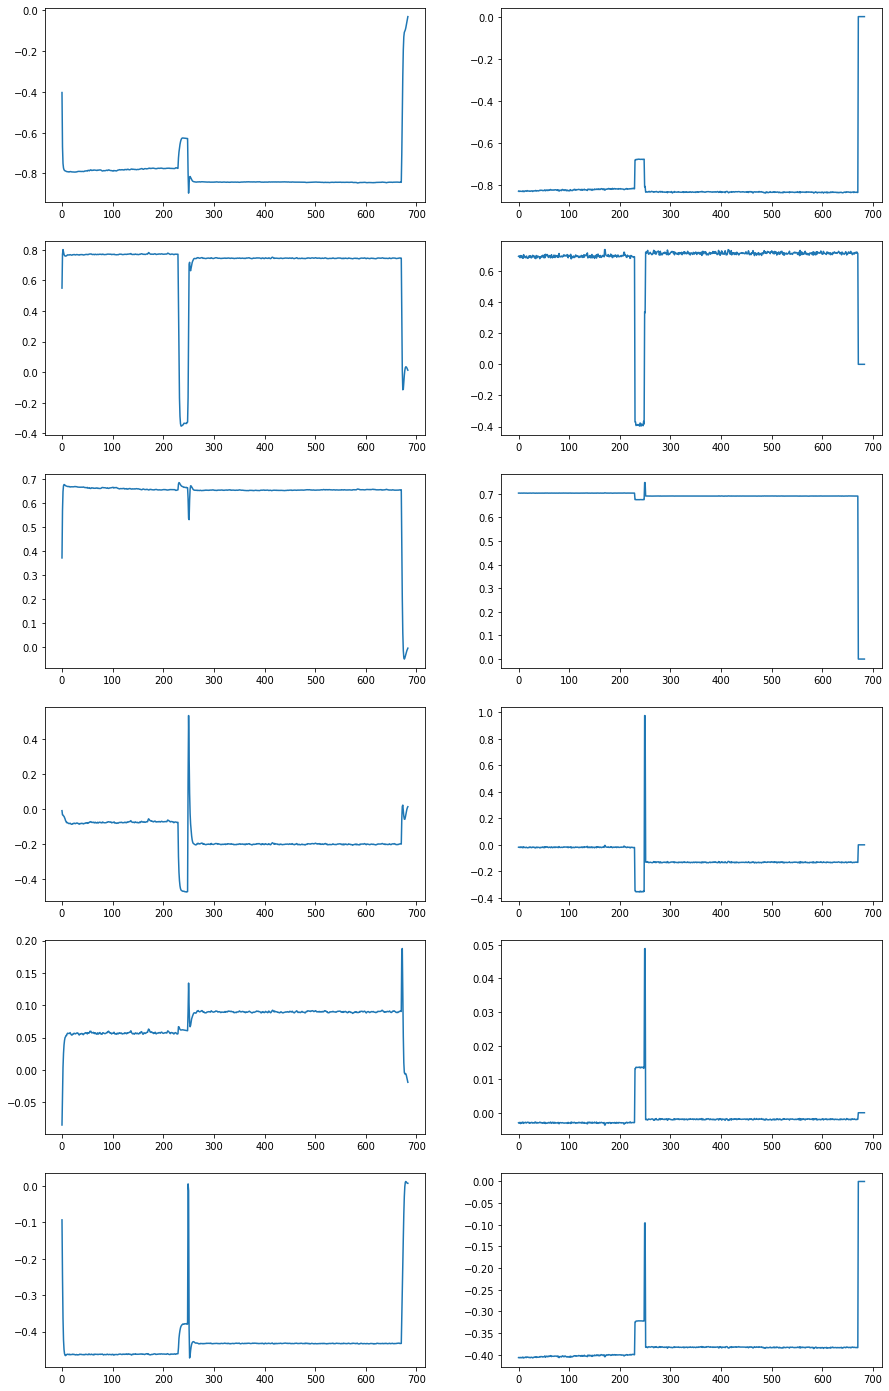

MSE on Anomalies:  tensor(0.0090)
MSE on Normal:  tensor(0.0113)
Epoch [271/500], loss: 0.011210
Epoch [272/500], loss: 0.011154
Epoch [273/500], loss: 0.011100
Epoch [274/500], loss: 0.011045
Epoch [275/500], loss: 0.010991
Epoch [276/500], loss: 0.010938
Epoch [277/500], loss: 0.010884
Epoch [278/500], loss: 0.010832
Epoch [279/500], loss: 0.010779
Epoch [280/500], loss: 0.010727


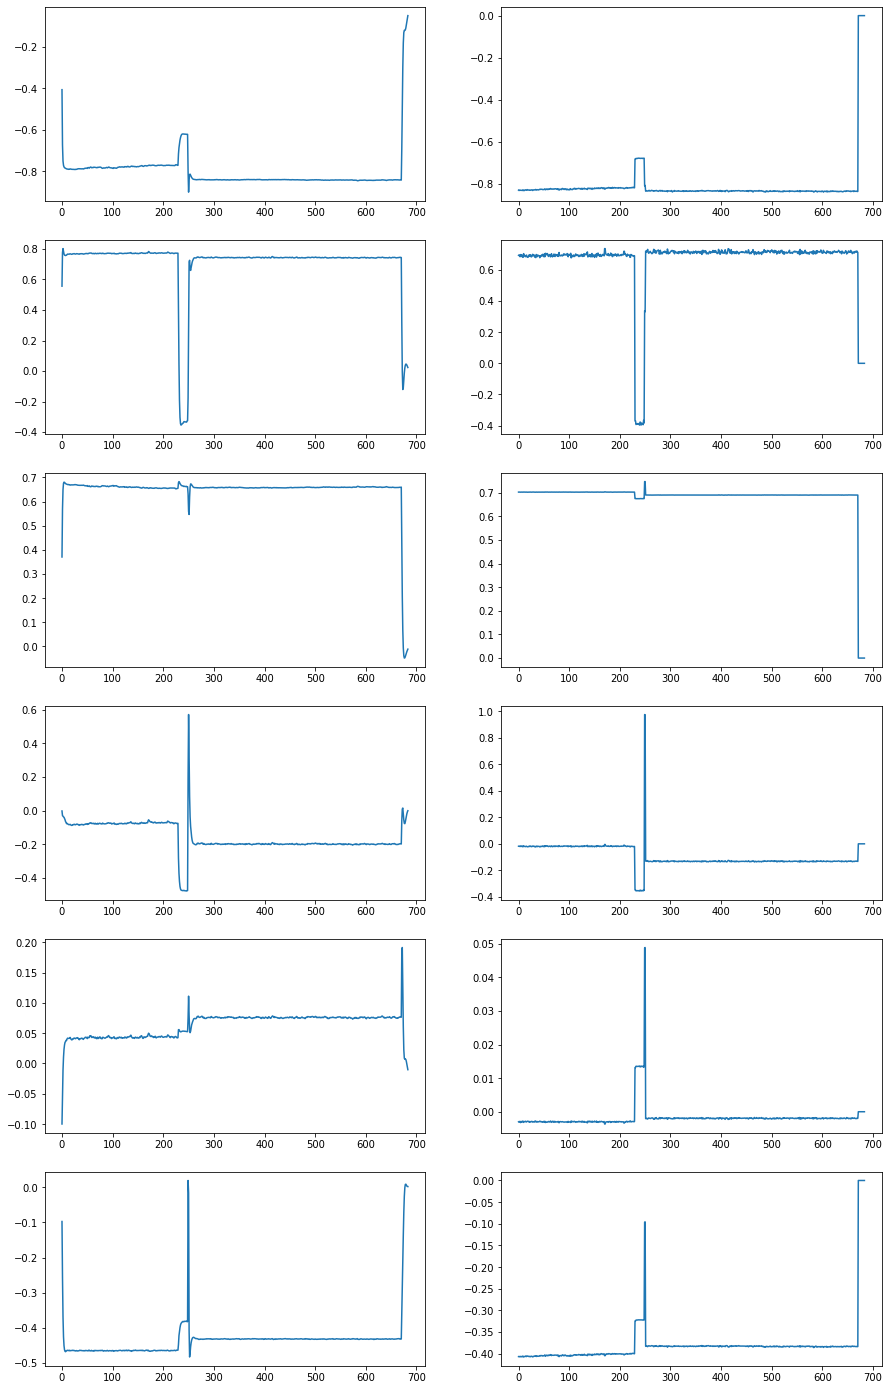

MSE on Anomalies:  tensor(0.0085)
MSE on Normal:  tensor(0.0108)
Epoch [281/500], loss: 0.010675
Epoch [282/500], loss: 0.010624
Epoch [283/500], loss: 0.010573
Epoch [284/500], loss: 0.010522
Epoch [285/500], loss: 0.010472
Epoch [286/500], loss: 0.010422
Epoch [287/500], loss: 0.010372
Epoch [288/500], loss: 0.010323
Epoch [289/500], loss: 0.010274
Epoch [290/500], loss: 0.010226


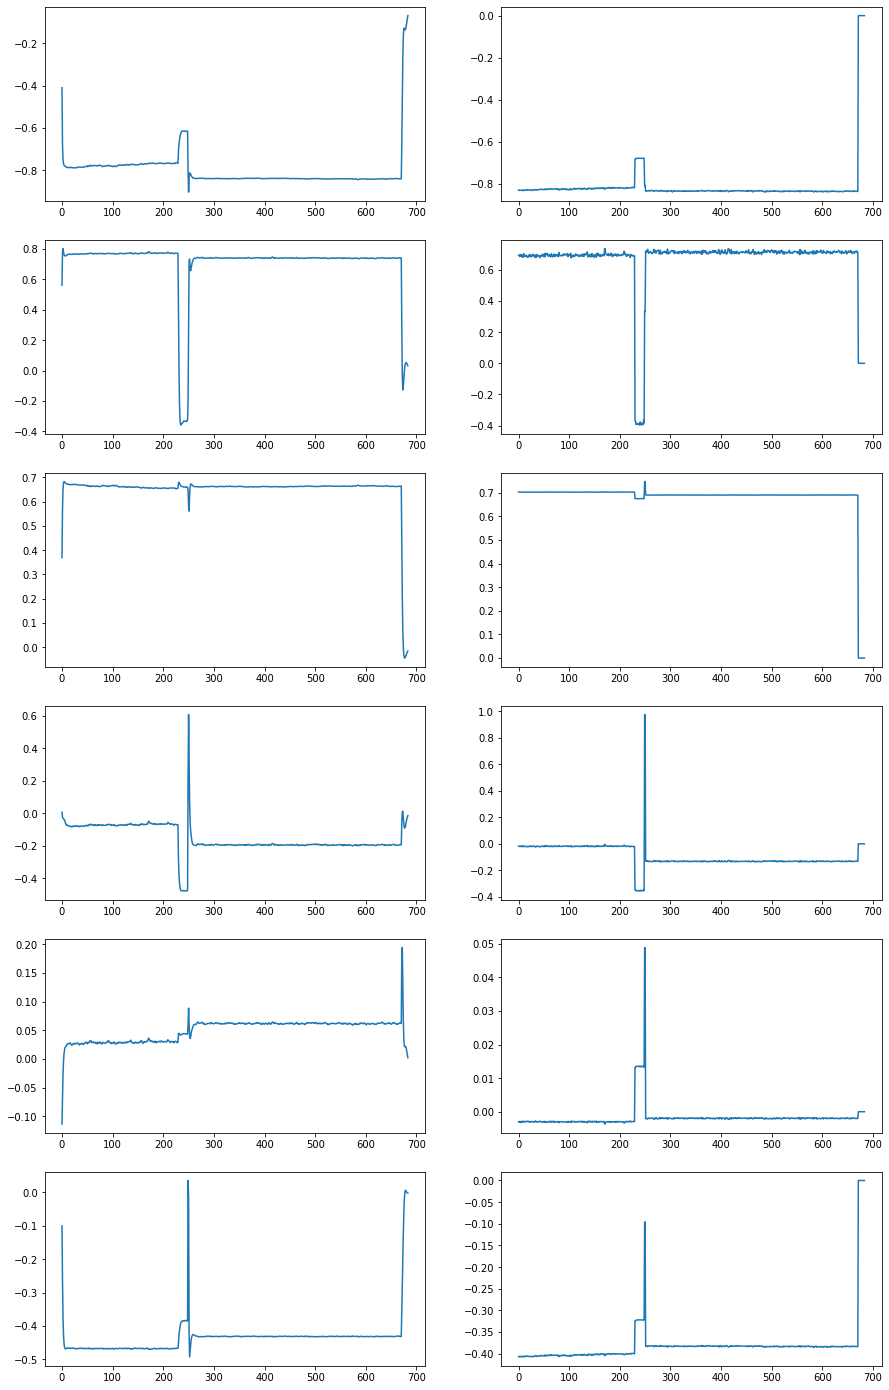

MSE on Anomalies:  tensor(0.0081)
MSE on Normal:  tensor(0.0103)
Epoch [291/500], loss: 0.010178
Epoch [292/500], loss: 0.010130
Epoch [293/500], loss: 0.010083
Epoch [294/500], loss: 0.010036
Epoch [295/500], loss: 0.009990
Epoch [296/500], loss: 0.009944
Epoch [297/500], loss: 0.009899
Epoch [298/500], loss: 0.009854
Epoch [299/500], loss: 0.009810
Epoch [300/500], loss: 0.009766


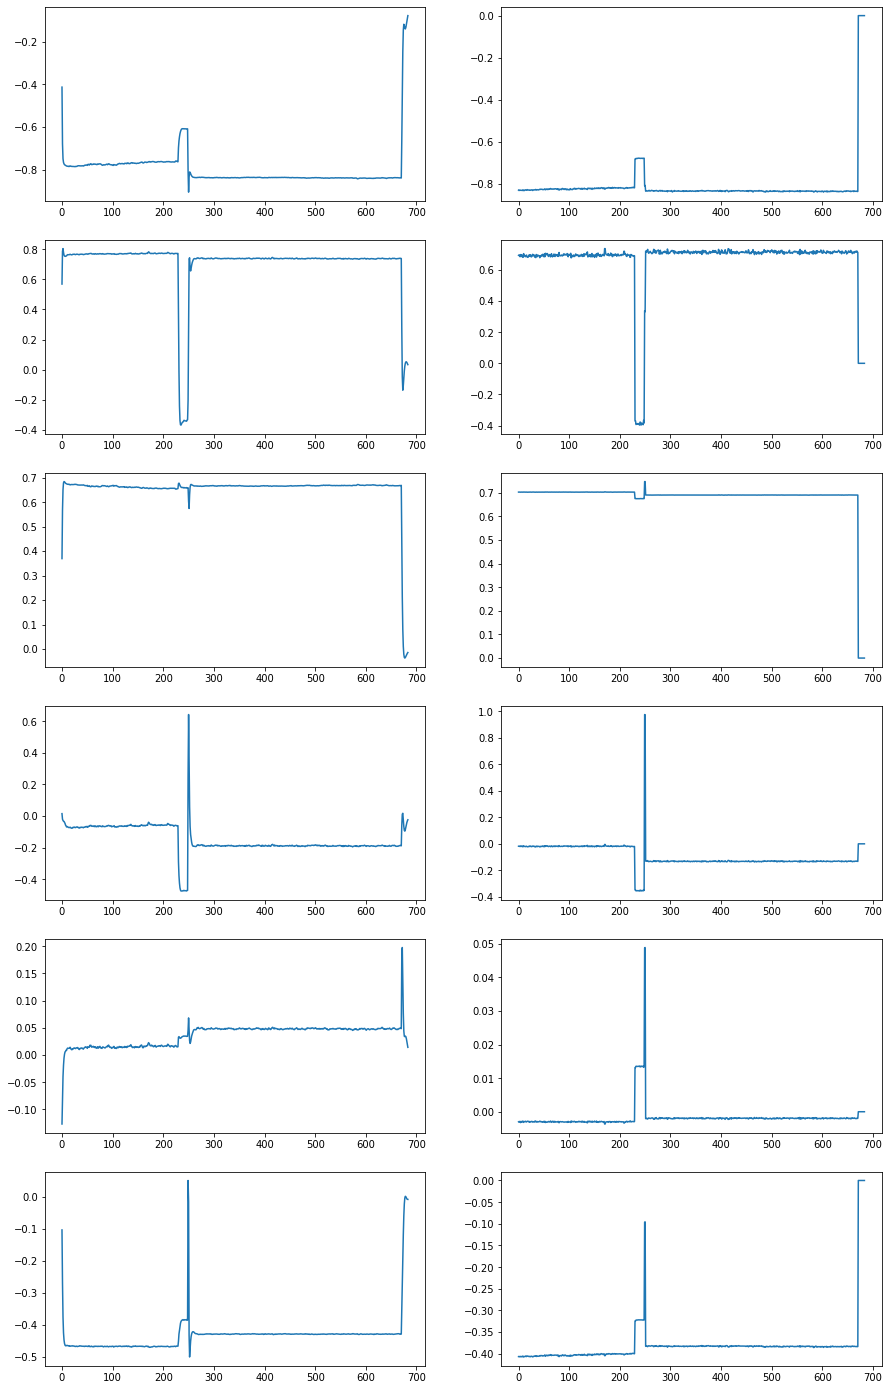

MSE on Anomalies:  tensor(0.0078)
MSE on Normal:  tensor(0.0099)
Epoch [301/500], loss: 0.009723
Epoch [302/500], loss: 0.009681
Epoch [303/500], loss: 0.009639
Epoch [304/500], loss: 0.009597
Epoch [305/500], loss: 0.009556
Epoch [306/500], loss: 0.009516
Epoch [307/500], loss: 0.009476
Epoch [308/500], loss: 0.009437
Epoch [309/500], loss: 0.009398
Epoch [310/500], loss: 0.009360


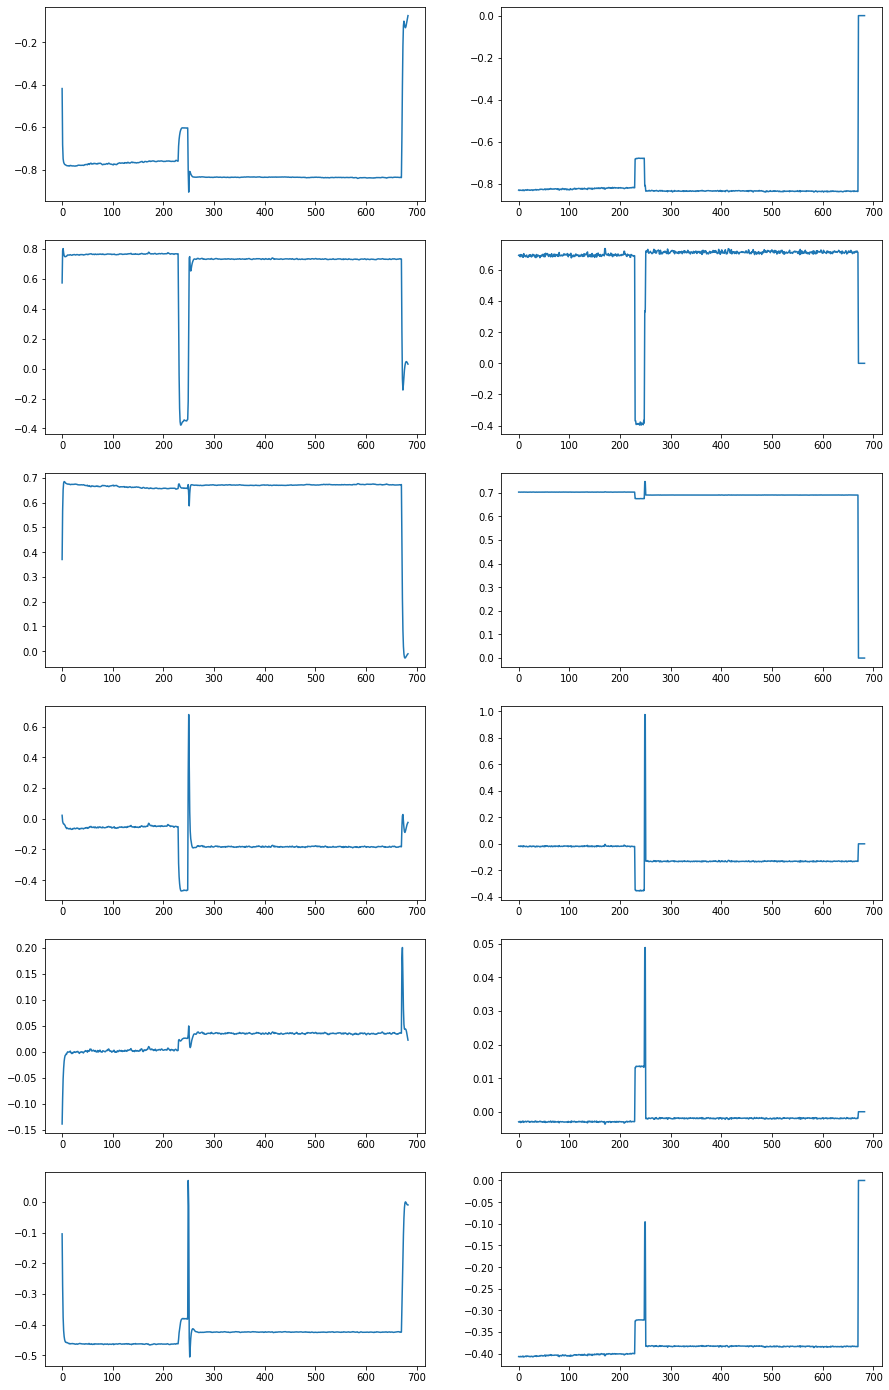

MSE on Anomalies:  tensor(0.0075)
MSE on Normal:  tensor(0.0095)
Epoch [311/500], loss: 0.009322
Epoch [312/500], loss: 0.009285
Epoch [313/500], loss: 0.009248
Epoch [314/500], loss: 0.009212
Epoch [315/500], loss: 0.009177
Epoch [316/500], loss: 0.009142
Epoch [317/500], loss: 0.009107
Epoch [318/500], loss: 0.009074
Epoch [319/500], loss: 0.009040
Epoch [320/500], loss: 0.009007


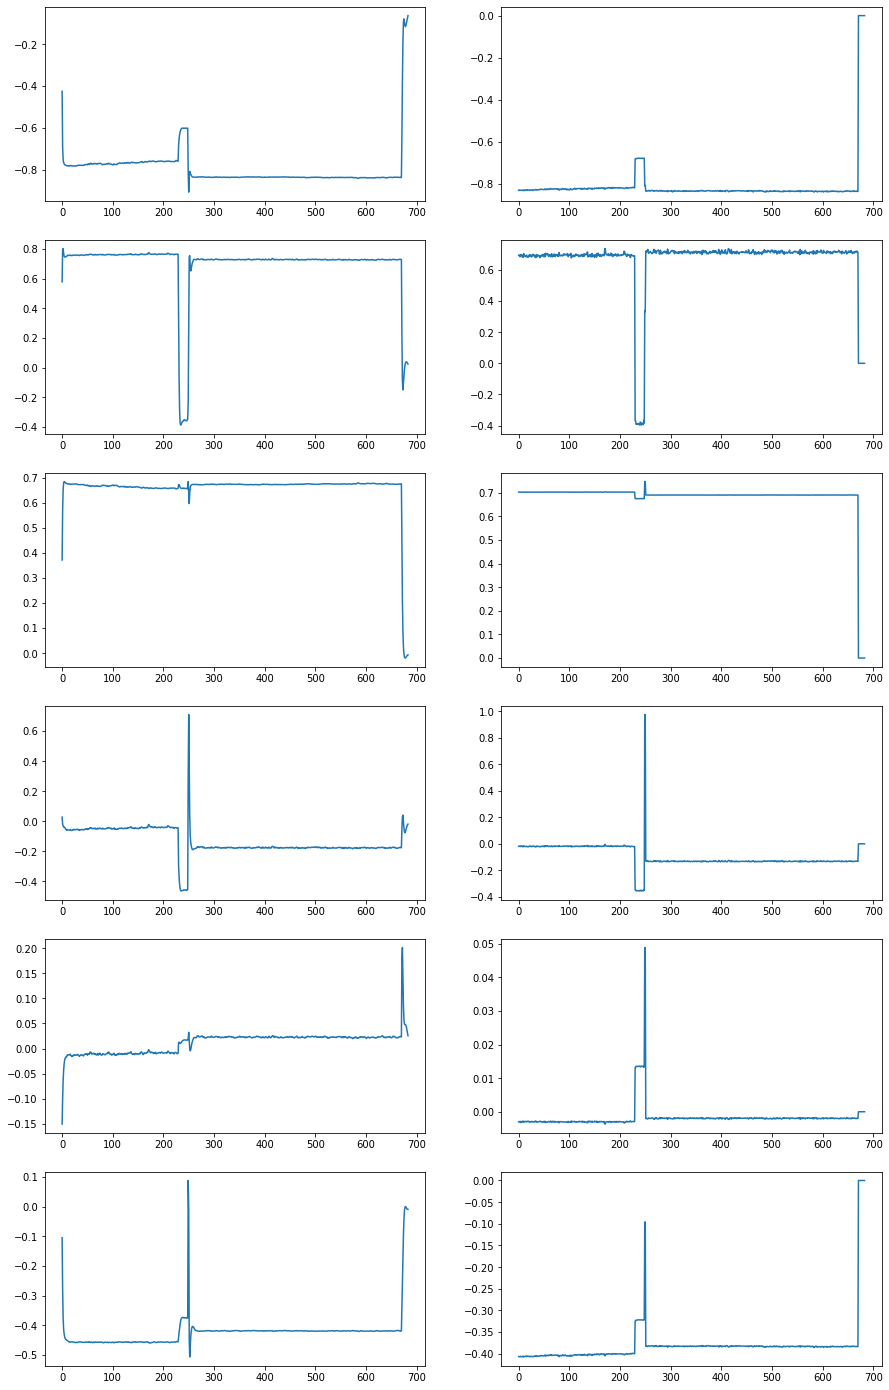

MSE on Anomalies:  tensor(0.0072)
MSE on Normal:  tensor(0.0092)
Epoch [321/500], loss: 0.008974
Epoch [322/500], loss: 0.008942
Epoch [323/500], loss: 0.008911
Epoch [324/500], loss: 0.008880
Epoch [325/500], loss: 0.008849
Epoch [326/500], loss: 0.008818
Epoch [327/500], loss: 0.008789
Epoch [328/500], loss: 0.008759
Epoch [329/500], loss: 0.008730
Epoch [330/500], loss: 0.008701


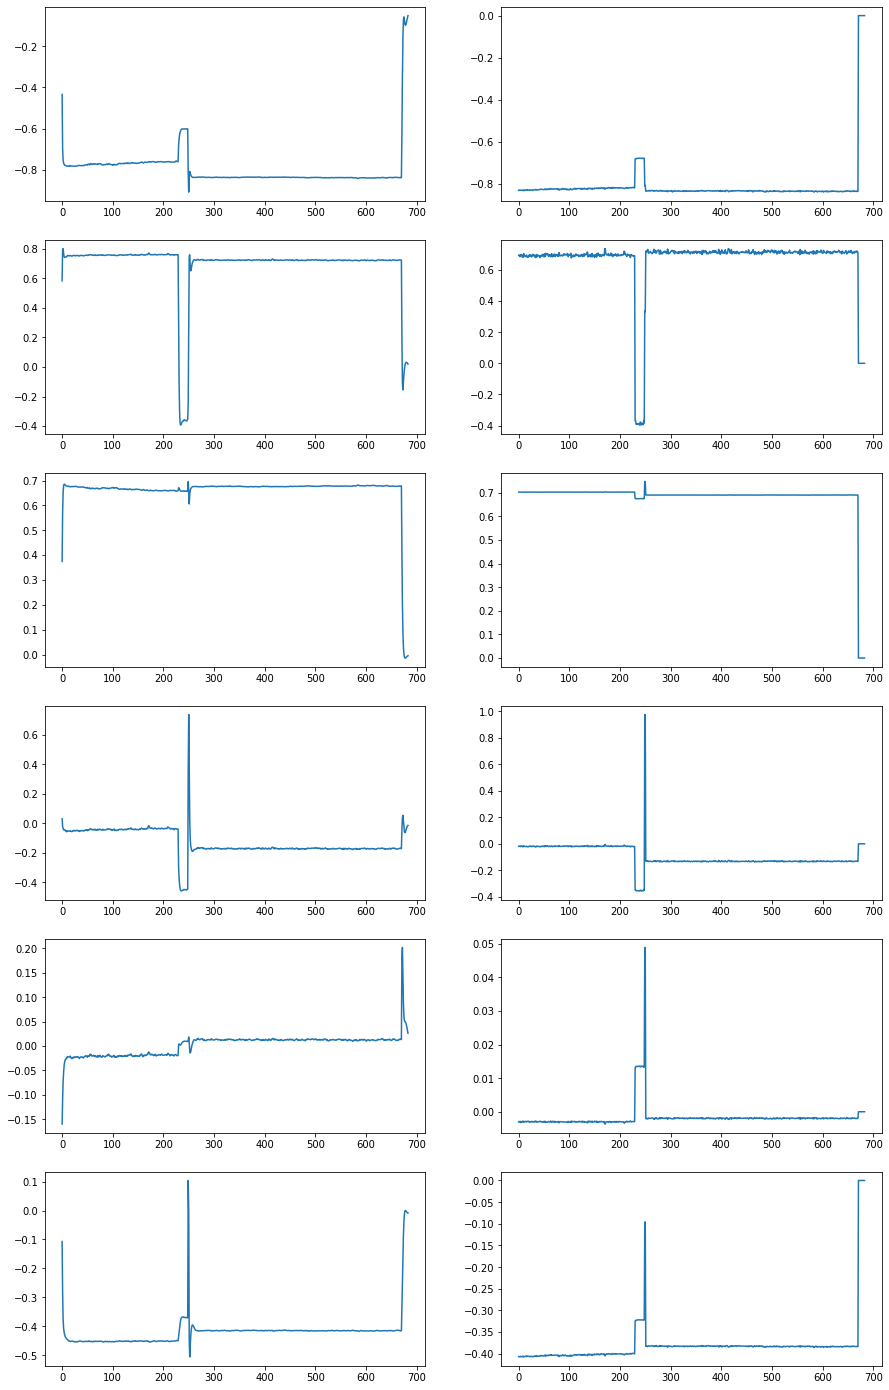

MSE on Anomalies:  tensor(0.0070)
MSE on Normal:  tensor(0.0090)
Epoch [331/500], loss: 0.008673
Epoch [332/500], loss: 0.008645
Epoch [333/500], loss: 0.008617
Epoch [334/500], loss: 0.008590
Epoch [335/500], loss: 0.008563
Epoch [336/500], loss: 0.008536
Epoch [337/500], loss: 0.008510
Epoch [338/500], loss: 0.008484
Epoch [339/500], loss: 0.008458
Epoch [340/500], loss: 0.008432


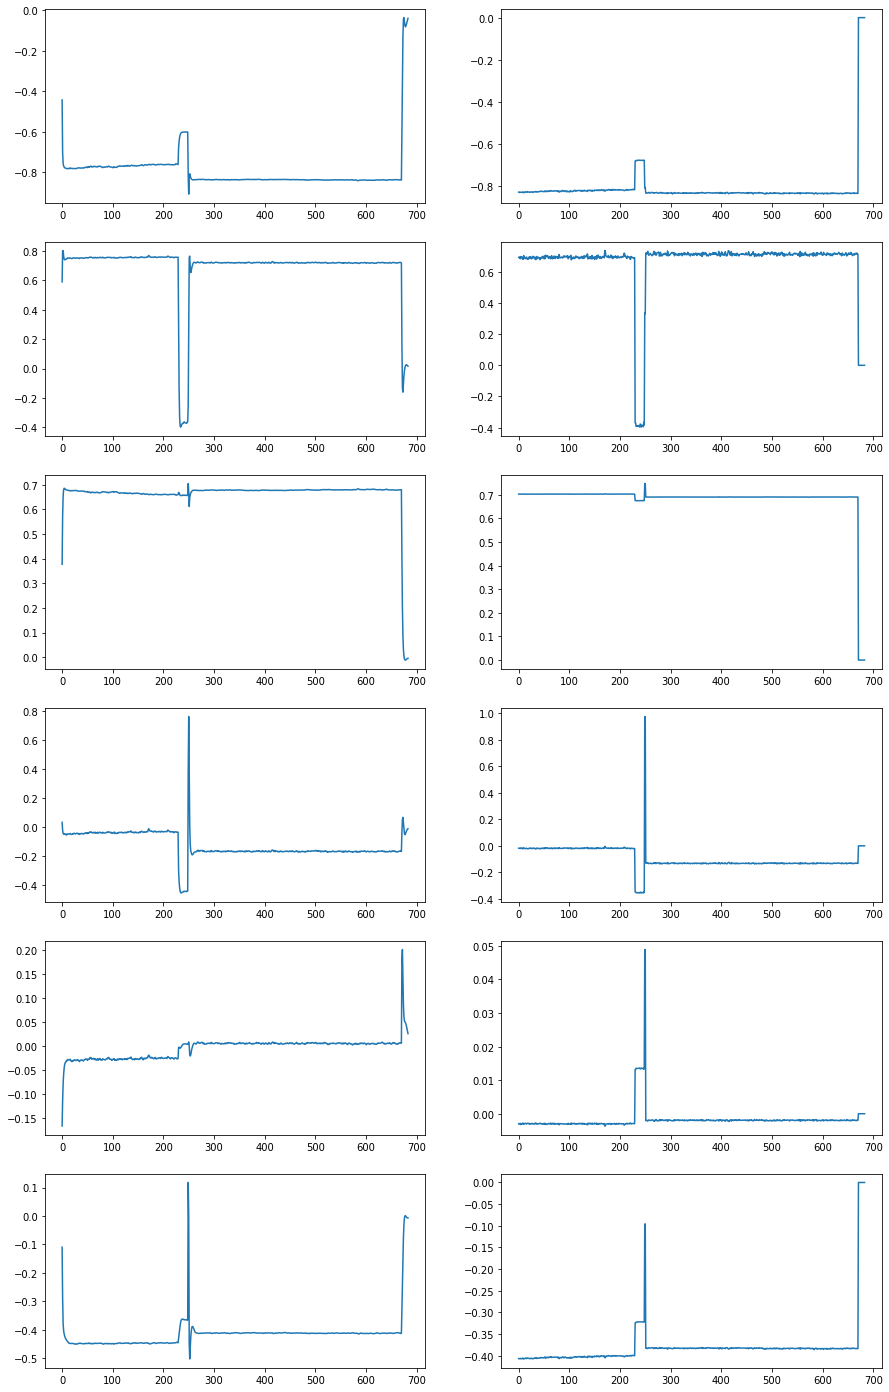

MSE on Anomalies:  tensor(0.0069)
MSE on Normal:  tensor(0.0087)
Epoch [341/500], loss: 0.008407
Epoch [342/500], loss: 0.008382
Epoch [343/500], loss: 0.008358
Epoch [344/500], loss: 0.008333
Epoch [345/500], loss: 0.008309
Epoch [346/500], loss: 0.008286
Epoch [347/500], loss: 0.008262
Epoch [348/500], loss: 0.008239
Epoch [349/500], loss: 0.008216
Epoch [350/500], loss: 0.008193


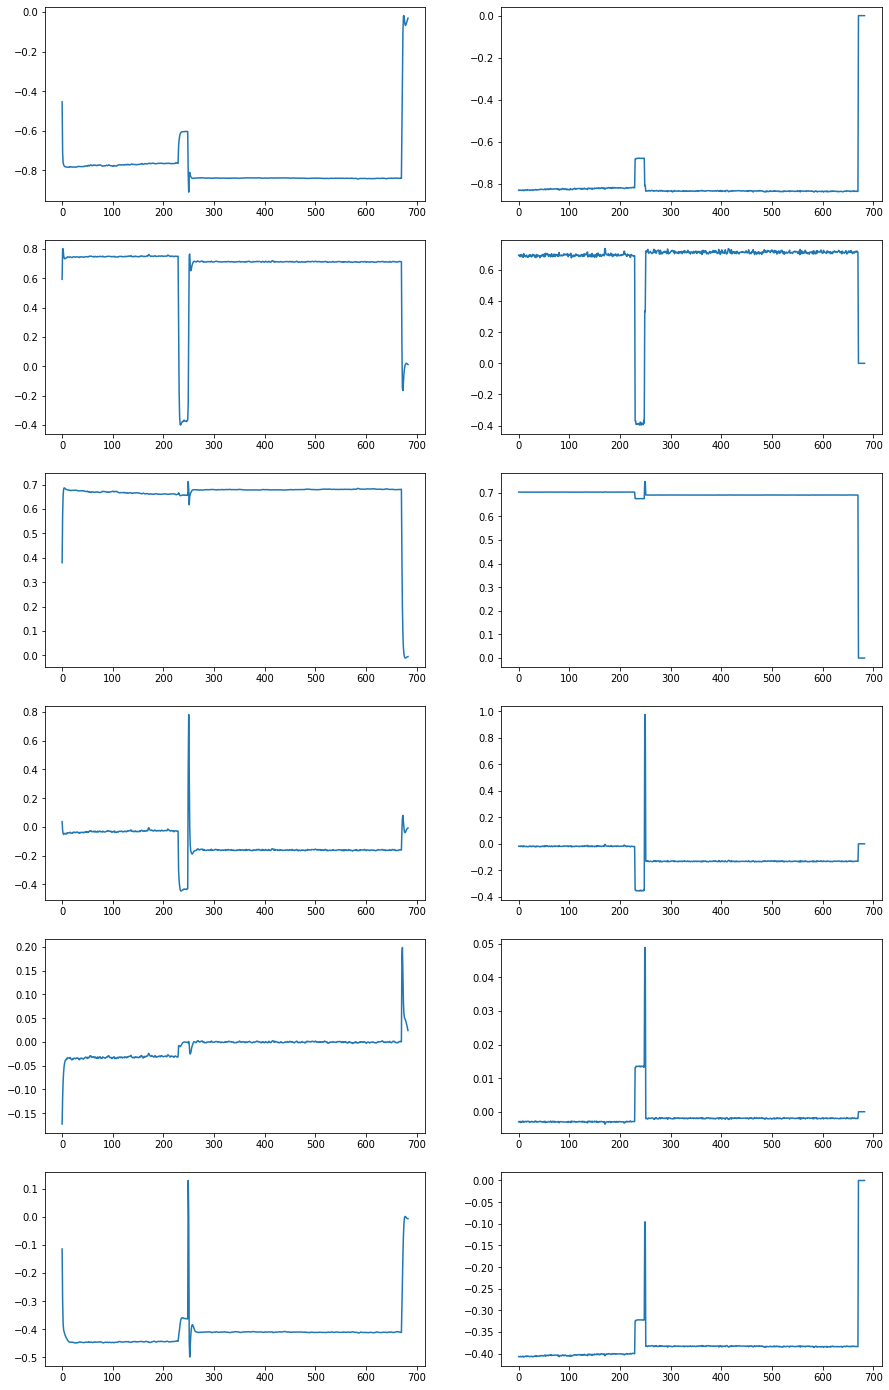

MSE on Anomalies:  tensor(0.0067)
MSE on Normal:  tensor(0.0085)
Epoch [351/500], loss: 0.008170
Epoch [352/500], loss: 0.008148
Epoch [353/500], loss: 0.008125
Epoch [354/500], loss: 0.008103
Epoch [355/500], loss: 0.008081
Epoch [356/500], loss: 0.008060
Epoch [357/500], loss: 0.008038
Epoch [358/500], loss: 0.008017
Epoch [359/500], loss: 0.007996
Epoch [360/500], loss: 0.007975


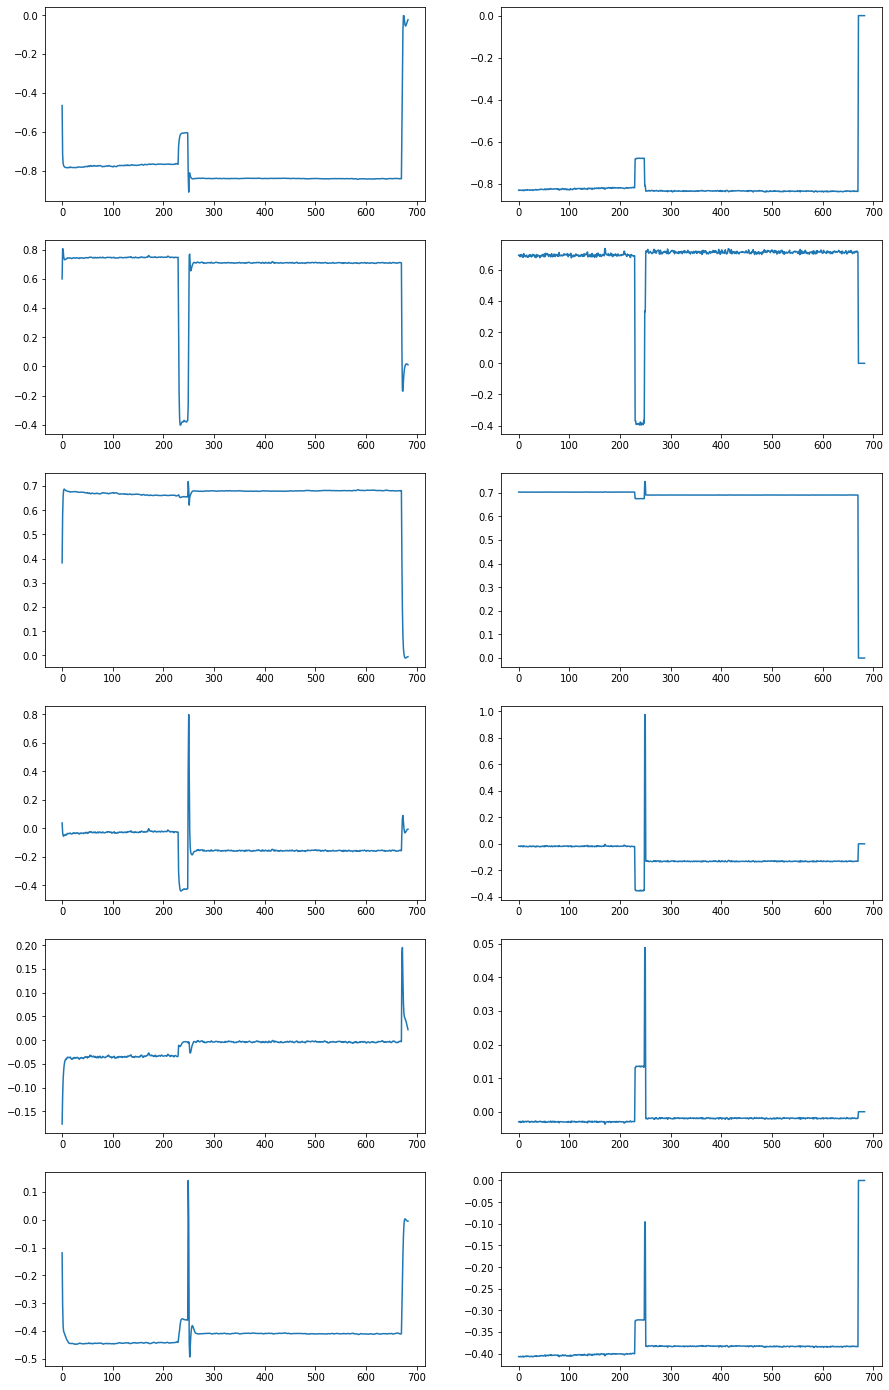

MSE on Anomalies:  tensor(0.0066)
MSE on Normal:  tensor(0.0083)
Epoch [361/500], loss: 0.007955
Epoch [362/500], loss: 0.007934
Epoch [363/500], loss: 0.007914
Epoch [364/500], loss: 0.007893
Epoch [365/500], loss: 0.007873
Epoch [366/500], loss: 0.007853
Epoch [367/500], loss: 0.007833
Epoch [368/500], loss: 0.007814
Epoch [369/500], loss: 0.007794
Epoch [370/500], loss: 0.007775


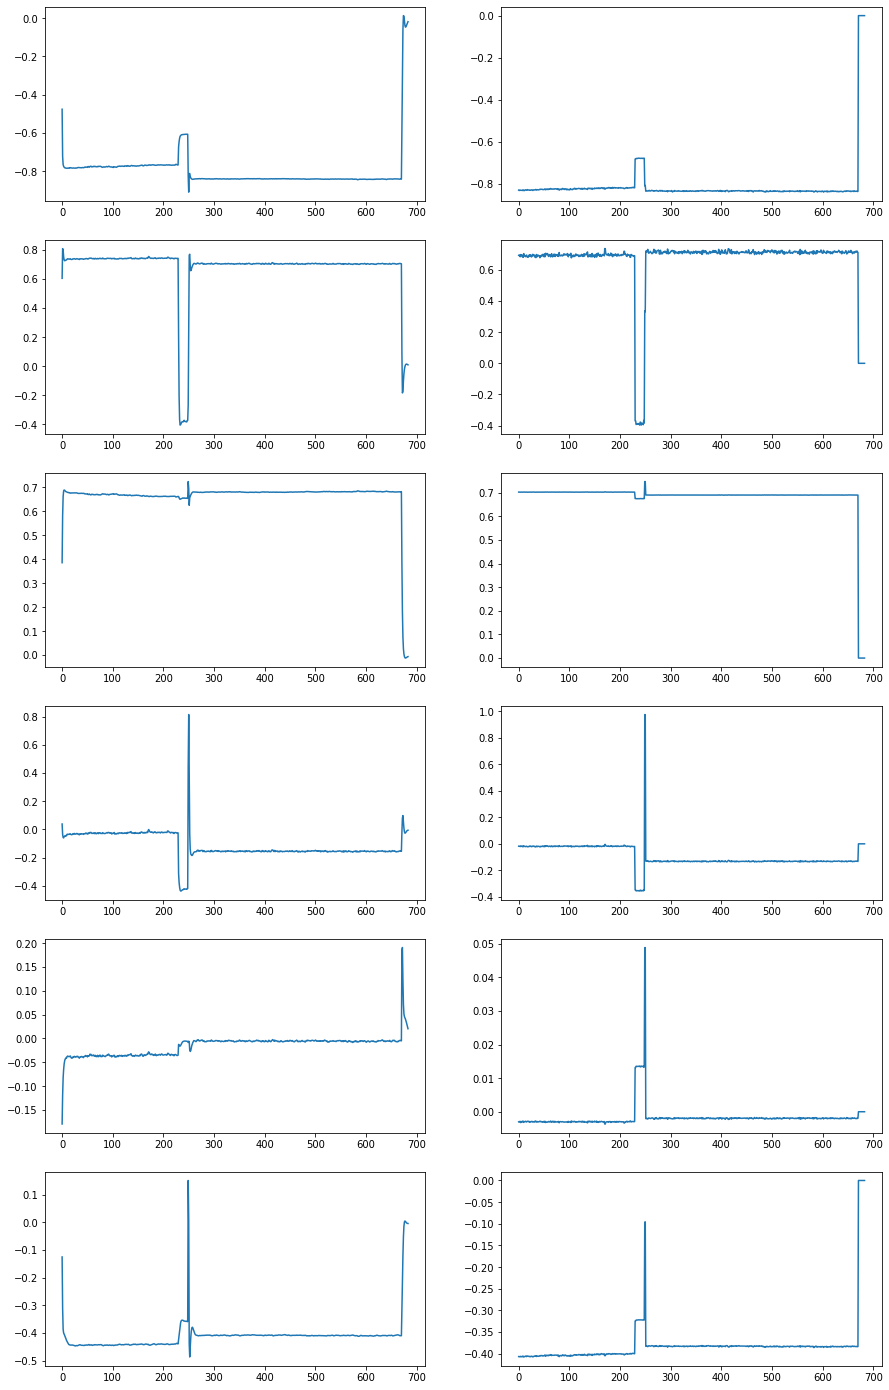

MSE on Anomalies:  tensor(0.0065)
MSE on Normal:  tensor(0.0081)
Epoch [371/500], loss: 0.007756
Epoch [372/500], loss: 0.007736
Epoch [373/500], loss: 0.007717
Epoch [374/500], loss: 0.007698
Epoch [375/500], loss: 0.007679
Epoch [376/500], loss: 0.007661
Epoch [377/500], loss: 0.007642
Epoch [378/500], loss: 0.007623
Epoch [379/500], loss: 0.007605
Epoch [380/500], loss: 0.007587


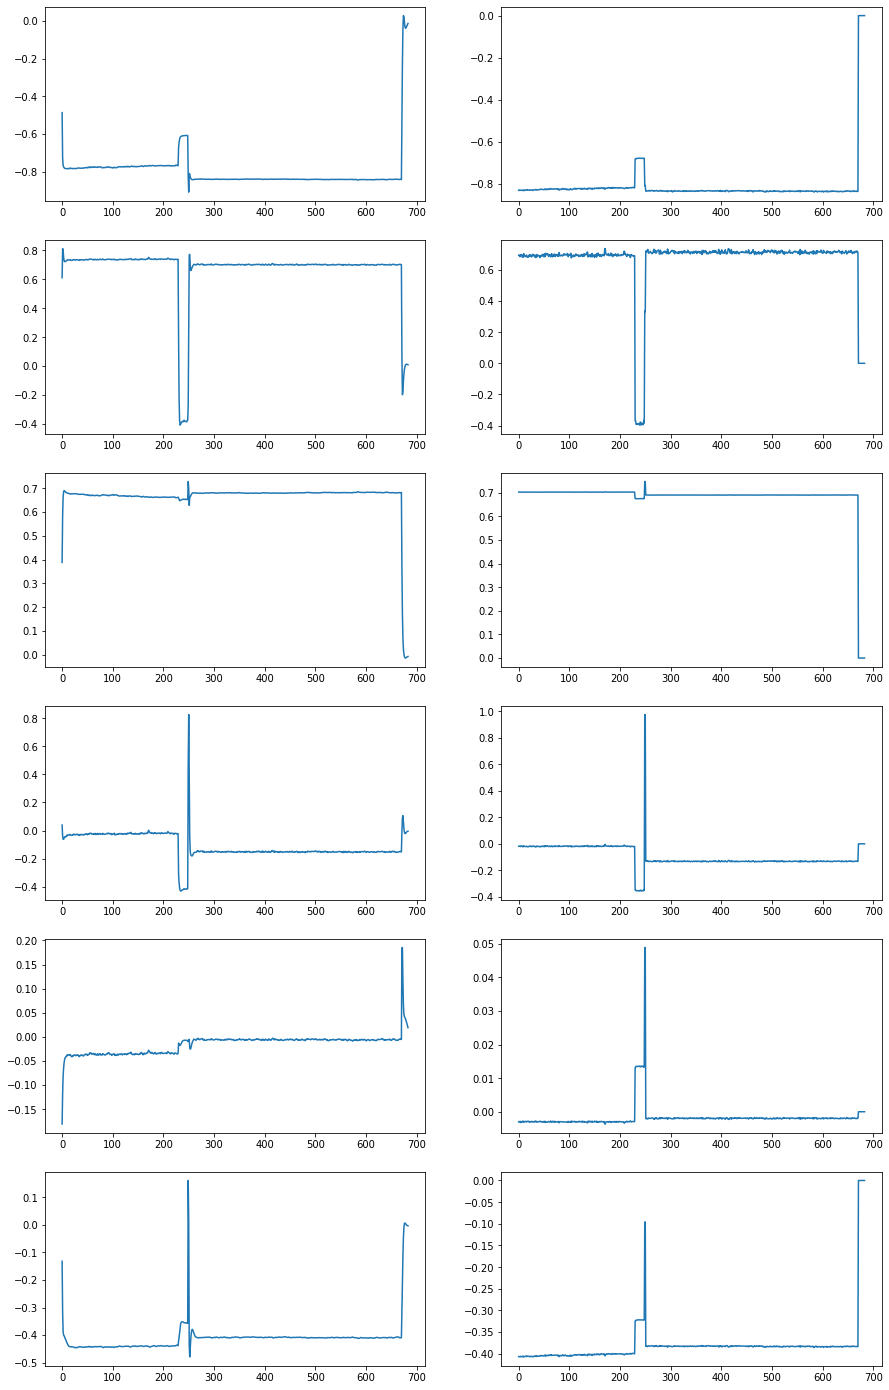

MSE on Anomalies:  tensor(0.0064)
MSE on Normal:  tensor(0.0080)
Epoch [381/500], loss: 0.007568
Epoch [382/500], loss: 0.007550
Epoch [383/500], loss: 0.007532
Epoch [384/500], loss: 0.007514
Epoch [385/500], loss: 0.007496
Epoch [386/500], loss: 0.007478
Epoch [387/500], loss: 0.007460
Epoch [388/500], loss: 0.007442
Epoch [389/500], loss: 0.007424
Epoch [390/500], loss: 0.007406


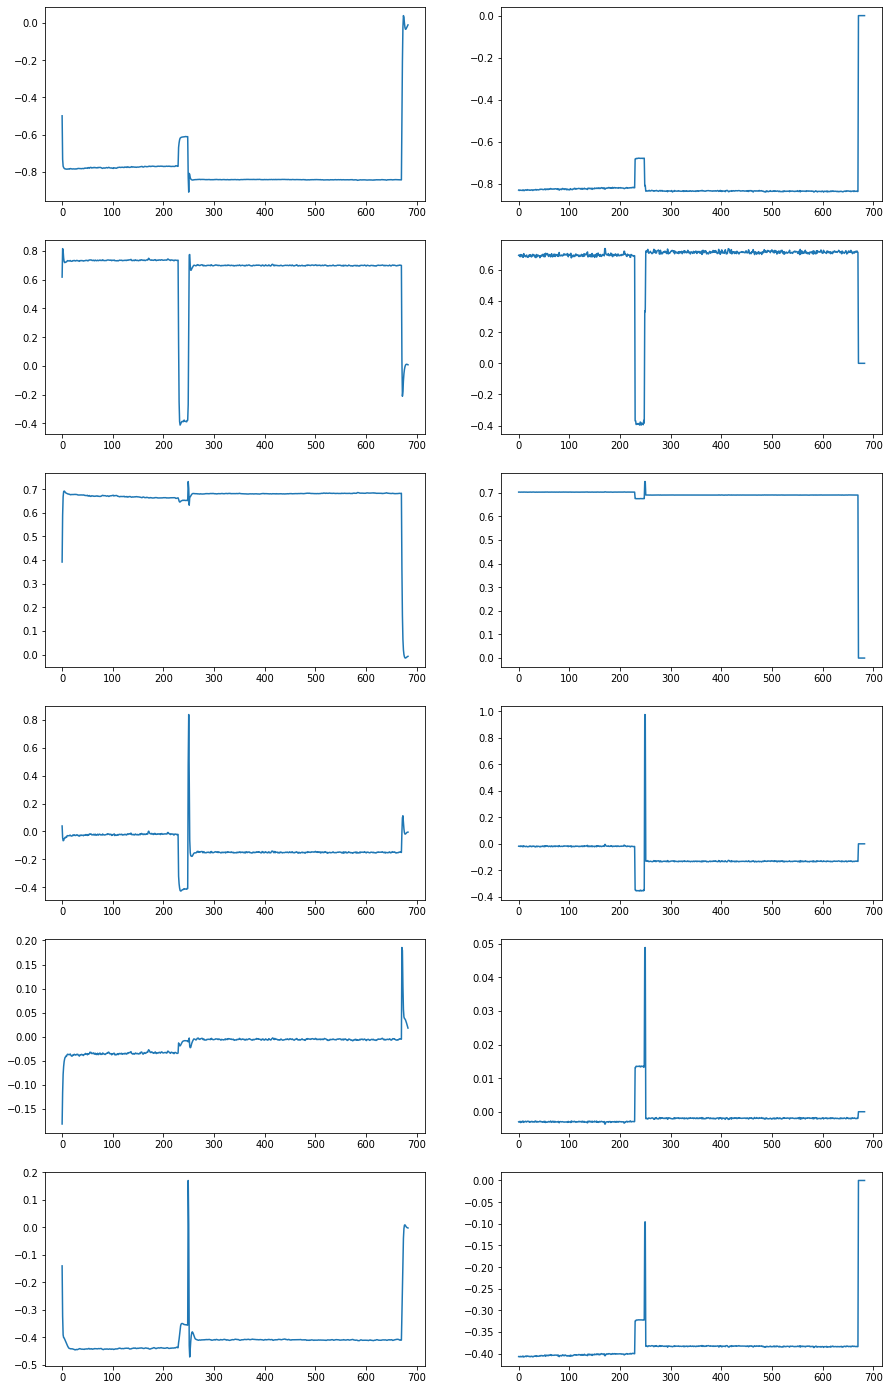

MSE on Anomalies:  tensor(0.0063)
MSE on Normal:  tensor(0.0078)
Epoch [391/500], loss: 0.007388
Epoch [392/500], loss: 0.007370
Epoch [393/500], loss: 0.007352
Epoch [394/500], loss: 0.007335
Epoch [395/500], loss: 0.007317
Epoch [396/500], loss: 0.007299
Epoch [397/500], loss: 0.007282
Epoch [398/500], loss: 0.007264
Epoch [399/500], loss: 0.007246
Epoch [400/500], loss: 0.007228


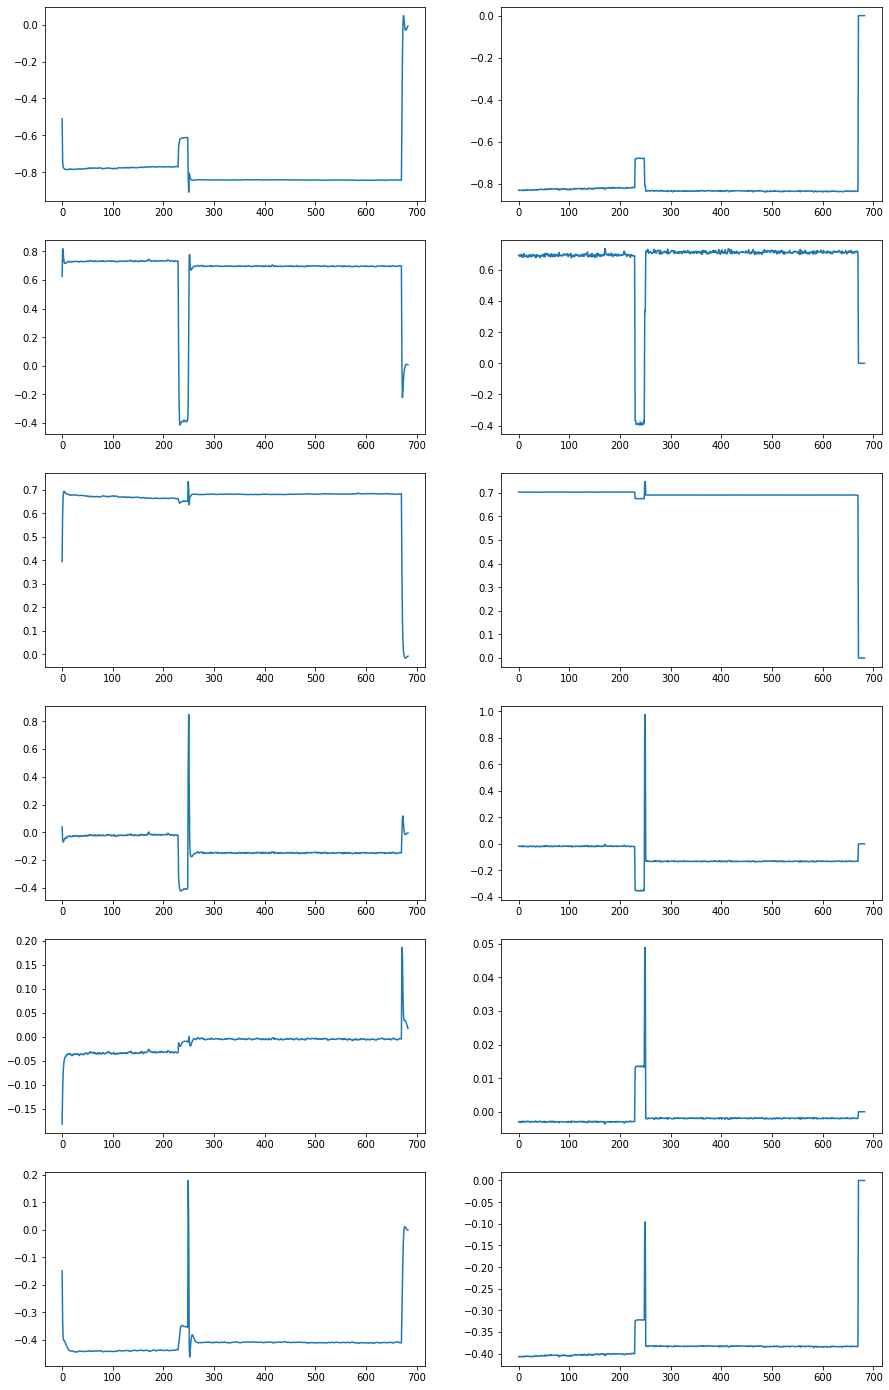

MSE on Anomalies:  tensor(0.0062)
MSE on Normal:  tensor(0.0076)
Epoch [401/500], loss: 0.007211
Epoch [402/500], loss: 0.007193
Epoch [403/500], loss: 0.007175
Epoch [404/500], loss: 0.007157
Epoch [405/500], loss: 0.007139
Epoch [406/500], loss: 0.007122
Epoch [407/500], loss: 0.007104
Epoch [408/500], loss: 0.007086
Epoch [409/500], loss: 0.007068
Epoch [410/500], loss: 0.007050


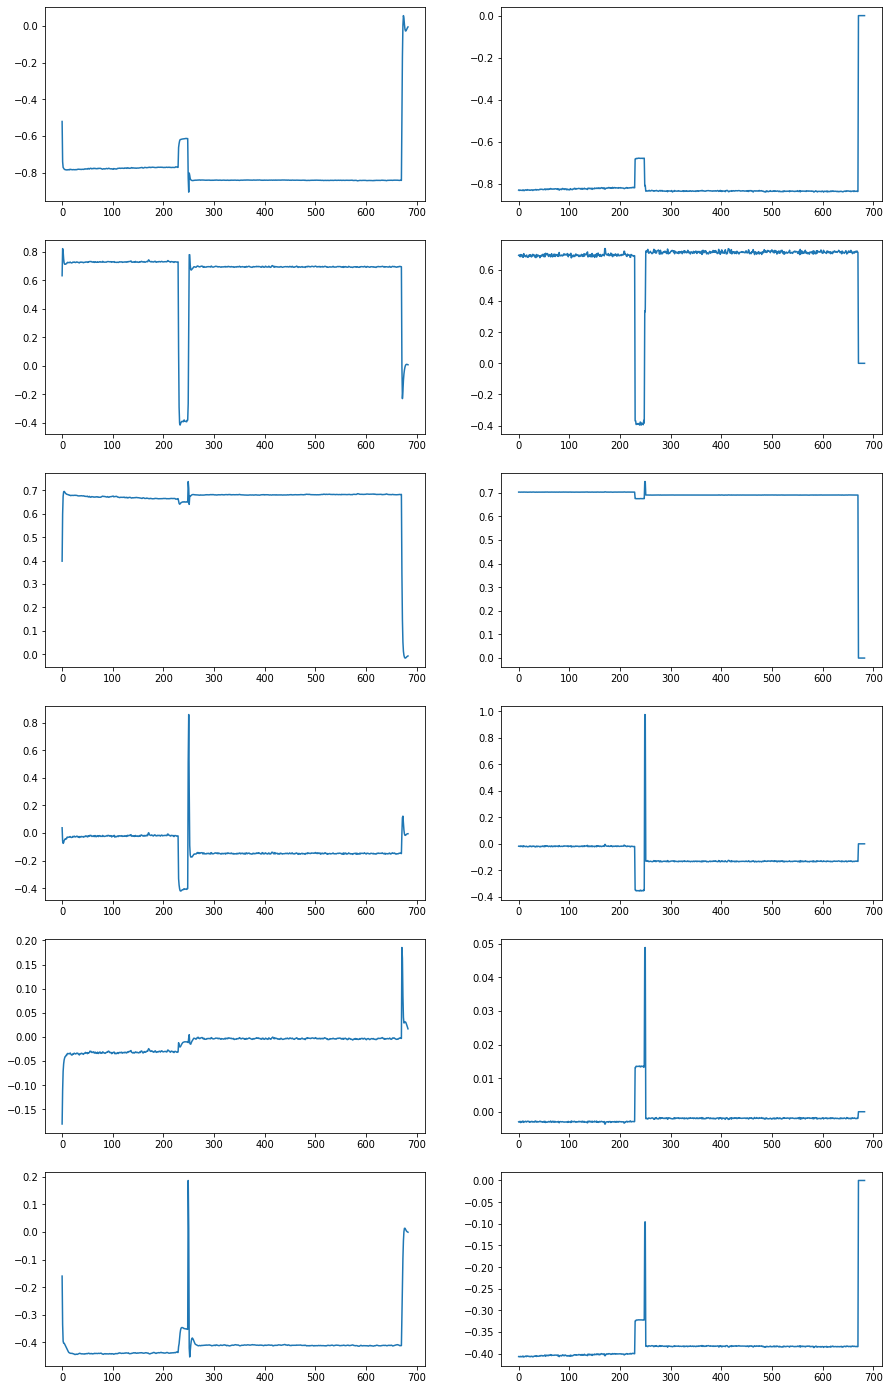

MSE on Anomalies:  tensor(0.0061)
MSE on Normal:  tensor(0.0075)
Epoch [411/500], loss: 0.007032
Epoch [412/500], loss: 0.007014
Epoch [413/500], loss: 0.006995
Epoch [414/500], loss: 0.006977
Epoch [415/500], loss: 0.006959
Epoch [416/500], loss: 0.006941
Epoch [417/500], loss: 0.006922
Epoch [418/500], loss: 0.006904
Epoch [419/500], loss: 0.006885
Epoch [420/500], loss: 0.006866


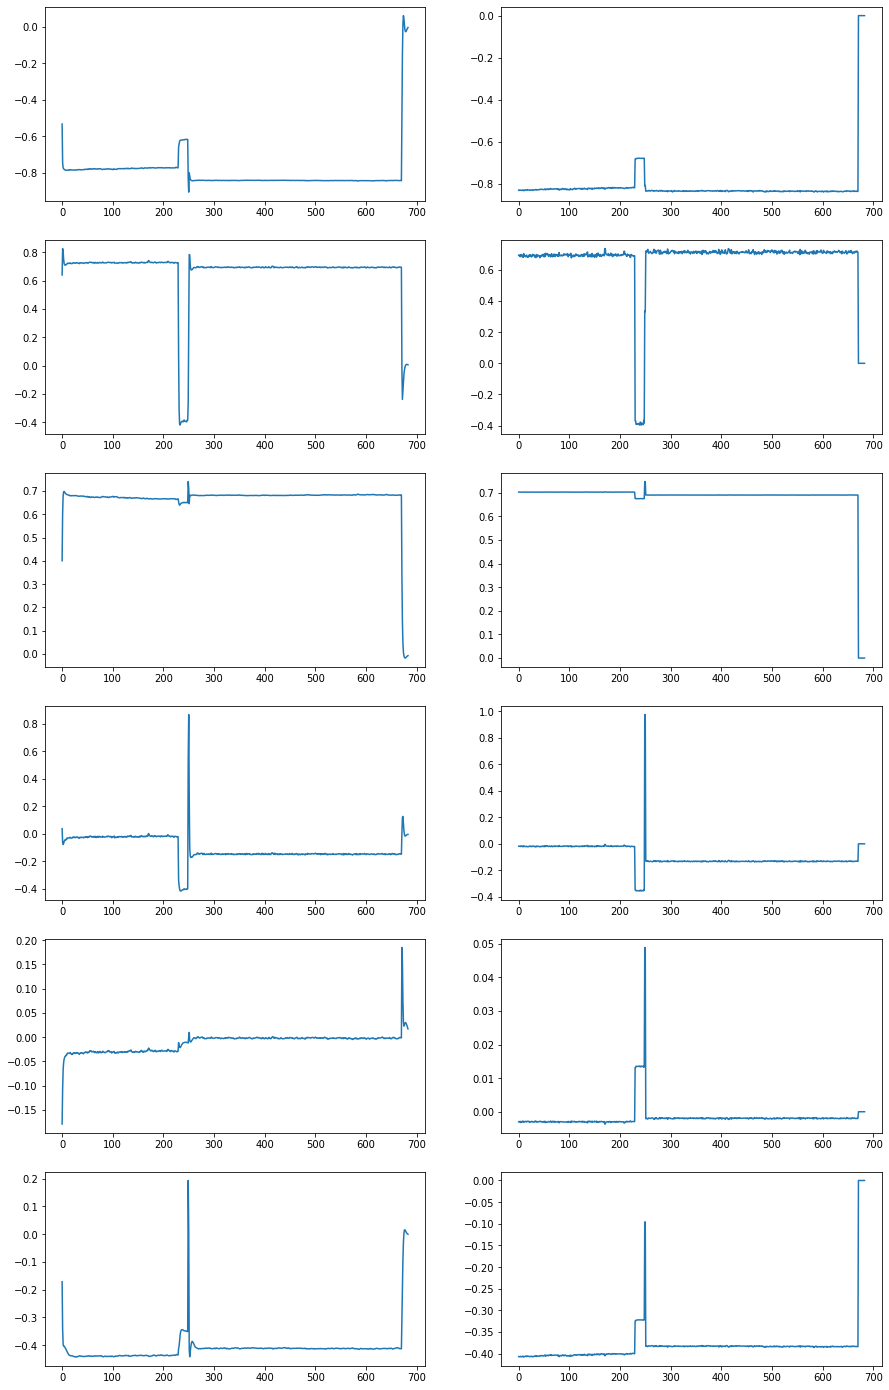

MSE on Anomalies:  tensor(0.0059)
MSE on Normal:  tensor(0.0073)
Epoch [421/500], loss: 0.006848
Epoch [422/500], loss: 0.006829
Epoch [423/500], loss: 0.006810
Epoch [424/500], loss: 0.006791
Epoch [425/500], loss: 0.006772
Epoch [426/500], loss: 0.006753
Epoch [427/500], loss: 0.006734
Epoch [428/500], loss: 0.006714
Epoch [429/500], loss: 0.006695
Epoch [430/500], loss: 0.006676


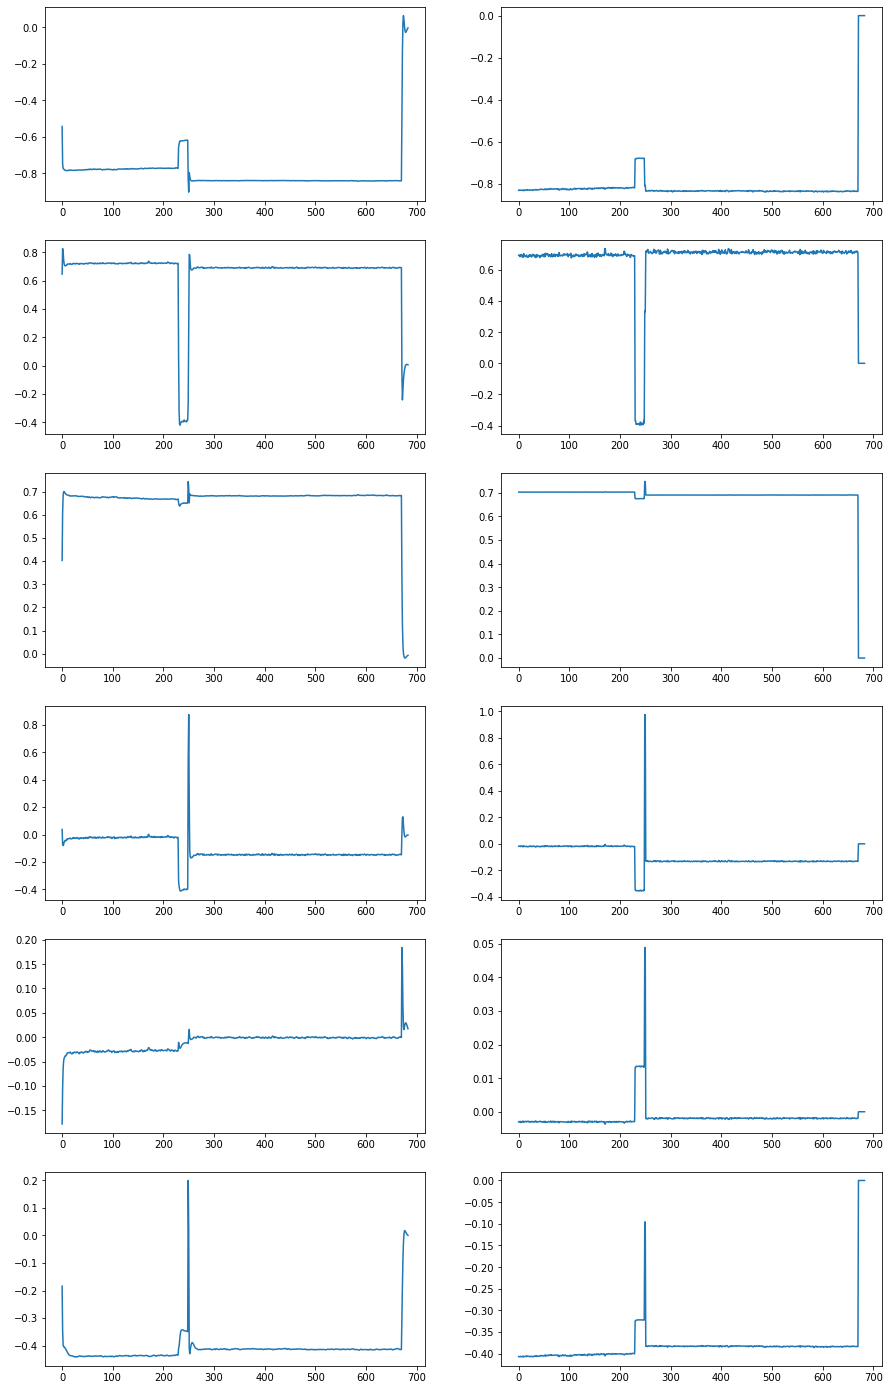

MSE on Anomalies:  tensor(0.0058)
MSE on Normal:  tensor(0.0071)
Epoch [431/500], loss: 0.006656
Epoch [432/500], loss: 0.006636
Epoch [433/500], loss: 0.006617
Epoch [434/500], loss: 0.006597
Epoch [435/500], loss: 0.006577
Epoch [436/500], loss: 0.006557
Epoch [437/500], loss: 0.006537
Epoch [438/500], loss: 0.006517
Epoch [439/500], loss: 0.006496
Epoch [440/500], loss: 0.006476


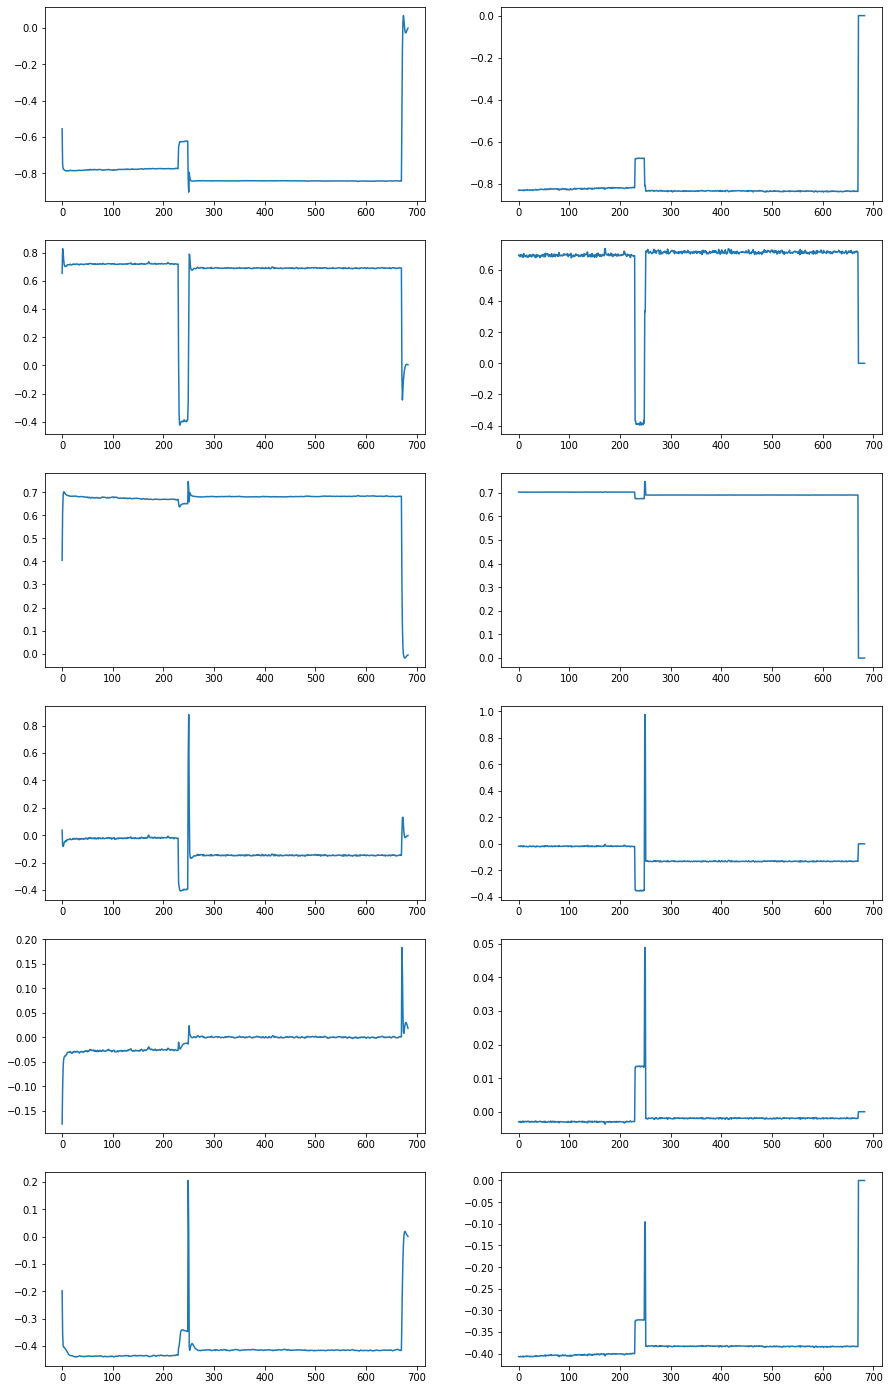

MSE on Anomalies:  tensor(0.0056)
MSE on Normal:  tensor(0.0068)
Epoch [441/500], loss: 0.006456
Epoch [442/500], loss: 0.006435
Epoch [443/500], loss: 0.006415
Epoch [444/500], loss: 0.006394
Epoch [445/500], loss: 0.006374
Epoch [446/500], loss: 0.006353
Epoch [447/500], loss: 0.006333
Epoch [448/500], loss: 0.006312
Epoch [449/500], loss: 0.006292
Epoch [450/500], loss: 0.006271


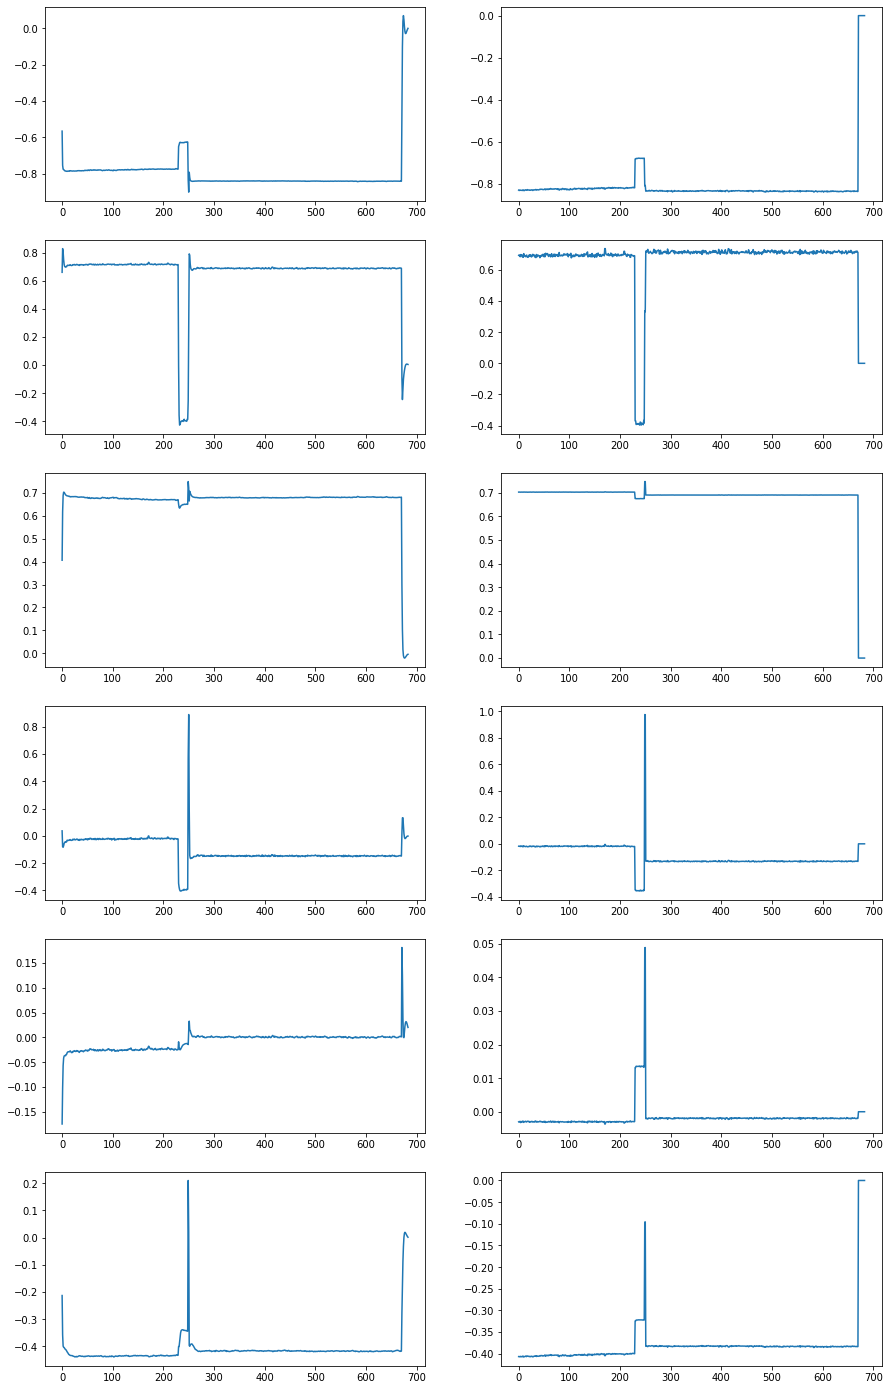

MSE on Anomalies:  tensor(0.0055)
MSE on Normal:  tensor(0.0066)
Epoch [451/500], loss: 0.006251
Epoch [452/500], loss: 0.006230
Epoch [453/500], loss: 0.006210
Epoch [454/500], loss: 0.006190
Epoch [455/500], loss: 0.006169
Epoch [456/500], loss: 0.006149
Epoch [457/500], loss: 0.006129
Epoch [458/500], loss: 0.006109
Epoch [459/500], loss: 0.006089
Epoch [460/500], loss: 0.006070


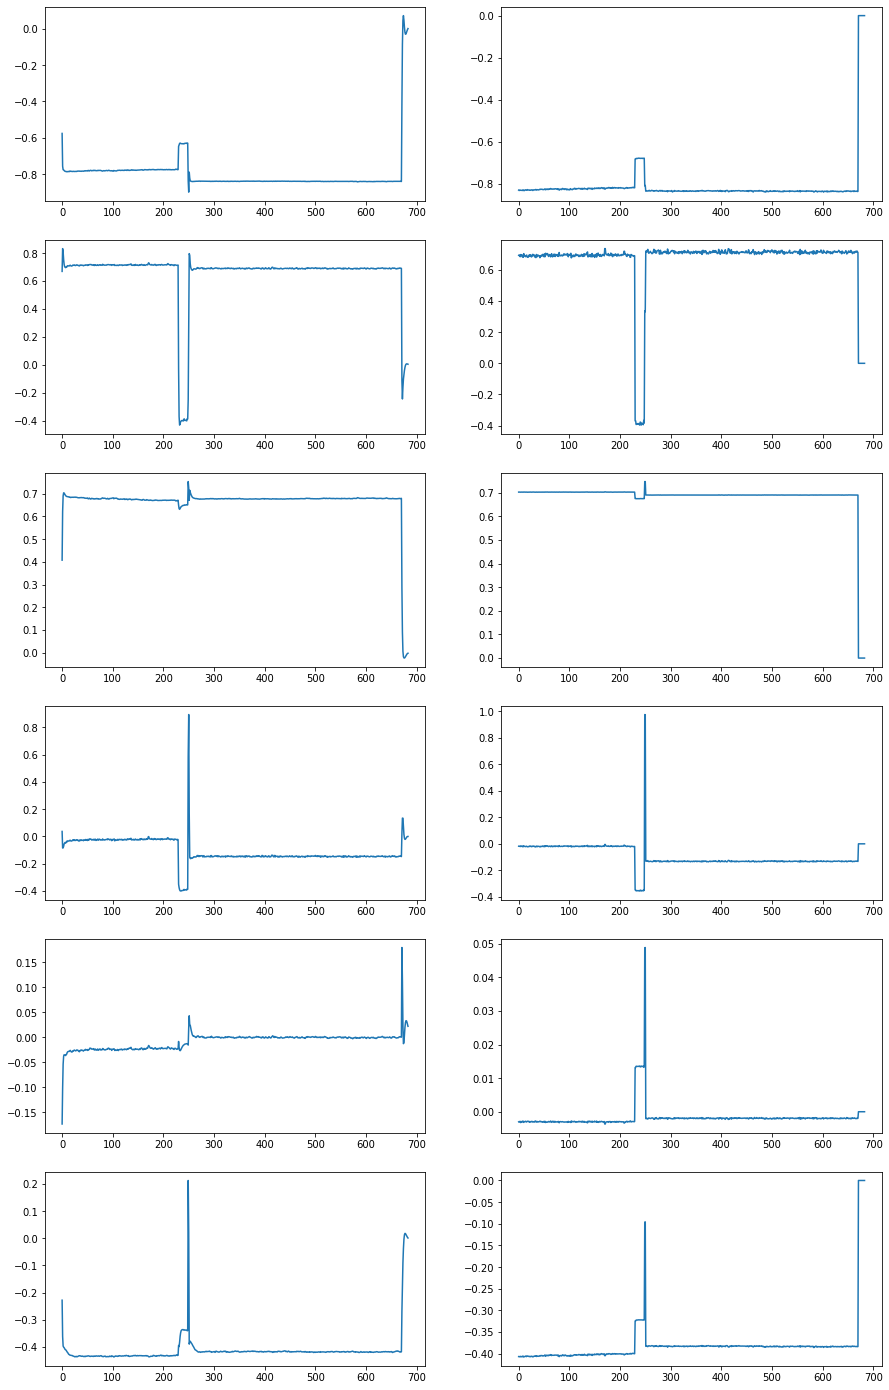

MSE on Anomalies:  tensor(0.0053)
MSE on Normal:  tensor(0.0064)
Epoch [461/500], loss: 0.006050
Epoch [462/500], loss: 0.006031
Epoch [463/500], loss: 0.006012
Epoch [464/500], loss: 0.005993
Epoch [465/500], loss: 0.005974
Epoch [466/500], loss: 0.005956
Epoch [467/500], loss: 0.005938
Epoch [468/500], loss: 0.005920
Epoch [469/500], loss: 0.005902
Epoch [470/500], loss: 0.005885


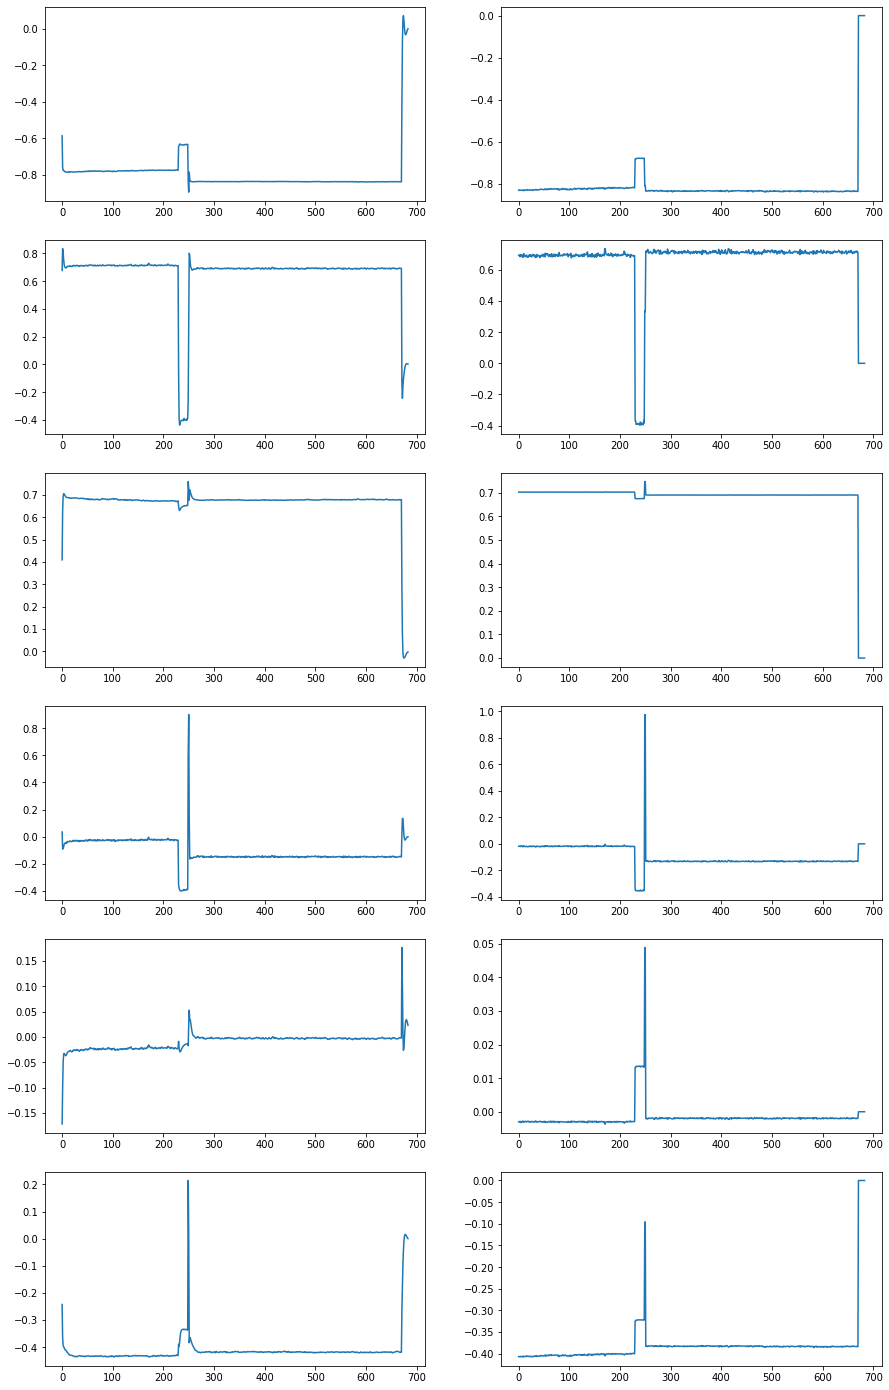

MSE on Anomalies:  tensor(0.0052)
MSE on Normal:  tensor(0.0062)
Epoch [471/500], loss: 0.005868
Epoch [472/500], loss: 0.005851
Epoch [473/500], loss: 0.005834
Epoch [474/500], loss: 0.005817
Epoch [475/500], loss: 0.005801
Epoch [476/500], loss: 0.005785
Epoch [477/500], loss: 0.005770
Epoch [478/500], loss: 0.005754
Epoch [479/500], loss: 0.005739
Epoch [480/500], loss: 0.005724


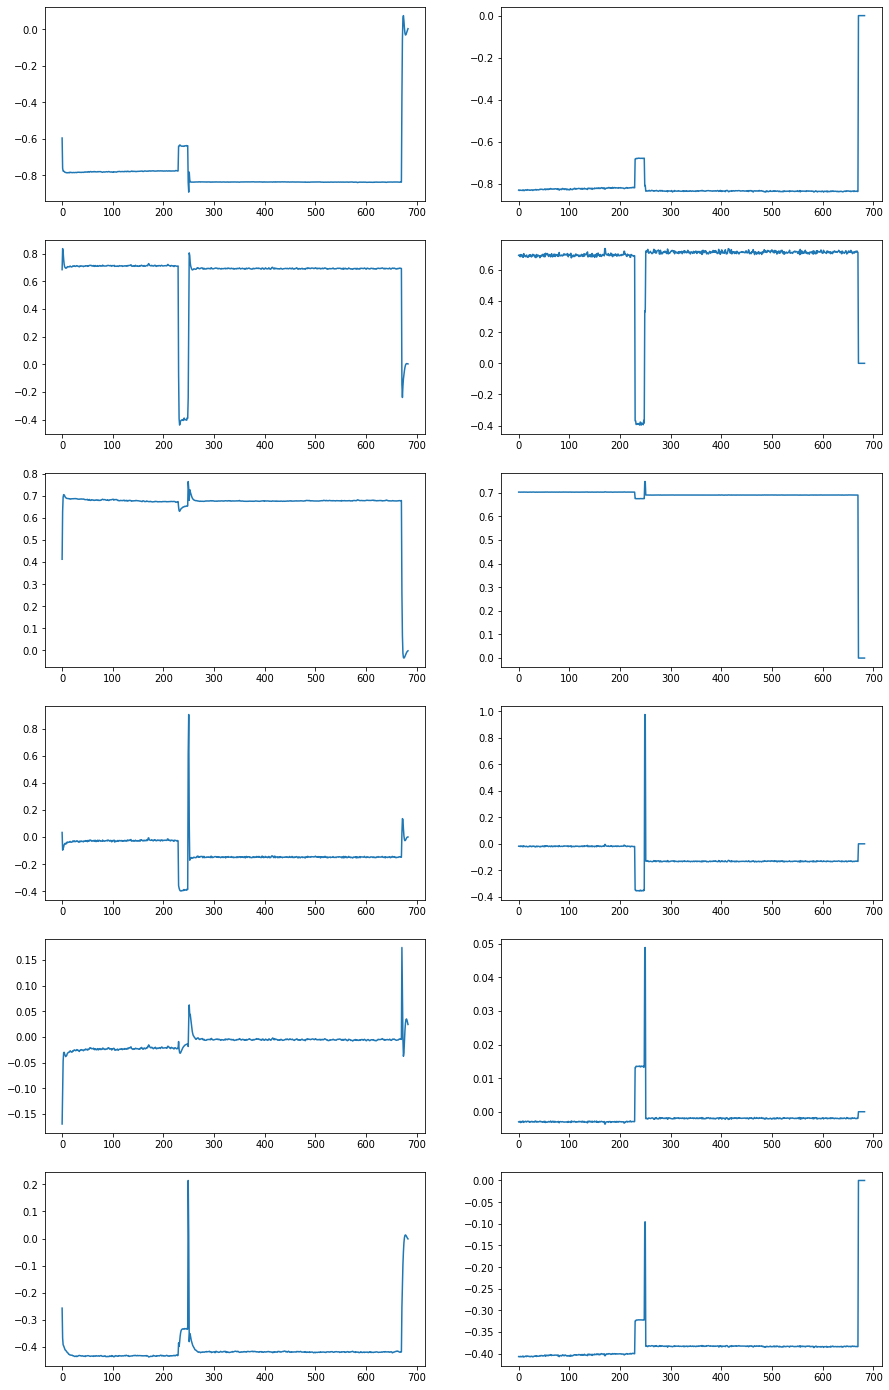

MSE on Anomalies:  tensor(0.0050)
MSE on Normal:  tensor(0.0060)
Epoch [481/500], loss: 0.005709
Epoch [482/500], loss: 0.005695
Epoch [483/500], loss: 0.005681
Epoch [484/500], loss: 0.005667
Epoch [485/500], loss: 0.005653
Epoch [486/500], loss: 0.005639
Epoch [487/500], loss: 0.005626
Epoch [488/500], loss: 0.005613
Epoch [489/500], loss: 0.005600
Epoch [490/500], loss: 0.005588


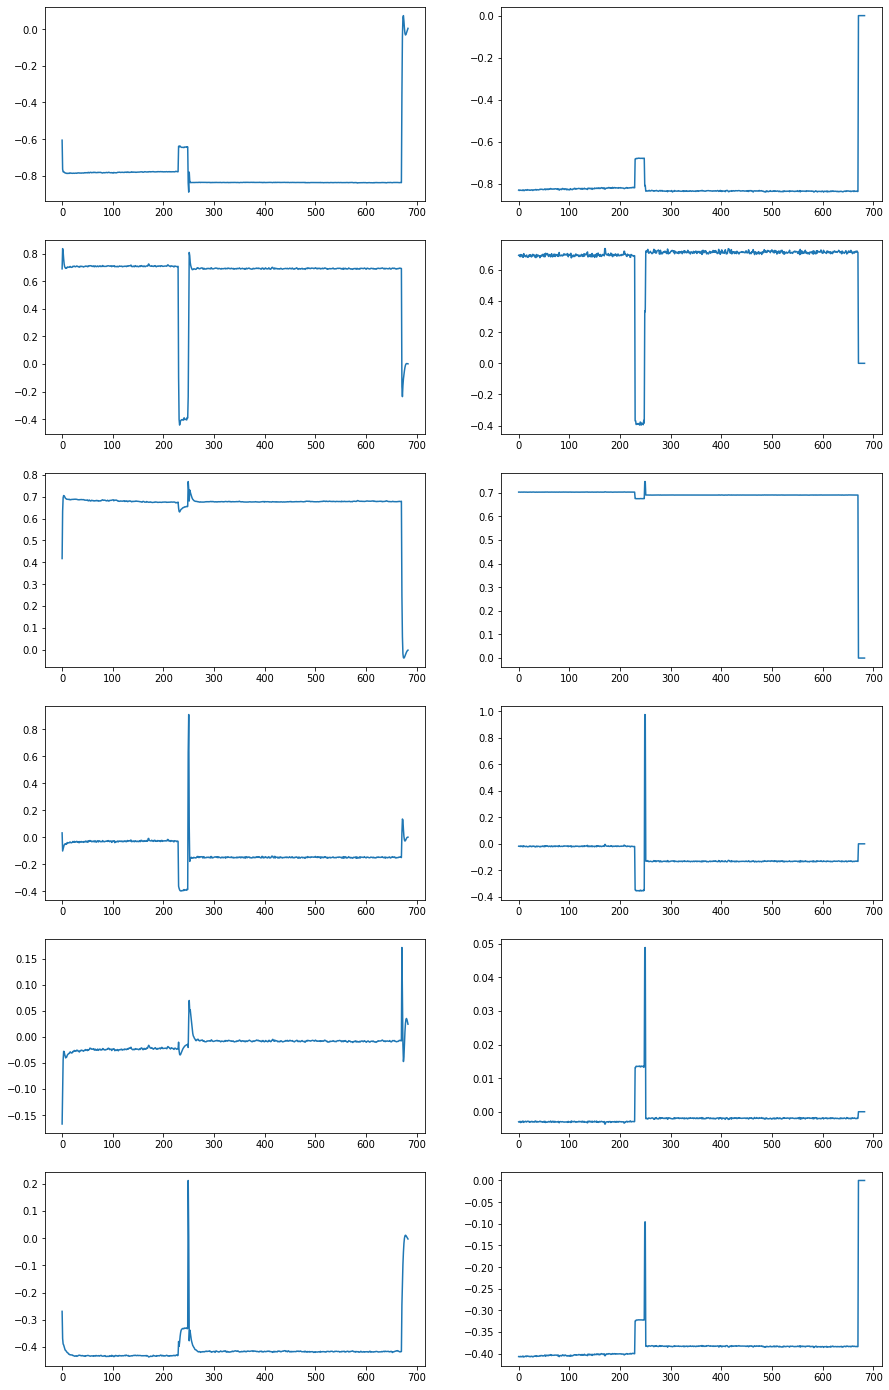

MSE on Anomalies:  tensor(0.0049)
MSE on Normal:  tensor(0.0058)
Epoch [491/500], loss: 0.005575
Epoch [492/500], loss: 0.005563
Epoch [493/500], loss: 0.005551
Epoch [494/500], loss: 0.005539
Epoch [495/500], loss: 0.005527
Epoch [496/500], loss: 0.005516
Epoch [497/500], loss: 0.005504
Epoch [498/500], loss: 0.005493
Epoch [499/500], loss: 0.005482


In [5]:
nb_epoch = 500

for epoch in range(nb_epoch):
    for i, sample in enumerate(train_loader,0): 
        G_gruAE.zero_grad()
        
        enc,res = G_gruAE(sample)

        loss_res = criterion_mse(res,sample)

        loss_res.backward()
        optimizer.step()
    print('Epoch [{}/{}], loss: {:.6f}'.format(epoch, nb_epoch, loss_res.item()))
    
    if epoch % 10 == 0:        
        # Plotting the 6 first examples and their reconstruction
        fig, axs = plt.subplots(6, 2,figsize=(15,25))
        concat_pred_test = res.detach().numpy()[1]
        concat_original = sample.detach().numpy()[1]
        df_test_gen = pd.DataFrame(concat_pred_test)
        df_original = pd.DataFrame(concat_original)
        axs[0][0].plot(df_test_gen[0])
        axs[0][1].plot(df_original[0])
        axs[1][0].plot(df_test_gen[1])
        axs[1][1].plot(df_original[1])
        axs[2][0].plot(df_test_gen[2])
        axs[2][1].plot(df_original[2])
        axs[3][0].plot(df_test_gen[3])
        axs[3][1].plot(df_original[3])
        axs[4][0].plot(df_test_gen[4])
        axs[4][1].plot(df_original[4])
        axs[5][0].plot(df_test_gen[5])
        axs[5][1].plot(df_original[5])
        plt.show()
        
        with torch.no_grad():
            # Error on test set
            enc_anom,dec_anom = G_gruAE(test_final[pos_ids_anomaly])
            enc_norm,dec_norm = G_gruAE(test_final[pos_ids_no_anomaly])
            print('MSE on Anomalies: ',criterion_mse(test_final[pos_ids_anomaly],dec_anom))
            print('MSE on Normal: ',criterion_mse(test_final[pos_ids_no_anomaly],dec_norm))

### Model saving

In [6]:
PATH = '../Models/GruAE.pt'
torch.save(G_gruAE, PATH)
PATH = '../Models/GruAE_Encoder.pt'
torch.save(G_gruAE.encoder, PATH)
PATH = '../Models/GruAE_Decoder.pt'
torch.save(G_gruAE.decoder, PATH)

### Model loading

In [7]:
PATH = '../Models/GruAE.pt'
G_gruAE = torch.load(PATH)
PATH = '../Models/GruAE_Encoder.pt'
encoder = torch.load(PATH)
PATH = '../Models/GruAE_Decoder.pt'
decoder = torch.load(PATH)

G_gruAE = Adv_GruAE(encoder,decoder)

### Model testing

In [8]:
enc_anom,dec_anom = G_gruAE(test_final[pos_ids_anomaly])
enc_norm,dec_norm = G_gruAE(test_final[pos_ids_no_anomaly])
enc_train, dec_train = G_gruAE(train_final)

print(criterion_mse(test_final[pos_ids_anomaly],dec_anom))
print(criterion_mse(test_final[pos_ids_no_anomaly],dec_norm))

tensor(0.0048, grad_fn=<MseLossBackward0>)
tensor(0.0057, grad_fn=<MseLossBackward0>)


### Getting mean squared differences between original and encoded data for both normal and abnormal data

In [9]:
mat = pd.DataFrame(torch.mean((dec_anom - test_final[pos_ids_anomaly])**2, dim=2).detach().numpy())
mat_no = pd.DataFrame(torch.mean((dec_norm - test_final[pos_ids_no_anomaly])**2, dim=2).detach().numpy())

mean_mat_ANOM = mat.mean()[10:-10]
mean_mat_ANOM = mean_mat_ANOM.values.reshape(-1,1)

scaler = preprocessing.StandardScaler()
scaled_mean_mat_ANOM = scaler.fit_transform(mean_mat_ANOM)

mean_mat_NORM = mat_no.mean()[10:-10]
mean_mat_NORM = mean_mat_NORM.values.reshape(-1,1)

scaler = preprocessing.StandardScaler()
scaled_mean_mat_NORM = scaler.fit_transform(mean_mat_NORM)


### Plotting the distributions of the differences

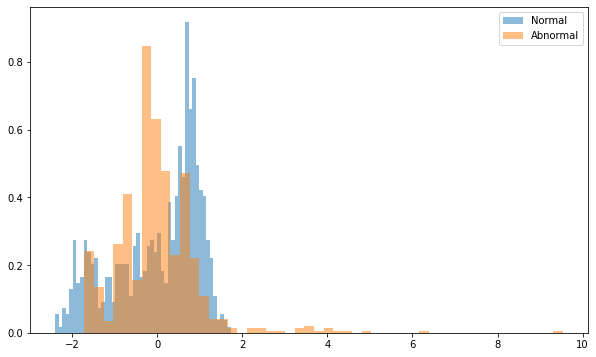

In [10]:
fig = plt.figure(figsize=[10,6])
plt.hist(scaled_mean_mat_NORM, label='Normal', alpha=0.5, bins=50, density=True)
plt.hist(scaled_mean_mat_ANOM, label='Abnormal', alpha=0.5, bins=50, density=True)
plt.legend(loc='upper right')
plt.show()

In [11]:
%matplotlib notebook

In [12]:
df_scaled_all = pd.concat([pd.DataFrame(mean_mat_ANOM),pd.DataFrame(mean_mat_NORM)])

### T-SNE Representation

In [13]:
tsne = TSNE(n_components=3, verbose=1, perplexity=60, n_iter=1000, n_iter_without_progress=500)
tsne_results = tsne.fit_transform(df_scaled_all)

df_scaled_all['tsne-2d-one'] = tsne_results[:,0]
df_scaled_all['tsne-2d-two'] = tsne_results[:,1]
df_scaled_all['tsne-2d-three'] = tsne_results[:,2]

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1322 samples in 0.004s...
[t-SNE] Computed neighbors for 1322 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1322
[t-SNE] Computed conditional probabilities for sample 1322 / 1322
[t-SNE] Mean sigma: 0.000079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.525139
[t-SNE] KL divergence after 1000 iterations: 0.086340


<IPython.core.display.Javascript object>


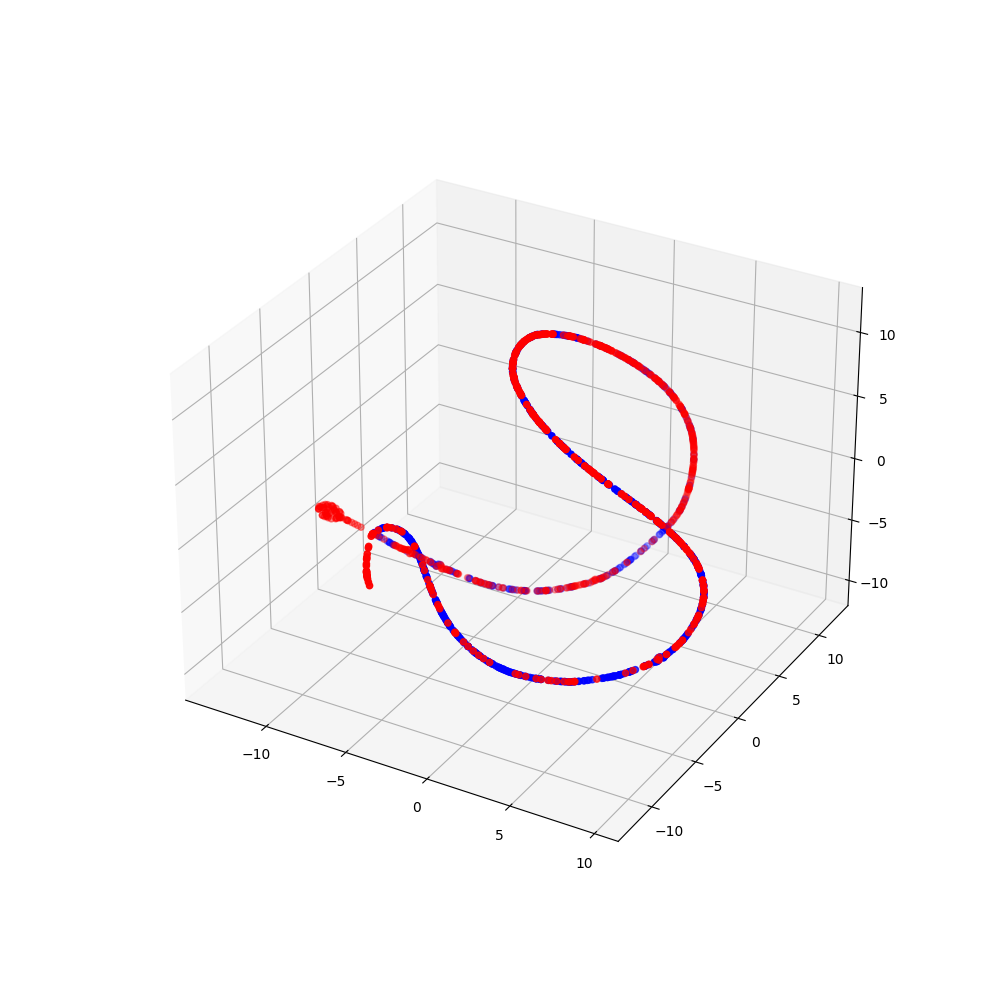

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(
    df_scaled_all['tsne-2d-one'][:mean_mat_ANOM.shape[0]], 
    df_scaled_all['tsne-2d-two'][:mean_mat_ANOM.shape[0]],
    df_scaled_all['tsne-2d-three'][:mean_mat_ANOM.shape[0]], c='red'
)
ax.scatter(
    df_scaled_all['tsne-2d-one'][mean_mat_ANOM.shape[0]:], 
    df_scaled_all['tsne-2d-two'][mean_mat_ANOM.shape[0]:],
    df_scaled_all['tsne-2d-three'][mean_mat_ANOM.shape[0]:], c='blue'
)
plt.show()

### Scatter plot the 3 dimensional encoded datapoints

<IPython.core.display.Javascript object>


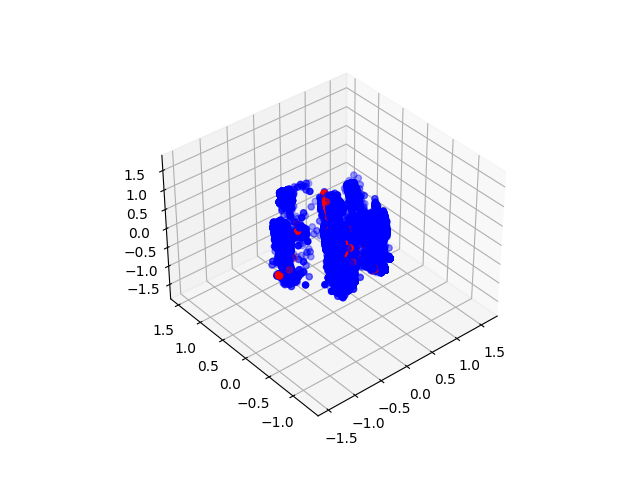

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(enc_norm.shape[0]):
    ax.scatter(enc_norm.data.numpy()[i,:,0],enc_norm.data.numpy()[i,:,1],enc_norm.data.numpy()[i,:,2], \
               color = 'blue')

for i in range(enc_anom.shape[0]):
    ax.scatter(enc_anom.data.numpy()[i,:,0],enc_anom.data.numpy()[i,:,1],enc_anom.data.numpy()[i,:,2], \
               color = 'red')

plt.savefig('../Images/scatter_plot.png',dpi=300)    
plt.show()


# Conclusion

* The distributions of square differences between orignal and reconstructed data of normal and abnormal data are not aligned ==> likelhood estimation could be used to infer anomalies
* t-sne representation does not enable normal vs abnormal separation
* 3d representations of encoded data does not bring significant separability